In [1]:
import numpy as np, pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import keras as K
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow


#read the data from the espicied file "data.xlsx"
file_name='data.xlsx'
data_excel = pd.DataFrame(pd.read_excel(file_name))
[n_rows,n_columns] =data_excel.shape

Using TensorFlow backend.


In [2]:
#clean data
# all X15 are 'Blanco' so they do not give any information to our model
data_excel= data_excel.drop(columns="X15")
#is possible to see that the X16 input is a datetime
data_excel['X16']= data_excel['X16'].apply(pd.to_datetime) #convert the date
data_excel['X16'] = data_excel['X16'] - data_excel['X16'].min() #
#update columns names
columns = data_excel.columns

In [3]:
# ETL data is escaled
for column in columns:
    if data_excel[column].dtypes == 'float64':
        data_excel[column] = (data_excel[column]-data_excel[column].min())/data_excel[column].max()
    else:
        data_excel[column] = data_excel[column].infer_objects()
        data_excel[column] = (data_excel[column]-data_excel[column].min())/data_excel[column].max()
data_excel=shuffle(data_excel)

In [4]:
#separate the training testing and validation split
training=np.floor(n_rows*0.7).astype('int')
testing=n_rows

n_inputs=14
X=data_excel.iloc[:,0:n_inputs].as_matrix()
#Our goal is to find the Y_SUM output
Y=data_excel.iloc[:,19].as_matrix()

X_train=data_excel.iloc[0:training,0:n_inputs].as_matrix()
X_test=data_excel.iloc[training:testing,0:n_inputs].as_matrix()

Y_train=data_excel.iloc[0:training,19].as_matrix()
Y_test=data_excel.iloc[training:testing,19].as_matrix()


/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .

In [5]:
#define the NN model<<
model = Sequential()
model.add(Dense(100, input_shape=(n_inputs,)))
model.add(K.layers.LeakyReLU(alpha=0.03))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(K.layers.LeakyReLU(alpha=0.03))
model.add(Dense(1))

my_optimizer= K.optimizers.Adam(lr=0.0001)
model.compile(optimizer=my_optimizer, loss='logcosh', metrics=['logcosh'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1500      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [6]:

#training

model.fit(X_train, Y_train,epochs=12000,validation_split=0)

Epoch 1/12000
93/93 [==============================] - 1s 8ms/step - loss: 0.0219 - logcosh: 0.0219
Epoch 2/12000
93/93 [==============================] - 0s 138us/step - loss: 0.0131 - logcosh: 0.0131
Epoch 3/12000
93/93 [==============================] - 0s 85us/step - loss: 0.0146 - logcosh: 0.0146
Epoch 4/12000
93/93 [==============================] - 0s 118us/step - loss: 0.0142 - logcosh: 0.0142
Epoch 5/12000
93/93 [==============================] - 0s 114us/step - loss: 0.0132 - logcosh: 0.0132
Epoch 6/12000
93/93 [==============================] - 0s 96us/step - loss: 0.0107 - logcosh: 0.0107
Epoch 7/12000
93/93 [==============================] - 0s 101us/step - loss: 0.0085 - logcosh: 0.0085
Epoch 8/12000
93/93 [==============================] - 0s 128us/step - loss: 0.0073 - logcosh: 0.0073
Epoch 9/12000
93/93 [==============================] - 0s 156us/step - loss: 0.0075 - logcosh: 0.0075
Epoch 10/12000
93/93 [==============================] - 0s 122us/step - loss: 0.0079 -

Epoch 81/12000
93/93 [==============================] - 0s 100us/step - loss: 0.0021 - logcosh: 0.0021
Epoch 82/12000
93/93 [==============================] - 0s 107us/step - loss: 0.0024 - logcosh: 0.0024
Epoch 83/12000
93/93 [==============================] - 0s 79us/step - loss: 0.0019 - logcosh: 0.0019
Epoch 84/12000
93/93 [==============================] - 0s 108us/step - loss: 0.0018 - logcosh: 0.0018
Epoch 85/12000
93/93 [==============================] - 0s 68us/step - loss: 0.0026 - logcosh: 0.0026
Epoch 86/12000
93/93 [==============================] - 0s 95us/step - loss: 0.0019 - logcosh: 0.0019
Epoch 87/12000
93/93 [==============================] - 0s 80us/step - loss: 0.0023 - logcosh: 0.0023
Epoch 88/12000
93/93 [==============================] - 0s 93us/step - loss: 0.0024 - logcosh: 0.0024
Epoch 89/12000
93/93 [==============================] - 0s 109us/step - loss: 0.0017 - logcosh: 0.0017
Epoch 90/12000
93/93 [==============================] - 0s 105us/step - loss: 

93/93 [==============================] - 0s 76us/step - loss: 9.8857e-04 - logcosh: 9.8857e-04
Epoch 160/12000
93/93 [==============================] - 0s 84us/step - loss: 9.3412e-04 - logcosh: 9.3412e-04
Epoch 161/12000
93/93 [==============================] - 0s 115us/step - loss: 0.0010 - logcosh: 0.0010
Epoch 162/12000
93/93 [==============================] - 0s 111us/step - loss: 0.0010 - logcosh: 0.0010  
Epoch 163/12000
93/93 [==============================] - 0s 168us/step - loss: 8.0101e-04 - logcosh: 8.0101e-04
Epoch 164/12000
93/93 [==============================] - 0s 97us/step - loss: 0.0012 - logcosh: 0.0012
Epoch 165/12000
93/93 [==============================] - 0s 105us/step - loss: 9.5799e-04 - logcosh: 9.5799e-04
Epoch 166/12000
93/93 [==============================] - 0s 113us/step - loss: 8.7839e-04 - logcosh: 8.7839e-04
Epoch 167/12000
93/93 [==============================] - 0s 78us/step - loss: 0.0011 - logcosh: 0.0011   
Epoch 168/12000
93/93 [================

93/93 [==============================] - 0s 101us/step - loss: 7.1099e-04 - logcosh: 7.1099e-04
Epoch 234/12000
93/93 [==============================] - 0s 83us/step - loss: 7.5446e-04 - logcosh: 7.5446e-04
Epoch 235/12000
93/93 [==============================] - 0s 96us/step - loss: 6.8320e-04 - logcosh: 6.8320e-04
Epoch 236/12000
93/93 [==============================] - 0s 99us/step - loss: 6.2954e-04 - logcosh: 6.2954e-04
Epoch 237/12000
93/93 [==============================] - 0s 89us/step - loss: 5.9208e-04 - logcosh: 5.9208e-04
Epoch 238/12000
93/93 [==============================] - 0s 92us/step - loss: 7.6245e-04 - logcosh: 7.6245e-04
Epoch 239/12000
93/93 [==============================] - 0s 72us/step - loss: 6.2194e-04 - logcosh: 6.2194e-04
Epoch 240/12000
93/93 [==============================] - 0s 85us/step - loss: 6.8223e-04 - logcosh: 6.8223e-04
Epoch 241/12000
93/93 [==============================] - 0s 89us/step - loss: 7.3306e-04 - logcosh: 7.3306e-04
Epoch 242/12000


93/93 [==============================] - 0s 94us/step - loss: 5.7659e-04 - logcosh: 5.7659e-04
Epoch 307/12000
93/93 [==============================] - 0s 95us/step - loss: 6.7219e-04 - logcosh: 6.7219e-04
Epoch 308/12000
93/93 [==============================] - 0s 109us/step - loss: 4.9573e-04 - logcosh: 4.9573e-04
Epoch 309/12000
93/93 [==============================] - 0s 111us/step - loss: 6.0672e-04 - logcosh: 6.0672e-04
Epoch 310/12000
93/93 [==============================] - 0s 86us/step - loss: 4.4531e-04 - logcosh: 4.4531e-04
Epoch 311/12000
93/93 [==============================] - 0s 95us/step - loss: 7.4008e-04 - logcosh: 7.4008e-04
Epoch 312/12000
93/93 [==============================] - 0s 100us/step - loss: 6.1968e-04 - logcosh: 6.1968e-04
Epoch 313/12000
93/93 [==============================] - 0s 80us/step - loss: 6.1696e-04 - logcosh: 6.1696e-04
Epoch 314/12000
93/93 [==============================] - 0s 99us/step - loss: 4.9980e-04 - logcosh: 4.9980e-04
Epoch 315/1200

93/93 [==============================] - 0s 90us/step - loss: 5.0389e-04 - logcosh: 5.0389e-04
Epoch 380/12000
93/93 [==============================] - 0s 95us/step - loss: 5.1119e-04 - logcosh: 5.1119e-04
Epoch 381/12000
93/93 [==============================] - 0s 93us/step - loss: 5.5999e-04 - logcosh: 5.5999e-04
Epoch 382/12000
93/93 [==============================] - 0s 122us/step - loss: 4.6131e-04 - logcosh: 4.6131e-04
Epoch 383/12000
93/93 [==============================] - 0s 117us/step - loss: 5.7497e-04 - logcosh: 5.7497e-04
Epoch 384/12000
93/93 [==============================] - 0s 108us/step - loss: 5.3243e-04 - logcosh: 5.3243e-04
Epoch 385/12000
93/93 [==============================] - 0s 111us/step - loss: 3.5767e-04 - logcosh: 3.5767e-04
Epoch 386/12000
93/93 [==============================] - 0s 133us/step - loss: 4.6411e-04 - logcosh: 4.6411e-04
Epoch 387/12000
93/93 [==============================] - 0s 101us/step - loss: 4.4357e-04 - logcosh: 4.4357e-04
Epoch 388/1

93/93 [==============================] - 0s 142us/step - loss: 5.0736e-04 - logcosh: 5.0736e-04
Epoch 453/12000
93/93 [==============================] - 0s 78us/step - loss: 4.7808e-04 - logcosh: 4.7808e-04
Epoch 454/12000
93/93 [==============================] - 0s 89us/step - loss: 4.3360e-04 - logcosh: 4.3360e-04
Epoch 455/12000
93/93 [==============================] - 0s 124us/step - loss: 4.3608e-04 - logcosh: 4.3608e-04
Epoch 456/12000
93/93 [==============================] - 0s 88us/step - loss: 5.2922e-04 - logcosh: 5.2922e-04
Epoch 457/12000
93/93 [==============================] - 0s 96us/step - loss: 4.6851e-04 - logcosh: 4.6851e-04
Epoch 458/12000
93/93 [==============================] - 0s 93us/step - loss: 4.6779e-04 - logcosh: 4.6779e-04
Epoch 459/12000
93/93 [==============================] - 0s 83us/step - loss: 3.7225e-04 - logcosh: 3.7225e-04
Epoch 460/12000
93/93 [==============================] - 0s 105us/step - loss: 4.5055e-04 - logcosh: 4.5055e-04
Epoch 461/1200

93/93 [==============================] - 0s 98us/step - loss: 4.0564e-04 - logcosh: 4.0564e-04
Epoch 526/12000
93/93 [==============================] - 0s 161us/step - loss: 5.0831e-04 - logcosh: 5.0831e-04
Epoch 527/12000
93/93 [==============================] - 0s 140us/step - loss: 3.8080e-04 - logcosh: 3.8080e-04
Epoch 528/12000
93/93 [==============================] - 0s 136us/step - loss: 3.6764e-04 - logcosh: 3.6764e-04
Epoch 529/12000
93/93 [==============================] - 0s 101us/step - loss: 3.7460e-04 - logcosh: 3.7460e-04
Epoch 530/12000
93/93 [==============================] - 0s 103us/step - loss: 3.9416e-04 - logcosh: 3.9416e-04
Epoch 531/12000
93/93 [==============================] - 0s 93us/step - loss: 4.0958e-04 - logcosh: 4.0958e-04
Epoch 532/12000
93/93 [==============================] - 0s 101us/step - loss: 4.5133e-04 - logcosh: 4.5133e-04
Epoch 533/12000
93/93 [==============================] - 0s 93us/step - loss: 3.7319e-04 - logcosh: 3.7319e-04
Epoch 534/1

93/93 [==============================] - 0s 139us/step - loss: 3.4079e-04 - logcosh: 3.4079e-04
Epoch 599/12000
93/93 [==============================] - 0s 140us/step - loss: 4.0083e-04 - logcosh: 4.0083e-04
Epoch 600/12000
93/93 [==============================] - 0s 91us/step - loss: 4.5130e-04 - logcosh: 4.5130e-04
Epoch 601/12000
93/93 [==============================] - 0s 103us/step - loss: 4.4391e-04 - logcosh: 4.4391e-04
Epoch 602/12000
93/93 [==============================] - 0s 87us/step - loss: 4.3372e-04 - logcosh: 4.3372e-04
Epoch 603/12000
93/93 [==============================] - 0s 84us/step - loss: 4.1056e-04 - logcosh: 4.1056e-04
Epoch 604/12000
93/93 [==============================] - 0s 84us/step - loss: 4.9888e-04 - logcosh: 4.9888e-04
Epoch 605/12000
93/93 [==============================] - 0s 93us/step - loss: 3.5944e-04 - logcosh: 3.5944e-04
Epoch 606/12000
93/93 [==============================] - 0s 162us/step - loss: 3.6387e-04 - logcosh: 3.6387e-04
Epoch 607/120

93/93 [==============================] - 0s 82us/step - loss: 2.7482e-04 - logcosh: 2.7482e-04
Epoch 671/12000
93/93 [==============================] - 0s 90us/step - loss: 3.5044e-04 - logcosh: 3.5044e-04
Epoch 672/12000
93/93 [==============================] - 0s 100us/step - loss: 3.7002e-04 - logcosh: 3.7002e-04
Epoch 673/12000
93/93 [==============================] - 0s 85us/step - loss: 3.5775e-04 - logcosh: 3.5775e-04
Epoch 674/12000
93/93 [==============================] - 0s 107us/step - loss: 3.4508e-04 - logcosh: 3.4508e-04
Epoch 675/12000
93/93 [==============================] - 0s 143us/step - loss: 3.8582e-04 - logcosh: 3.8582e-04
Epoch 676/12000
93/93 [==============================] - 0s 118us/step - loss: 2.6380e-04 - logcosh: 2.6380e-04
Epoch 677/12000
93/93 [==============================] - 0s 75us/step - loss: 3.7688e-04 - logcosh: 3.7688e-04
Epoch 678/12000
93/93 [==============================] - 0s 112us/step - loss: 4.2202e-04 - logcosh: 4.2202e-04
Epoch 679/12

93/93 [==============================] - 0s 136us/step - loss: 2.7454e-04 - logcosh: 2.7454e-04
Epoch 744/12000
93/93 [==============================] - 0s 83us/step - loss: 3.5038e-04 - logcosh: 3.5038e-04
Epoch 745/12000
93/93 [==============================] - 0s 128us/step - loss: 3.2681e-04 - logcosh: 3.2681e-04
Epoch 746/12000
93/93 [==============================] - 0s 272us/step - loss: 3.2856e-04 - logcosh: 3.2856e-04
Epoch 747/12000
93/93 [==============================] - 0s 93us/step - loss: 3.1546e-04 - logcosh: 3.1546e-04
Epoch 748/12000
93/93 [==============================] - 0s 157us/step - loss: 3.1498e-04 - logcosh: 3.1498e-04
Epoch 749/12000
93/93 [==============================] - 0s 109us/step - loss: 3.9771e-04 - logcosh: 3.9771e-04
Epoch 750/12000
93/93 [==============================] - 0s 113us/step - loss: 3.3323e-04 - logcosh: 3.3323e-04
Epoch 751/12000
93/93 [==============================] - 0s 118us/step - loss: 3.1688e-04 - logcosh: 3.1688e-04
Epoch 752/

93/93 [==============================] - 0s 108us/step - loss: 3.1377e-04 - logcosh: 3.1377e-04
Epoch 817/12000
93/93 [==============================] - 0s 97us/step - loss: 2.9176e-04 - logcosh: 2.9176e-04
Epoch 818/12000
93/93 [==============================] - 0s 84us/step - loss: 2.9438e-04 - logcosh: 2.9438e-04
Epoch 819/12000
93/93 [==============================] - 0s 109us/step - loss: 2.7379e-04 - logcosh: 2.7379e-04
Epoch 820/12000
93/93 [==============================] - 0s 100us/step - loss: 2.8634e-04 - logcosh: 2.8634e-04
Epoch 821/12000
93/93 [==============================] - 0s 134us/step - loss: 2.8687e-04 - logcosh: 2.8687e-04
Epoch 822/12000
93/93 [==============================] - 0s 84us/step - loss: 3.2809e-04 - logcosh: 3.2809e-04
Epoch 823/12000
93/93 [==============================] - 0s 161us/step - loss: 2.3959e-04 - logcosh: 2.3959e-04
Epoch 824/12000
93/93 [==============================] - 0s 110us/step - loss: 2.7291e-04 - logcosh: 2.7291e-04
Epoch 825/1

93/93 [==============================] - 0s 116us/step - loss: 2.4078e-04 - logcosh: 2.4078e-04
Epoch 890/12000
93/93 [==============================] - 0s 89us/step - loss: 2.9003e-04 - logcosh: 2.9003e-04
Epoch 891/12000
93/93 [==============================] - 0s 94us/step - loss: 3.0889e-04 - logcosh: 3.0889e-04
Epoch 892/12000
93/93 [==============================] - 0s 191us/step - loss: 3.3116e-04 - logcosh: 3.3116e-04
Epoch 893/12000
93/93 [==============================] - 0s 112us/step - loss: 2.7198e-04 - logcosh: 2.7198e-04
Epoch 894/12000
93/93 [==============================] - 0s 125us/step - loss: 2.5186e-04 - logcosh: 2.5186e-04
Epoch 895/12000
93/93 [==============================] - 0s 101us/step - loss: 2.5484e-04 - logcosh: 2.5484e-04
Epoch 896/12000
93/93 [==============================] - 0s 125us/step - loss: 2.4302e-04 - logcosh: 2.4302e-04
Epoch 897/12000
93/93 [==============================] - 0s 153us/step - loss: 2.7617e-04 - logcosh: 2.7617e-04
Epoch 898/

93/93 [==============================] - 0s 149us/step - loss: 3.1332e-04 - logcosh: 3.1332e-04
Epoch 963/12000
93/93 [==============================] - 0s 112us/step - loss: 2.9298e-04 - logcosh: 2.9298e-04
Epoch 964/12000
93/93 [==============================] - 0s 128us/step - loss: 3.1147e-04 - logcosh: 3.1147e-04
Epoch 965/12000
93/93 [==============================] - 0s 154us/step - loss: 2.3755e-04 - logcosh: 2.3755e-04
Epoch 966/12000
93/93 [==============================] - 0s 89us/step - loss: 2.8387e-04 - logcosh: 2.8387e-04
Epoch 967/12000
93/93 [==============================] - 0s 111us/step - loss: 2.9550e-04 - logcosh: 2.9550e-04
Epoch 968/12000
93/93 [==============================] - 0s 134us/step - loss: 2.9391e-04 - logcosh: 2.9391e-04
Epoch 969/12000
93/93 [==============================] - 0s 121us/step - loss: 3.8107e-04 - logcosh: 3.8107e-04
Epoch 970/12000
93/93 [==============================] - 0s 113us/step - loss: 2.6137e-04 - logcosh: 2.6137e-04
Epoch 971

93/93 [==============================] - 0s 151us/step - loss: 2.5011e-04 - logcosh: 2.5011e-04
Epoch 1036/12000
93/93 [==============================] - 0s 175us/step - loss: 2.1005e-04 - logcosh: 2.1005e-04
Epoch 1037/12000
93/93 [==============================] - 0s 119us/step - loss: 2.6532e-04 - logcosh: 2.6532e-04
Epoch 1038/12000
93/93 [==============================] - 0s 105us/step - loss: 2.8125e-04 - logcosh: 2.8125e-04
Epoch 1039/12000
93/93 [==============================] - 0s 114us/step - loss: 2.1417e-04 - logcosh: 2.1417e-04
Epoch 1040/12000
93/93 [==============================] - 0s 130us/step - loss: 2.3969e-04 - logcosh: 2.3969e-04
Epoch 1041/12000
93/93 [==============================] - 0s 151us/step - loss: 2.1966e-04 - logcosh: 2.1966e-04
Epoch 1042/12000
93/93 [==============================] - 0s 103us/step - loss: 2.7740e-04 - logcosh: 2.7740e-04
Epoch 1043/12000
93/93 [==============================] - 0s 96us/step - loss: 2.5144e-04 - logcosh: 2.5144e-04
E

93/93 [==============================] - 0s 83us/step - loss: 2.9480e-04 - logcosh: 2.9480e-04
Epoch 1108/12000
93/93 [==============================] - 0s 86us/step - loss: 2.6236e-04 - logcosh: 2.6236e-04
Epoch 1109/12000
93/93 [==============================] - 0s 124us/step - loss: 2.9801e-04 - logcosh: 2.9801e-04
Epoch 1110/12000
93/93 [==============================] - 0s 174us/step - loss: 2.2678e-04 - logcosh: 2.2678e-04
Epoch 1111/12000
93/93 [==============================] - 0s 88us/step - loss: 3.0032e-04 - logcosh: 3.0032e-04
Epoch 1112/12000
93/93 [==============================] - 0s 74us/step - loss: 1.8972e-04 - logcosh: 1.8972e-04
Epoch 1113/12000
93/93 [==============================] - 0s 72us/step - loss: 2.2363e-04 - logcosh: 2.2363e-04
Epoch 1114/12000
93/93 [==============================] - 0s 81us/step - loss: 1.9405e-04 - logcosh: 1.9405e-04
Epoch 1115/12000
93/93 [==============================] - 0s 109us/step - loss: 2.1652e-04 - logcosh: 2.1652e-04
Epoch 

93/93 [==============================] - 0s 116us/step - loss: 2.3981e-04 - logcosh: 2.3981e-04
Epoch 1180/12000
93/93 [==============================] - 0s 134us/step - loss: 2.5251e-04 - logcosh: 2.5251e-04
Epoch 1181/12000
93/93 [==============================] - 0s 113us/step - loss: 1.9654e-04 - logcosh: 1.9654e-04
Epoch 1182/12000
93/93 [==============================] - 0s 180us/step - loss: 2.0024e-04 - logcosh: 2.0024e-04
Epoch 1183/12000
93/93 [==============================] - 0s 80us/step - loss: 2.1037e-04 - logcosh: 2.1037e-04
Epoch 1184/12000
93/93 [==============================] - 0s 115us/step - loss: 2.2120e-04 - logcosh: 2.2120e-04
Epoch 1185/12000
93/93 [==============================] - 0s 143us/step - loss: 2.0524e-04 - logcosh: 2.0524e-04
Epoch 1186/12000
93/93 [==============================] - 0s 89us/step - loss: 2.3378e-04 - logcosh: 2.3378e-04
Epoch 1187/12000
93/93 [==============================] - 0s 78us/step - loss: 2.4003e-04 - logcosh: 2.4003e-04
Epo

93/93 [==============================] - 0s 131us/step - loss: 2.4294e-04 - logcosh: 2.4294e-04
Epoch 1252/12000
93/93 [==============================] - 0s 132us/step - loss: 1.6578e-04 - logcosh: 1.6578e-04
Epoch 1253/12000
93/93 [==============================] - 0s 125us/step - loss: 2.0813e-04 - logcosh: 2.0813e-04
Epoch 1254/12000
93/93 [==============================] - 0s 89us/step - loss: 2.1153e-04 - logcosh: 2.1153e-04
Epoch 1255/12000
93/93 [==============================] - 0s 166us/step - loss: 2.1046e-04 - logcosh: 2.1046e-04
Epoch 1256/12000
93/93 [==============================] - 0s 87us/step - loss: 2.1626e-04 - logcosh: 2.1626e-04
Epoch 1257/12000
93/93 [==============================] - 0s 92us/step - loss: 2.0350e-04 - logcosh: 2.0350e-04
Epoch 1258/12000
93/93 [==============================] - 0s 108us/step - loss: 3.0056e-04 - logcosh: 3.0056e-04
Epoch 1259/12000
93/93 [==============================] - 0s 113us/step - loss: 2.0300e-04 - logcosh: 2.0300e-04
Epo

Epoch 1324/12000
93/93 [==============================] - 0s 112us/step - loss: 2.2103e-04 - logcosh: 2.2103e-04
Epoch 1325/12000
93/93 [==============================] - 0s 105us/step - loss: 2.1628e-04 - logcosh: 2.1628e-04
Epoch 1326/12000
93/93 [==============================] - 0s 99us/step - loss: 1.8078e-04 - logcosh: 1.8078e-04
Epoch 1327/12000
93/93 [==============================] - 0s 126us/step - loss: 2.3731e-04 - logcosh: 2.3731e-04
Epoch 1328/12000
93/93 [==============================] - 0s 85us/step - loss: 1.8643e-04 - logcosh: 1.8643e-04
Epoch 1329/12000
93/93 [==============================] - 0s 116us/step - loss: 2.0245e-04 - logcosh: 2.0245e-04
Epoch 1330/12000
93/93 [==============================] - 0s 100us/step - loss: 2.1563e-04 - logcosh: 2.1563e-04
Epoch 1331/12000
93/93 [==============================] - 0s 95us/step - loss: 1.7012e-04 - logcosh: 1.7012e-04
Epoch 1332/12000
93/93 [==============================] - 0s 99us/step - loss: 1.6491e-04 - logcosh

93/93 [==============================] - 0s 98us/step - loss: 2.0227e-04 - logcosh: 2.0227e-04
Epoch 1397/12000
93/93 [==============================] - 0s 109us/step - loss: 1.6232e-04 - logcosh: 1.6232e-04
Epoch 1398/12000
93/93 [==============================] - 0s 99us/step - loss: 1.8797e-04 - logcosh: 1.8797e-04
Epoch 1399/12000
93/93 [==============================] - 0s 91us/step - loss: 2.0177e-04 - logcosh: 2.0177e-04
Epoch 1400/12000
93/93 [==============================] - 0s 79us/step - loss: 2.6150e-04 - logcosh: 2.6150e-04
Epoch 1401/12000
93/93 [==============================] - 0s 87us/step - loss: 2.0138e-04 - logcosh: 2.0138e-04
Epoch 1402/12000
93/93 [==============================] - 0s 139us/step - loss: 1.9519e-04 - logcosh: 1.9519e-04
Epoch 1403/12000
93/93 [==============================] - 0s 87us/step - loss: 1.8146e-04 - logcosh: 1.8146e-04
Epoch 1404/12000
93/93 [==============================] - 0s 103us/step - loss: 1.7859e-04 - logcosh: 1.7859e-04
Epoch 

93/93 [==============================] - 0s 82us/step - loss: 1.8177e-04 - logcosh: 1.8177e-04
Epoch 1470/12000
93/93 [==============================] - 0s 110us/step - loss: 2.0859e-04 - logcosh: 2.0859e-04
Epoch 1471/12000
93/93 [==============================] - 0s 121us/step - loss: 1.8554e-04 - logcosh: 1.8554e-04
Epoch 1472/12000
93/93 [==============================] - 0s 87us/step - loss: 1.4640e-04 - logcosh: 1.4640e-04
Epoch 1473/12000
93/93 [==============================] - 0s 84us/step - loss: 1.6334e-04 - logcosh: 1.6334e-04
Epoch 1474/12000
93/93 [==============================] - 0s 107us/step - loss: 1.9012e-04 - logcosh: 1.9012e-04
Epoch 1475/12000
93/93 [==============================] - 0s 100us/step - loss: 1.6371e-04 - logcosh: 1.6371e-04
Epoch 1476/12000
93/93 [==============================] - 0s 122us/step - loss: 1.5373e-04 - logcosh: 1.5373e-04
Epoch 1477/12000
93/93 [==============================] - 0s 89us/step - loss: 1.8860e-04 - logcosh: 1.8860e-04
Epoc

93/93 [==============================] - 0s 113us/step - loss: 1.4157e-04 - logcosh: 1.4157e-04
Epoch 1542/12000
93/93 [==============================] - 0s 177us/step - loss: 1.5903e-04 - logcosh: 1.5903e-04
Epoch 1543/12000
93/93 [==============================] - 0s 127us/step - loss: 1.8356e-04 - logcosh: 1.8356e-04
Epoch 1544/12000
93/93 [==============================] - 0s 149us/step - loss: 1.5682e-04 - logcosh: 1.5682e-04
Epoch 1545/12000
93/93 [==============================] - 0s 118us/step - loss: 1.9520e-04 - logcosh: 1.9520e-04
Epoch 1546/12000
93/93 [==============================] - 0s 172us/step - loss: 1.8150e-04 - logcosh: 1.8150e-04
Epoch 1547/12000
93/93 [==============================] - 0s 79us/step - loss: 1.4866e-04 - logcosh: 1.4866e-04
Epoch 1548/12000
93/93 [==============================] - 0s 100us/step - loss: 1.9315e-04 - logcosh: 1.9315e-04
Epoch 1549/12000
93/93 [==============================] - 0s 132us/step - loss: 2.0264e-04 - logcosh: 2.0264e-04
E

93/93 [==============================] - 0s 188us/step - loss: 2.0067e-04 - logcosh: 2.0067e-04
Epoch 1614/12000
93/93 [==============================] - 0s 149us/step - loss: 1.9243e-04 - logcosh: 1.9243e-04
Epoch 1615/12000
93/93 [==============================] - 0s 76us/step - loss: 2.3573e-04 - logcosh: 2.3573e-04
Epoch 1616/12000
93/93 [==============================] - 0s 76us/step - loss: 1.6586e-04 - logcosh: 1.6586e-04
Epoch 1617/12000
93/93 [==============================] - 0s 128us/step - loss: 1.7628e-04 - logcosh: 1.7628e-04
Epoch 1618/12000
93/93 [==============================] - 0s 98us/step - loss: 1.8896e-04 - logcosh: 1.8896e-04
Epoch 1619/12000
93/93 [==============================] - 0s 76us/step - loss: 1.5925e-04 - logcosh: 1.5925e-04
Epoch 1620/12000
93/93 [==============================] - 0s 88us/step - loss: 1.9053e-04 - logcosh: 1.9053e-04
Epoch 1621/12000
93/93 [==============================] - 0s 115us/step - loss: 1.6337e-04 - logcosh: 1.6337e-04
Epoch

Epoch 1686/12000
93/93 [==============================] - 0s 113us/step - loss: 1.7334e-04 - logcosh: 1.7334e-04
Epoch 1687/12000
93/93 [==============================] - 0s 137us/step - loss: 1.4364e-04 - logcosh: 1.4364e-04
Epoch 1688/12000
93/93 [==============================] - 0s 116us/step - loss: 1.4566e-04 - logcosh: 1.4566e-04
Epoch 1689/12000
93/93 [==============================] - 0s 182us/step - loss: 1.6368e-04 - logcosh: 1.6368e-04
Epoch 1690/12000
93/93 [==============================] - 0s 94us/step - loss: 1.4133e-04 - logcosh: 1.4133e-04
Epoch 1691/12000
93/93 [==============================] - 0s 105us/step - loss: 1.7295e-04 - logcosh: 1.7295e-04
Epoch 1692/12000
93/93 [==============================] - 0s 160us/step - loss: 1.9295e-04 - logcosh: 1.9295e-04
Epoch 1693/12000
93/93 [==============================] - 0s 104us/step - loss: 1.4186e-04 - logcosh: 1.4186e-04
Epoch 1694/12000
93/93 [==============================] - 0s 100us/step - loss: 1.7575e-04 - logc

93/93 [==============================] - 0s 103us/step - loss: 1.5164e-04 - logcosh: 1.5164e-04
Epoch 1759/12000
93/93 [==============================] - 0s 100us/step - loss: 1.6797e-04 - logcosh: 1.6797e-04
Epoch 1760/12000
93/93 [==============================] - 0s 88us/step - loss: 1.4894e-04 - logcosh: 1.4894e-04
Epoch 1761/12000
93/93 [==============================] - 0s 97us/step - loss: 1.5975e-04 - logcosh: 1.5975e-04
Epoch 1762/12000
93/93 [==============================] - 0s 120us/step - loss: 1.4553e-04 - logcosh: 1.4553e-04
Epoch 1763/12000
93/93 [==============================] - 0s 108us/step - loss: 1.7547e-04 - logcosh: 1.7547e-04
Epoch 1764/12000
93/93 [==============================] - 0s 92us/step - loss: 1.6879e-04 - logcosh: 1.6879e-04
Epoch 1765/12000
93/93 [==============================] - 0s 113us/step - loss: 1.6317e-04 - logcosh: 1.6317e-04
Epoch 1766/12000
93/93 [==============================] - 0s 78us/step - loss: 1.5955e-04 - logcosh: 1.5955e-04
Epoc

93/93 [==============================] - 0s 132us/step - loss: 1.5463e-04 - logcosh: 1.5463e-04
Epoch 1831/12000
93/93 [==============================] - 0s 132us/step - loss: 1.5694e-04 - logcosh: 1.5694e-04
Epoch 1832/12000
93/93 [==============================] - 0s 115us/step - loss: 1.8769e-04 - logcosh: 1.8769e-04
Epoch 1833/12000
93/93 [==============================] - 0s 150us/step - loss: 1.3608e-04 - logcosh: 1.3608e-04
Epoch 1834/12000
93/93 [==============================] - 0s 111us/step - loss: 1.3794e-04 - logcosh: 1.3794e-04
Epoch 1835/12000
93/93 [==============================] - 0s 202us/step - loss: 1.6066e-04 - logcosh: 1.6066e-04
Epoch 1836/12000
93/93 [==============================] - 0s 88us/step - loss: 1.2960e-04 - logcosh: 1.2960e-04
Epoch 1837/12000
93/93 [==============================] - 0s 98us/step - loss: 1.8509e-04 - logcosh: 1.8509e-04
Epoch 1838/12000
93/93 [==============================] - 0s 104us/step - loss: 1.2470e-04 - logcosh: 1.2470e-04
Ep

93/93 [==============================] - 0s 98us/step - loss: 1.2957e-04 - logcosh: 1.2957e-04
Epoch 1903/12000
93/93 [==============================] - 0s 96us/step - loss: 1.2540e-04 - logcosh: 1.2540e-04
Epoch 1904/12000
93/93 [==============================] - 0s 94us/step - loss: 1.2603e-04 - logcosh: 1.2603e-04
Epoch 1905/12000
93/93 [==============================] - 0s 119us/step - loss: 1.6460e-04 - logcosh: 1.6460e-04
Epoch 1906/12000
93/93 [==============================] - 0s 109us/step - loss: 1.6804e-04 - logcosh: 1.6804e-04
Epoch 1907/12000
93/93 [==============================] - 0s 88us/step - loss: 1.8748e-04 - logcosh: 1.8748e-04
Epoch 1908/12000
93/93 [==============================] - 0s 79us/step - loss: 1.4890e-04 - logcosh: 1.4890e-04
Epoch 1909/12000
93/93 [==============================] - 0s 98us/step - loss: 1.5923e-04 - logcosh: 1.5923e-04
Epoch 1910/12000
93/93 [==============================] - 0s 80us/step - loss: 1.3953e-04 - logcosh: 1.3953e-04
Epoch 1

Epoch 1975/12000
93/93 [==============================] - 0s 117us/step - loss: 1.0498e-04 - logcosh: 1.0498e-04
Epoch 1976/12000
93/93 [==============================] - 0s 87us/step - loss: 1.5355e-04 - logcosh: 1.5355e-04
Epoch 1977/12000
93/93 [==============================] - 0s 114us/step - loss: 1.3249e-04 - logcosh: 1.3249e-04
Epoch 1978/12000
93/93 [==============================] - 0s 169us/step - loss: 1.2135e-04 - logcosh: 1.2135e-04
Epoch 1979/12000
93/93 [==============================] - 0s 102us/step - loss: 1.4959e-04 - logcosh: 1.4959e-04
Epoch 1980/12000
93/93 [==============================] - 0s 93us/step - loss: 1.0554e-04 - logcosh: 1.0554e-04
Epoch 1981/12000
93/93 [==============================] - 0s 185us/step - loss: 1.6249e-04 - logcosh: 1.6249e-04
Epoch 1982/12000
93/93 [==============================] - 0s 145us/step - loss: 1.1252e-04 - logcosh: 1.1252e-04
Epoch 1983/12000
93/93 [==============================] - 0s 82us/step - loss: 1.1917e-04 - logcos

93/93 [==============================] - 0s 103us/step - loss: 1.2952e-04 - logcosh: 1.2952e-04
Epoch 2048/12000
93/93 [==============================] - 0s 138us/step - loss: 1.0413e-04 - logcosh: 1.0413e-04
Epoch 2049/12000
93/93 [==============================] - 0s 92us/step - loss: 1.7820e-04 - logcosh: 1.7820e-04
Epoch 2050/12000
93/93 [==============================] - 0s 137us/step - loss: 1.4998e-04 - logcosh: 1.4998e-04
Epoch 2051/12000
93/93 [==============================] - 0s 88us/step - loss: 1.4844e-04 - logcosh: 1.4844e-04
Epoch 2052/12000
93/93 [==============================] - 0s 106us/step - loss: 1.2533e-04 - logcosh: 1.2533e-04
Epoch 2053/12000
93/93 [==============================] - 0s 106us/step - loss: 1.4835e-04 - logcosh: 1.4835e-04
Epoch 2054/12000
93/93 [==============================] - 0s 113us/step - loss: 1.2726e-04 - logcosh: 1.2726e-04
Epoch 2055/12000
93/93 [==============================] - 0s 104us/step - loss: 1.4864e-04 - logcosh: 1.4864e-04
Ep

93/93 [==============================] - 0s 80us/step - loss: 1.5636e-04 - logcosh: 1.5636e-04
Epoch 2120/12000
93/93 [==============================] - 0s 112us/step - loss: 1.0910e-04 - logcosh: 1.0910e-04
Epoch 2121/12000
93/93 [==============================] - 0s 120us/step - loss: 1.4853e-04 - logcosh: 1.4853e-04
Epoch 2122/12000
93/93 [==============================] - 0s 129us/step - loss: 1.3528e-04 - logcosh: 1.3528e-04
Epoch 2123/12000
93/93 [==============================] - 0s 82us/step - loss: 1.2998e-04 - logcosh: 1.2998e-04
Epoch 2124/12000
93/93 [==============================] - 0s 82us/step - loss: 1.5762e-04 - logcosh: 1.5762e-04
Epoch 2125/12000
93/93 [==============================] - 0s 96us/step - loss: 1.2724e-04 - logcosh: 1.2724e-04
Epoch 2126/12000
93/93 [==============================] - 0s 131us/step - loss: 1.0412e-04 - logcosh: 1.0412e-04
Epoch 2127/12000
93/93 [==============================] - 0s 100us/step - loss: 1.1822e-04 - logcosh: 1.1822e-04
Epoc

93/93 [==============================] - 0s 80us/step - loss: 1.5836e-04 - logcosh: 1.5836e-04
Epoch 2192/12000
93/93 [==============================] - 0s 91us/step - loss: 1.3907e-04 - logcosh: 1.3907e-04
Epoch 2193/12000
93/93 [==============================] - 0s 103us/step - loss: 1.0096e-04 - logcosh: 1.0096e-04
Epoch 2194/12000
93/93 [==============================] - 0s 84us/step - loss: 1.1213e-04 - logcosh: 1.1213e-04
Epoch 2195/12000
93/93 [==============================] - 0s 84us/step - loss: 7.6140e-05 - logcosh: 7.6140e-05
Epoch 2196/12000
93/93 [==============================] - 0s 95us/step - loss: 1.1814e-04 - logcosh: 1.1814e-04
Epoch 2197/12000
93/93 [==============================] - 0s 73us/step - loss: 1.3393e-04 - logcosh: 1.3393e-04
Epoch 2198/12000
93/93 [==============================] - 0s 107us/step - loss: 1.1553e-04 - logcosh: 1.1553e-04
Epoch 2199/12000
93/93 [==============================] - 0s 100us/step - loss: 1.1231e-04 - logcosh: 1.1231e-04
Epoch 

93/93 [==============================] - 0s 139us/step - loss: 1.2610e-04 - logcosh: 1.2610e-04
Epoch 2264/12000
93/93 [==============================] - 0s 133us/step - loss: 1.0862e-04 - logcosh: 1.0862e-04
Epoch 2265/12000
93/93 [==============================] - 0s 92us/step - loss: 8.2497e-05 - logcosh: 8.2497e-05
Epoch 2266/12000
93/93 [==============================] - 0s 120us/step - loss: 1.3254e-04 - logcosh: 1.3254e-04
Epoch 2267/12000
93/93 [==============================] - 0s 89us/step - loss: 1.3331e-04 - logcosh: 1.3331e-04
Epoch 2268/12000
93/93 [==============================] - 0s 105us/step - loss: 9.5385e-05 - logcosh: 9.5385e-05
Epoch 2269/12000
93/93 [==============================] - 0s 103us/step - loss: 1.0064e-04 - logcosh: 1.0064e-04
Epoch 2270/12000
93/93 [==============================] - 0s 124us/step - loss: 1.2654e-04 - logcosh: 1.2654e-04
Epoch 2271/12000
93/93 [==============================] - 0s 88us/step - loss: 1.0324e-04 - logcosh: 1.0324e-04
Epo

93/93 [==============================] - 0s 124us/step - loss: 1.2712e-04 - logcosh: 1.2712e-04
Epoch 2336/12000
93/93 [==============================] - 0s 102us/step - loss: 8.9763e-05 - logcosh: 8.9763e-05
Epoch 2337/12000
93/93 [==============================] - 0s 88us/step - loss: 1.1142e-04 - logcosh: 1.1142e-04
Epoch 2338/12000
93/93 [==============================] - 0s 89us/step - loss: 1.3645e-04 - logcosh: 1.3645e-04
Epoch 2339/12000
93/93 [==============================] - 0s 80us/step - loss: 1.1875e-04 - logcosh: 1.1875e-04
Epoch 2340/12000
93/93 [==============================] - 0s 122us/step - loss: 1.6051e-04 - logcosh: 1.6051e-04
Epoch 2341/12000
93/93 [==============================] - 0s 110us/step - loss: 1.1133e-04 - logcosh: 1.1133e-04
Epoch 2342/12000
93/93 [==============================] - 0s 101us/step - loss: 1.2786e-04 - logcosh: 1.2786e-04
Epoch 2343/12000
93/93 [==============================] - 0s 88us/step - loss: 1.3506e-04 - logcosh: 1.3506e-04
Epoc

Epoch 2408/12000
93/93 [==============================] - 0s 108us/step - loss: 1.0737e-04 - logcosh: 1.0737e-04
Epoch 2409/12000
93/93 [==============================] - 0s 99us/step - loss: 8.8173e-05 - logcosh: 8.8173e-05
Epoch 2410/12000
93/93 [==============================] - 0s 98us/step - loss: 1.2686e-04 - logcosh: 1.2686e-04
Epoch 2411/12000
93/93 [==============================] - 0s 105us/step - loss: 1.0786e-04 - logcosh: 1.0786e-04
Epoch 2412/12000
93/93 [==============================] - 0s 132us/step - loss: 1.2821e-04 - logcosh: 1.2821e-04
Epoch 2413/12000
93/93 [==============================] - 0s 103us/step - loss: 1.3093e-04 - logcosh: 1.3093e-04
Epoch 2414/12000
93/93 [==============================] - 0s 88us/step - loss: 1.1768e-04 - logcosh: 1.1768e-04
Epoch 2415/12000
93/93 [==============================] - 0s 100us/step - loss: 1.3272e-04 - logcosh: 1.3272e-04
Epoch 2416/12000
93/93 [==============================] - 0s 85us/step - loss: 1.2190e-04 - logcosh

93/93 [==============================] - 0s 107us/step - loss: 1.1488e-04 - logcosh: 1.1488e-04
Epoch 2481/12000
93/93 [==============================] - 0s 78us/step - loss: 1.1785e-04 - logcosh: 1.1785e-04
Epoch 2482/12000
93/93 [==============================] - 0s 113us/step - loss: 1.1116e-04 - logcosh: 1.1116e-04
Epoch 2483/12000
93/93 [==============================] - 0s 93us/step - loss: 1.3355e-04 - logcosh: 1.3355e-04
Epoch 2484/12000
93/93 [==============================] - 0s 151us/step - loss: 1.2688e-04 - logcosh: 1.2688e-04
Epoch 2485/12000
93/93 [==============================] - 0s 85us/step - loss: 1.2398e-04 - logcosh: 1.2398e-04
Epoch 2486/12000
93/93 [==============================] - 0s 172us/step - loss: 1.1967e-04 - logcosh: 1.1967e-04
Epoch 2487/12000
93/93 [==============================] - 0s 127us/step - loss: 9.5824e-05 - logcosh: 9.5824e-05
Epoch 2488/12000
93/93 [==============================] - 0s 138us/step - loss: 1.2407e-04 - logcosh: 1.2407e-04
Epo

Epoch 2553/12000
93/93 [==============================] - 0s 98us/step - loss: 1.0980e-04 - logcosh: 1.0980e-04
Epoch 2554/12000
93/93 [==============================] - 0s 121us/step - loss: 1.0763e-04 - logcosh: 1.0763e-04
Epoch 2555/12000
93/93 [==============================] - 0s 76us/step - loss: 1.2673e-04 - logcosh: 1.2673e-04
Epoch 2556/12000
93/93 [==============================] - 0s 153us/step - loss: 7.3258e-05 - logcosh: 7.3258e-05
Epoch 2557/12000
93/93 [==============================] - 0s 139us/step - loss: 1.1329e-04 - logcosh: 1.1329e-04
Epoch 2558/12000
93/93 [==============================] - 0s 77us/step - loss: 1.6482e-04 - logcosh: 1.6482e-04
Epoch 2559/12000
93/93 [==============================] - 0s 104us/step - loss: 1.1587e-04 - logcosh: 1.1587e-04
Epoch 2560/12000
93/93 [==============================] - 0s 80us/step - loss: 1.3111e-04 - logcosh: 1.3111e-04
Epoch 2561/12000
93/93 [==============================] - 0s 92us/step - loss: 1.0841e-04 - logcosh:

93/93 [==============================] - 0s 85us/step - loss: 1.1205e-04 - logcosh: 1.1205e-04
Epoch 2626/12000
93/93 [==============================] - 0s 77us/step - loss: 1.0531e-04 - logcosh: 1.0531e-04
Epoch 2627/12000
93/93 [==============================] - 0s 94us/step - loss: 1.1555e-04 - logcosh: 1.1555e-04
Epoch 2628/12000
93/93 [==============================] - 0s 99us/step - loss: 1.1532e-04 - logcosh: 1.1532e-04
Epoch 2629/12000
93/93 [==============================] - 0s 90us/step - loss: 1.4068e-04 - logcosh: 1.4068e-04
Epoch 2630/12000
93/93 [==============================] - 0s 87us/step - loss: 8.6916e-05 - logcosh: 8.6916e-05
Epoch 2631/12000
93/93 [==============================] - 0s 206us/step - loss: 1.1110e-04 - logcosh: 1.1110e-04
Epoch 2632/12000
93/93 [==============================] - 0s 113us/step - loss: 8.2667e-05 - logcosh: 8.2667e-05
Epoch 2633/12000
93/93 [==============================] - 0s 89us/step - loss: 1.1503e-04 - logcosh: 1.1503e-04
Epoch 2

93/93 [==============================] - 0s 88us/step - loss: 1.1688e-04 - logcosh: 1.1688e-04
Epoch 2699/12000
93/93 [==============================] - 0s 108us/step - loss: 8.9716e-05 - logcosh: 8.9716e-05
Epoch 2700/12000
93/93 [==============================] - 0s 111us/step - loss: 1.0446e-04 - logcosh: 1.0446e-04
Epoch 2701/12000
93/93 [==============================] - 0s 109us/step - loss: 9.6726e-05 - logcosh: 9.6726e-05
Epoch 2702/12000
93/93 [==============================] - 0s 97us/step - loss: 9.1003e-05 - logcosh: 9.1003e-05
Epoch 2703/12000
93/93 [==============================] - 0s 115us/step - loss: 9.8247e-05 - logcosh: 9.8247e-05
Epoch 2704/12000
93/93 [==============================] - 0s 105us/step - loss: 1.0074e-04 - logcosh: 1.0074e-04
Epoch 2705/12000
93/93 [==============================] - 0s 132us/step - loss: 1.2001e-04 - logcosh: 1.2001e-04
Epoch 2706/12000
93/93 [==============================] - 0s 83us/step - loss: 1.1991e-04 - logcosh: 1.1991e-04
Epo

Epoch 2771/12000
93/93 [==============================] - 0s 83us/step - loss: 1.0488e-04 - logcosh: 1.0488e-04
Epoch 2772/12000
93/93 [==============================] - 0s 79us/step - loss: 7.7164e-05 - logcosh: 7.7164e-05
Epoch 2773/12000
93/93 [==============================] - 0s 80us/step - loss: 1.1324e-04 - logcosh: 1.1324e-04
Epoch 2774/12000
93/93 [==============================] - 0s 141us/step - loss: 1.3018e-04 - logcosh: 1.3018e-04
Epoch 2775/12000
93/93 [==============================] - 0s 84us/step - loss: 1.0636e-04 - logcosh: 1.0636e-04
Epoch 2776/12000
93/93 [==============================] - 0s 102us/step - loss: 1.0160e-04 - logcosh: 1.0160e-04
Epoch 2777/12000
93/93 [==============================] - 0s 104us/step - loss: 1.2197e-04 - logcosh: 1.2197e-04
Epoch 2778/12000
93/93 [==============================] - 0s 115us/step - loss: 1.0714e-04 - logcosh: 1.0714e-04
Epoch 2779/12000
93/93 [==============================] - 0s 107us/step - loss: 1.1214e-04 - logcosh

93/93 [==============================] - 0s 105us/step - loss: 6.1854e-05 - logcosh: 6.1854e-05
Epoch 2844/12000
93/93 [==============================] - 0s 86us/step - loss: 7.8108e-05 - logcosh: 7.8108e-05
Epoch 2845/12000
93/93 [==============================] - 0s 105us/step - loss: 9.0422e-05 - logcosh: 9.0422e-05
Epoch 2846/12000
93/93 [==============================] - 0s 105us/step - loss: 1.0980e-04 - logcosh: 1.0980e-04
Epoch 2847/12000
93/93 [==============================] - 0s 80us/step - loss: 1.0823e-04 - logcosh: 1.0823e-04
Epoch 2848/12000
93/93 [==============================] - 0s 97us/step - loss: 8.6499e-05 - logcosh: 8.6499e-05
Epoch 2849/12000
93/93 [==============================] - 0s 83us/step - loss: 8.3709e-05 - logcosh: 8.3709e-05
Epoch 2850/12000
93/93 [==============================] - 0s 111us/step - loss: 1.0180e-04 - logcosh: 1.0180e-04
Epoch 2851/12000
93/93 [==============================] - 0s 92us/step - loss: 1.1119e-04 - logcosh: 1.1119e-04
Epoch

Epoch 2916/12000
93/93 [==============================] - 0s 80us/step - loss: 1.0215e-04 - logcosh: 1.0215e-04
Epoch 2917/12000
93/93 [==============================] - 0s 114us/step - loss: 1.2263e-04 - logcosh: 1.2263e-04
Epoch 2918/12000
93/93 [==============================] - 0s 98us/step - loss: 7.6733e-05 - logcosh: 7.6733e-05
Epoch 2919/12000
93/93 [==============================] - 0s 79us/step - loss: 1.1095e-04 - logcosh: 1.1095e-04
Epoch 2920/12000
93/93 [==============================] - 0s 104us/step - loss: 9.7950e-05 - logcosh: 9.7950e-05
Epoch 2921/12000
93/93 [==============================] - 0s 80us/step - loss: 7.9718e-05 - logcosh: 7.9718e-05
Epoch 2922/12000
93/93 [==============================] - 0s 75us/step - loss: 8.0147e-05 - logcosh: 8.0147e-05
Epoch 2923/12000
93/93 [==============================] - 0s 94us/step - loss: 8.9114e-05 - logcosh: 8.9114e-05
Epoch 2924/12000
93/93 [==============================] - 0s 90us/step - loss: 1.0151e-04 - logcosh: 1

93/93 [==============================] - 0s 84us/step - loss: 1.0659e-04 - logcosh: 1.0659e-04
Epoch 2989/12000
93/93 [==============================] - 0s 89us/step - loss: 1.0089e-04 - logcosh: 1.0089e-04
Epoch 2990/12000
93/93 [==============================] - 0s 92us/step - loss: 8.1485e-05 - logcosh: 8.1485e-05
Epoch 2991/12000
93/93 [==============================] - 0s 75us/step - loss: 7.8248e-05 - logcosh: 7.8248e-05
Epoch 2992/12000
93/93 [==============================] - 0s 102us/step - loss: 9.7764e-05 - logcosh: 9.7764e-05
Epoch 2993/12000
93/93 [==============================] - 0s 92us/step - loss: 9.6853e-05 - logcosh: 9.6853e-05
Epoch 2994/12000
93/93 [==============================] - 0s 103us/step - loss: 1.1326e-04 - logcosh: 1.1326e-04
Epoch 2995/12000
93/93 [==============================] - 0s 114us/step - loss: 9.0398e-05 - logcosh: 9.0398e-05
Epoch 2996/12000
93/93 [==============================] - 0s 91us/step - loss: 7.9430e-05 - logcosh: 7.9430e-05
Epoch 

93/93 [==============================] - 0s 75us/step - loss: 8.5417e-05 - logcosh: 8.5417e-05
Epoch 3062/12000
93/93 [==============================] - 0s 99us/step - loss: 8.4588e-05 - logcosh: 8.4588e-05
Epoch 3063/12000
93/93 [==============================] - 0s 82us/step - loss: 9.2381e-05 - logcosh: 9.2381e-05
Epoch 3064/12000
93/93 [==============================] - 0s 92us/step - loss: 8.1194e-05 - logcosh: 8.1194e-05
Epoch 3065/12000
93/93 [==============================] - 0s 119us/step - loss: 6.4741e-05 - logcosh: 6.4741e-05
Epoch 3066/12000
93/93 [==============================] - 0s 94us/step - loss: 8.3991e-05 - logcosh: 8.3991e-05
Epoch 3067/12000
93/93 [==============================] - 0s 90us/step - loss: 7.9090e-05 - logcosh: 7.9090e-05
Epoch 3068/12000
93/93 [==============================] - 0s 85us/step - loss: 8.9258e-05 - logcosh: 8.9258e-05
Epoch 3069/12000
93/93 [==============================] - 0s 94us/step - loss: 1.1483e-04 - logcosh: 1.1483e-04
Epoch 30

93/93 [==============================] - 0s 92us/step - loss: 7.8453e-05 - logcosh: 7.8453e-05
Epoch 3135/12000
93/93 [==============================] - 0s 81us/step - loss: 8.6038e-05 - logcosh: 8.6038e-05
Epoch 3136/12000
93/93 [==============================] - 0s 89us/step - loss: 9.3262e-05 - logcosh: 9.3262e-05
Epoch 3137/12000
93/93 [==============================] - 0s 109us/step - loss: 1.1045e-04 - logcosh: 1.1045e-04
Epoch 3138/12000
93/93 [==============================] - 0s 115us/step - loss: 7.7962e-05 - logcosh: 7.7962e-05
Epoch 3139/12000
93/93 [==============================] - 0s 88us/step - loss: 6.3947e-05 - logcosh: 6.3947e-05
Epoch 3140/12000
93/93 [==============================] - 0s 79us/step - loss: 8.7006e-05 - logcosh: 8.7006e-05
Epoch 3141/12000
93/93 [==============================] - 0s 104us/step - loss: 1.0041e-04 - logcosh: 1.0041e-04
Epoch 3142/12000
93/93 [==============================] - 0s 95us/step - loss: 6.3746e-05 - logcosh: 6.3746e-05
Epoch 

93/93 [==============================] - 0s 86us/step - loss: 9.6629e-05 - logcosh: 9.6629e-05
Epoch 3208/12000
93/93 [==============================] - 0s 82us/step - loss: 9.5399e-05 - logcosh: 9.5399e-05
Epoch 3209/12000
93/93 [==============================] - 0s 87us/step - loss: 1.1185e-04 - logcosh: 1.1185e-04
Epoch 3210/12000
93/93 [==============================] - 0s 111us/step - loss: 1.1307e-04 - logcosh: 1.1307e-04
Epoch 3211/12000
93/93 [==============================] - 0s 81us/step - loss: 8.2138e-05 - logcosh: 8.2138e-05
Epoch 3212/12000
93/93 [==============================] - 0s 83us/step - loss: 9.3332e-05 - logcosh: 9.3332e-05
Epoch 3213/12000
93/93 [==============================] - 0s 68us/step - loss: 1.0001e-04 - logcosh: 1.0001e-04
Epoch 3214/12000
93/93 [==============================] - 0s 111us/step - loss: 7.4132e-05 - logcosh: 7.4132e-05
Epoch 3215/12000
93/93 [==============================] - 0s 83us/step - loss: 8.8328e-05 - logcosh: 8.8328e-05
Epoch 3

93/93 [==============================] - 0s 92us/step - loss: 1.0612e-04 - logcosh: 1.0612e-04
Epoch 3281/12000
93/93 [==============================] - 0s 91us/step - loss: 9.4499e-05 - logcosh: 9.4499e-05
Epoch 3282/12000
93/93 [==============================] - 0s 92us/step - loss: 8.2667e-05 - logcosh: 8.2667e-05
Epoch 3283/12000
93/93 [==============================] - 0s 83us/step - loss: 7.1073e-05 - logcosh: 7.1073e-05
Epoch 3284/12000
93/93 [==============================] - 0s 93us/step - loss: 8.9390e-05 - logcosh: 8.9390e-05
Epoch 3285/12000
93/93 [==============================] - 0s 105us/step - loss: 7.6554e-05 - logcosh: 7.6554e-05
Epoch 3286/12000
93/93 [==============================] - 0s 92us/step - loss: 6.1363e-05 - logcosh: 6.1363e-05
Epoch 3287/12000
93/93 [==============================] - 0s 120us/step - loss: 6.4351e-05 - logcosh: 6.4351e-05
Epoch 3288/12000
93/93 [==============================] - 0s 87us/step - loss: 7.9481e-05 - logcosh: 7.9481e-05
Epoch 3

Epoch 3353/12000
93/93 [==============================] - 0s 74us/step - loss: 6.3596e-05 - logcosh: 6.3596e-05
Epoch 3354/12000
93/93 [==============================] - 0s 93us/step - loss: 7.1009e-05 - logcosh: 7.1009e-05
Epoch 3355/12000
93/93 [==============================] - 0s 119us/step - loss: 1.1560e-04 - logcosh: 1.1560e-04
Epoch 3356/12000
93/93 [==============================] - 0s 82us/step - loss: 8.1704e-05 - logcosh: 8.1704e-05
Epoch 3357/12000
93/93 [==============================] - 0s 158us/step - loss: 8.0960e-05 - logcosh: 8.0960e-05
Epoch 3358/12000
93/93 [==============================] - 0s 100us/step - loss: 6.8954e-05 - logcosh: 6.8954e-05
Epoch 3359/12000
93/93 [==============================] - 0s 95us/step - loss: 1.2987e-04 - logcosh: 1.2987e-04
Epoch 3360/12000
93/93 [==============================] - 0s 97us/step - loss: 7.3170e-05 - logcosh: 7.3170e-05
Epoch 3361/12000
93/93 [==============================] - 0s 89us/step - loss: 9.2133e-05 - logcosh: 

93/93 [==============================] - 0s 82us/step - loss: 5.8156e-05 - logcosh: 5.8156e-05
Epoch 3426/12000
93/93 [==============================] - 0s 91us/step - loss: 6.1772e-05 - logcosh: 6.1772e-05
Epoch 3427/12000
93/93 [==============================] - 0s 86us/step - loss: 7.5677e-05 - logcosh: 7.5677e-05
Epoch 3428/12000
93/93 [==============================] - 0s 101us/step - loss: 7.8391e-05 - logcosh: 7.8391e-05
Epoch 3429/12000
93/93 [==============================] - 0s 86us/step - loss: 7.8909e-05 - logcosh: 7.8909e-05
Epoch 3430/12000
93/93 [==============================] - 0s 93us/step - loss: 9.7841e-05 - logcosh: 9.7841e-05
Epoch 3431/12000
93/93 [==============================] - 0s 103us/step - loss: 8.0700e-05 - logcosh: 8.0700e-05
Epoch 3432/12000
93/93 [==============================] - 0s 89us/step - loss: 9.1623e-05 - logcosh: 9.1623e-05
Epoch 3433/12000
93/93 [==============================] - 0s 98us/step - loss: 9.9778e-05 - logcosh: 9.9778e-05
Epoch 3

93/93 [==============================] - 0s 93us/step - loss: 8.2749e-05 - logcosh: 8.2749e-05
Epoch 3499/12000
93/93 [==============================] - 0s 110us/step - loss: 8.9852e-05 - logcosh: 8.9852e-05
Epoch 3500/12000
93/93 [==============================] - 0s 95us/step - loss: 7.1260e-05 - logcosh: 7.1260e-05
Epoch 3501/12000
93/93 [==============================] - 0s 92us/step - loss: 6.0073e-05 - logcosh: 6.0073e-05
Epoch 3502/12000
93/93 [==============================] - 0s 98us/step - loss: 9.5235e-05 - logcosh: 9.5235e-05
Epoch 3503/12000
93/93 [==============================] - 0s 90us/step - loss: 8.8485e-05 - logcosh: 8.8485e-05
Epoch 3504/12000
93/93 [==============================] - 0s 92us/step - loss: 1.1857e-04 - logcosh: 1.1857e-04
Epoch 3505/12000
93/93 [==============================] - 0s 151us/step - loss: 7.9486e-05 - logcosh: 7.9486e-05
Epoch 3506/12000
93/93 [==============================] - 0s 97us/step - loss: 6.8703e-05 - logcosh: 6.8703e-05
Epoch 3

93/93 [==============================] - 0s 119us/step - loss: 6.9712e-05 - logcosh: 6.9712e-05
Epoch 3572/12000
93/93 [==============================] - 0s 94us/step - loss: 5.5997e-05 - logcosh: 5.5997e-05
Epoch 3573/12000
93/93 [==============================] - 0s 81us/step - loss: 7.5165e-05 - logcosh: 7.5165e-05
Epoch 3574/12000
93/93 [==============================] - 0s 97us/step - loss: 5.1334e-05 - logcosh: 5.1334e-05
Epoch 3575/12000
93/93 [==============================] - 0s 97us/step - loss: 7.4587e-05 - logcosh: 7.4587e-05
Epoch 3576/12000
93/93 [==============================] - 0s 90us/step - loss: 6.7129e-05 - logcosh: 6.7129e-05
Epoch 3577/12000
93/93 [==============================] - 0s 96us/step - loss: 8.5192e-05 - logcosh: 8.5192e-05
Epoch 3578/12000
93/93 [==============================] - 0s 112us/step - loss: 7.7141e-05 - logcosh: 7.7141e-05
Epoch 3579/12000
93/93 [==============================] - 0s 110us/step - loss: 8.8862e-05 - logcosh: 8.8862e-05
Epoch 

Epoch 3644/12000
93/93 [==============================] - 0s 80us/step - loss: 7.3818e-05 - logcosh: 7.3818e-05
Epoch 3645/12000
93/93 [==============================] - 0s 107us/step - loss: 7.6149e-05 - logcosh: 7.6149e-05
Epoch 3646/12000
93/93 [==============================] - 0s 102us/step - loss: 4.8410e-05 - logcosh: 4.8410e-05
Epoch 3647/12000
93/93 [==============================] - 0s 84us/step - loss: 7.3609e-05 - logcosh: 7.3609e-05
Epoch 3648/12000
93/93 [==============================] - 0s 92us/step - loss: 5.6465e-05 - logcosh: 5.6465e-05
Epoch 3649/12000
93/93 [==============================] - 0s 89us/step - loss: 8.4002e-05 - logcosh: 8.4002e-05
Epoch 3650/12000
93/93 [==============================] - 0s 69us/step - loss: 8.6582e-05 - logcosh: 8.6582e-05
Epoch 3651/12000
93/93 [==============================] - 0s 92us/step - loss: 8.1756e-05 - logcosh: 8.1756e-05
Epoch 3652/12000
93/93 [==============================] - 0s 81us/step - loss: 8.5267e-05 - logcosh: 8

93/93 [==============================] - 0s 158us/step - loss: 8.0253e-05 - logcosh: 8.0253e-05
Epoch 3717/12000
93/93 [==============================] - 0s 82us/step - loss: 6.6536e-05 - logcosh: 6.6536e-05
Epoch 3718/12000
93/93 [==============================] - 0s 116us/step - loss: 6.7355e-05 - logcosh: 6.7355e-05
Epoch 3719/12000
93/93 [==============================] - 0s 79us/step - loss: 7.0846e-05 - logcosh: 7.0846e-05
Epoch 3720/12000
93/93 [==============================] - 0s 124us/step - loss: 5.7502e-05 - logcosh: 5.7502e-05
Epoch 3721/12000
93/93 [==============================] - 0s 100us/step - loss: 7.2614e-05 - logcosh: 7.2614e-05
Epoch 3722/12000
93/93 [==============================] - 0s 94us/step - loss: 8.3839e-05 - logcosh: 8.3839e-05
Epoch 3723/12000
93/93 [==============================] - 0s 108us/step - loss: 5.1878e-05 - logcosh: 5.1878e-05
Epoch 3724/12000
93/93 [==============================] - 0s 88us/step - loss: 8.1730e-05 - logcosh: 8.1730e-05
Epoc

93/93 [==============================] - 0s 99us/step - loss: 7.2352e-05 - logcosh: 7.2352e-05
Epoch 3790/12000
93/93 [==============================] - 0s 94us/step - loss: 5.6399e-05 - logcosh: 5.6399e-05
Epoch 3791/12000
93/93 [==============================] - 0s 90us/step - loss: 7.7460e-05 - logcosh: 7.7460e-05
Epoch 3792/12000
93/93 [==============================] - 0s 108us/step - loss: 4.9356e-05 - logcosh: 4.9356e-05
Epoch 3793/12000
93/93 [==============================] - 0s 145us/step - loss: 5.9272e-05 - logcosh: 5.9272e-05
Epoch 3794/12000
93/93 [==============================] - 0s 113us/step - loss: 6.5926e-05 - logcosh: 6.5926e-05
Epoch 3795/12000
93/93 [==============================] - 0s 104us/step - loss: 7.4020e-05 - logcosh: 7.4020e-05
Epoch 3796/12000
93/93 [==============================] - 0s 93us/step - loss: 5.6000e-05 - logcosh: 5.6000e-05
Epoch 3797/12000
93/93 [==============================] - 0s 107us/step - loss: 5.3297e-05 - logcosh: 5.3297e-05
Epoc

93/93 [==============================] - 0s 80us/step - loss: 1.0249e-04 - logcosh: 1.0249e-04
Epoch 3863/12000
93/93 [==============================] - 0s 97us/step - loss: 7.2636e-05 - logcosh: 7.2636e-05
Epoch 3864/12000
93/93 [==============================] - 0s 89us/step - loss: 6.2966e-05 - logcosh: 6.2966e-05
Epoch 3865/12000
93/93 [==============================] - 0s 117us/step - loss: 5.9693e-05 - logcosh: 5.9693e-05
Epoch 3866/12000
93/93 [==============================] - 0s 111us/step - loss: 8.1359e-05 - logcosh: 8.1359e-05
Epoch 3867/12000
93/93 [==============================] - 0s 185us/step - loss: 4.3620e-05 - logcosh: 4.3620e-05
Epoch 3868/12000
93/93 [==============================] - 0s 106us/step - loss: 6.5613e-05 - logcosh: 6.5613e-05
Epoch 3869/12000
93/93 [==============================] - 0s 87us/step - loss: 6.4787e-05 - logcosh: 6.4787e-05
Epoch 3870/12000
93/93 [==============================] - 0s 96us/step - loss: 5.8428e-05 - logcosh: 5.8428e-05
Epoch

Epoch 3935/12000
93/93 [==============================] - 0s 132us/step - loss: 6.0903e-05 - logcosh: 6.0903e-05
Epoch 3936/12000
93/93 [==============================] - 0s 104us/step - loss: 6.3308e-05 - logcosh: 6.3308e-05
Epoch 3937/12000
93/93 [==============================] - 0s 87us/step - loss: 6.3107e-05 - logcosh: 6.3107e-05
Epoch 3938/12000
93/93 [==============================] - 0s 116us/step - loss: 6.2314e-05 - logcosh: 6.2314e-05
Epoch 3939/12000
93/93 [==============================] - 0s 82us/step - loss: 4.9480e-05 - logcosh: 4.9480e-05
Epoch 3940/12000
93/93 [==============================] - 0s 128us/step - loss: 8.6570e-05 - logcosh: 8.6570e-05
Epoch 3941/12000
93/93 [==============================] - 0s 95us/step - loss: 6.2497e-05 - logcosh: 6.2497e-05
Epoch 3942/12000
93/93 [==============================] - 0s 96us/step - loss: 6.6562e-05 - logcosh: 6.6562e-05
Epoch 3943/12000
93/93 [==============================] - 0s 80us/step - loss: 5.7066e-05 - logcosh:

93/93 [==============================] - 0s 114us/step - loss: 7.0515e-05 - logcosh: 7.0515e-05
Epoch 4008/12000
93/93 [==============================] - 0s 122us/step - loss: 4.2817e-05 - logcosh: 4.2817e-05
Epoch 4009/12000
93/93 [==============================] - 0s 84us/step - loss: 7.4788e-05 - logcosh: 7.4788e-05
Epoch 4010/12000
93/93 [==============================] - 0s 115us/step - loss: 6.5588e-05 - logcosh: 6.5588e-05
Epoch 4011/12000
93/93 [==============================] - 0s 115us/step - loss: 6.7730e-05 - logcosh: 6.7730e-05
Epoch 4012/12000
93/93 [==============================] - 0s 82us/step - loss: 7.5526e-05 - logcosh: 7.5526e-05
Epoch 4013/12000
93/93 [==============================] - 0s 101us/step - loss: 8.4357e-05 - logcosh: 8.4357e-05
Epoch 4014/12000
93/93 [==============================] - 0s 144us/step - loss: 8.8749e-05 - logcosh: 8.8749e-05
Epoch 4015/12000
93/93 [==============================] - 0s 87us/step - loss: 8.7660e-05 - logcosh: 8.7660e-05
Epo

93/93 [==============================] - 0s 87us/step - loss: 5.5950e-05 - logcosh: 5.5950e-05
Epoch 4081/12000
93/93 [==============================] - 0s 99us/step - loss: 6.7619e-05 - logcosh: 6.7619e-05
Epoch 4082/12000
93/93 [==============================] - 0s 132us/step - loss: 7.3271e-05 - logcosh: 7.3271e-05
Epoch 4083/12000
93/93 [==============================] - 0s 75us/step - loss: 6.3391e-05 - logcosh: 6.3391e-05
Epoch 4084/12000
93/93 [==============================] - 0s 96us/step - loss: 6.8099e-05 - logcosh: 6.8099e-05
Epoch 4085/12000
93/93 [==============================] - 0s 81us/step - loss: 6.8261e-05 - logcosh: 6.8261e-05
Epoch 4086/12000
93/93 [==============================] - 0s 91us/step - loss: 8.2086e-05 - logcosh: 8.2086e-05
Epoch 4087/12000
93/93 [==============================] - 0s 80us/step - loss: 6.8704e-05 - logcosh: 6.8704e-05
Epoch 4088/12000
93/93 [==============================] - 0s 87us/step - loss: 7.0074e-05 - logcosh: 7.0074e-05
Epoch 40

93/93 [==============================] - 0s 90us/step - loss: 7.6029e-05 - logcosh: 7.6029e-05
Epoch 4154/12000
93/93 [==============================] - 0s 116us/step - loss: 7.8637e-05 - logcosh: 7.8637e-05
Epoch 4155/12000
93/93 [==============================] - 0s 106us/step - loss: 6.1680e-05 - logcosh: 6.1680e-05
Epoch 4156/12000
93/93 [==============================] - 0s 114us/step - loss: 5.0092e-05 - logcosh: 5.0092e-05
Epoch 4157/12000
93/93 [==============================] - 0s 91us/step - loss: 5.5487e-05 - logcosh: 5.5487e-05
Epoch 4158/12000
93/93 [==============================] - 0s 115us/step - loss: 5.7861e-05 - logcosh: 5.7861e-05
Epoch 4159/12000
93/93 [==============================] - 0s 77us/step - loss: 5.7848e-05 - logcosh: 5.7848e-05
Epoch 4160/12000
93/93 [==============================] - 0s 99us/step - loss: 4.8415e-05 - logcosh: 4.8415e-05
Epoch 4161/12000
93/93 [==============================] - 0s 135us/step - loss: 3.8205e-05 - logcosh: 3.8205e-05
Epoc

Epoch 4226/12000
93/93 [==============================] - 0s 74us/step - loss: 4.6406e-05 - logcosh: 4.6406e-05
Epoch 4227/12000
93/93 [==============================] - 0s 122us/step - loss: 5.7592e-05 - logcosh: 5.7592e-05
Epoch 4228/12000
93/93 [==============================] - 0s 115us/step - loss: 6.8923e-05 - logcosh: 6.8923e-05
Epoch 4229/12000
93/93 [==============================] - 0s 79us/step - loss: 7.9390e-05 - logcosh: 7.9390e-05
Epoch 4230/12000
93/93 [==============================] - 0s 110us/step - loss: 7.1824e-05 - logcosh: 7.1824e-05
Epoch 4231/12000
93/93 [==============================] - 0s 94us/step - loss: 7.9427e-05 - logcosh: 7.9427e-05
Epoch 4232/12000
93/93 [==============================] - 0s 98us/step - loss: 5.4215e-05 - logcosh: 5.4215e-05
Epoch 4233/12000
93/93 [==============================] - 0s 90us/step - loss: 5.1593e-05 - logcosh: 5.1593e-05
Epoch 4234/12000
93/93 [==============================] - 0s 82us/step - loss: 4.5505e-05 - logcosh: 

93/93 [==============================] - 0s 104us/step - loss: 6.2176e-05 - logcosh: 6.2176e-05
Epoch 4299/12000
93/93 [==============================] - 0s 75us/step - loss: 6.5230e-05 - logcosh: 6.5230e-05
Epoch 4300/12000
93/93 [==============================] - 0s 137us/step - loss: 7.2626e-05 - logcosh: 7.2626e-05
Epoch 4301/12000
93/93 [==============================] - 0s 124us/step - loss: 5.6304e-05 - logcosh: 5.6304e-05
Epoch 4302/12000
93/93 [==============================] - 0s 102us/step - loss: 4.8730e-05 - logcosh: 4.8730e-05
Epoch 4303/12000
93/93 [==============================] - 0s 105us/step - loss: 7.1946e-05 - logcosh: 7.1946e-05
Epoch 4304/12000
93/93 [==============================] - 0s 112us/step - loss: 4.3569e-05 - logcosh: 4.3569e-05
Epoch 4305/12000
93/93 [==============================] - 0s 136us/step - loss: 6.0753e-05 - logcosh: 6.0753e-05
Epoch 4306/12000
93/93 [==============================] - 0s 122us/step - loss: 7.5556e-05 - logcosh: 7.5556e-05
E

Epoch 4371/12000
93/93 [==============================] - 0s 91us/step - loss: 7.7926e-05 - logcosh: 7.7926e-05
Epoch 4372/12000
93/93 [==============================] - 0s 81us/step - loss: 6.1779e-05 - logcosh: 6.1779e-05
Epoch 4373/12000
93/93 [==============================] - 0s 95us/step - loss: 5.3575e-05 - logcosh: 5.3575e-05
Epoch 4374/12000
93/93 [==============================] - 0s 81us/step - loss: 5.7647e-05 - logcosh: 5.7647e-05
Epoch 4375/12000
93/93 [==============================] - 0s 74us/step - loss: 7.8265e-05 - logcosh: 7.8265e-05
Epoch 4376/12000
93/93 [==============================] - 0s 104us/step - loss: 5.5429e-05 - logcosh: 5.5429e-05
Epoch 4377/12000
93/93 [==============================] - 0s 98us/step - loss: 5.3293e-05 - logcosh: 5.3293e-05
Epoch 4378/12000
93/93 [==============================] - 0s 99us/step - loss: 6.1973e-05 - logcosh: 6.1973e-05
Epoch 4379/12000
93/93 [==============================] - 0s 100us/step - loss: 5.6838e-05 - logcosh: 5

93/93 [==============================] - 0s 99us/step - loss: 6.6057e-05 - logcosh: 6.6057e-05
Epoch 4444/12000
93/93 [==============================] - 0s 84us/step - loss: 8.5403e-05 - logcosh: 8.5403e-05
Epoch 4445/12000
93/93 [==============================] - 0s 102us/step - loss: 5.5865e-05 - logcosh: 5.5865e-05
Epoch 4446/12000
93/93 [==============================] - 0s 113us/step - loss: 8.7040e-05 - logcosh: 8.7040e-05
Epoch 4447/12000
93/93 [==============================] - 0s 89us/step - loss: 4.2946e-05 - logcosh: 4.2946e-05
Epoch 4448/12000
93/93 [==============================] - 0s 132us/step - loss: 5.1084e-05 - logcosh: 5.1084e-05
Epoch 4449/12000
93/93 [==============================] - 0s 80us/step - loss: 5.8518e-05 - logcosh: 5.8518e-05
Epoch 4450/12000
93/93 [==============================] - 0s 101us/step - loss: 8.5654e-05 - logcosh: 8.5654e-05
Epoch 4451/12000
93/93 [==============================] - 0s 118us/step - loss: 5.1508e-05 - logcosh: 5.1508e-05
Epoc

93/93 [==============================] - 0s 78us/step - loss: 5.4388e-05 - logcosh: 5.4388e-05
Epoch 4517/12000
93/93 [==============================] - 0s 124us/step - loss: 5.3790e-05 - logcosh: 5.3790e-05
Epoch 4518/12000
93/93 [==============================] - 0s 131us/step - loss: 7.3202e-05 - logcosh: 7.3202e-05
Epoch 4519/12000
93/93 [==============================] - 0s 83us/step - loss: 7.7804e-05 - logcosh: 7.7804e-05
Epoch 4520/12000
93/93 [==============================] - 0s 124us/step - loss: 4.8878e-05 - logcosh: 4.8878e-05
Epoch 4521/12000
93/93 [==============================] - 0s 168us/step - loss: 5.1577e-05 - logcosh: 5.1577e-05
Epoch 4522/12000
93/93 [==============================] - 0s 86us/step - loss: 7.0840e-05 - logcosh: 7.0840e-05
Epoch 4523/12000
93/93 [==============================] - 0s 85us/step - loss: 6.3981e-05 - logcosh: 6.3981e-05
Epoch 4524/12000
93/93 [==============================] - 0s 103us/step - loss: 6.5217e-05 - logcosh: 6.5217e-05
Epoc

93/93 [==============================] - 0s 117us/step - loss: 4.4798e-05 - logcosh: 4.4798e-05
Epoch 4589/12000
93/93 [==============================] - 0s 81us/step - loss: 9.4665e-05 - logcosh: 9.4665e-05
Epoch 4590/12000
93/93 [==============================] - 0s 100us/step - loss: 7.1357e-05 - logcosh: 7.1357e-05
Epoch 4591/12000
93/93 [==============================] - 0s 90us/step - loss: 5.7324e-05 - logcosh: 5.7324e-05
Epoch 4592/12000
93/93 [==============================] - 0s 80us/step - loss: 5.7865e-05 - logcosh: 5.7865e-05
Epoch 4593/12000
93/93 [==============================] - 0s 95us/step - loss: 5.1921e-05 - logcosh: 5.1921e-05
Epoch 4594/12000
93/93 [==============================] - 0s 104us/step - loss: 6.6749e-05 - logcosh: 6.6749e-05
Epoch 4595/12000
93/93 [==============================] - 0s 86us/step - loss: 4.9208e-05 - logcosh: 4.9208e-05
Epoch 4596/12000
93/93 [==============================] - 0s 131us/step - loss: 4.9196e-05 - logcosh: 4.9196e-05
Epoch

93/93 [==============================] - 0s 87us/step - loss: 6.0696e-05 - logcosh: 6.0696e-05
Epoch 4661/12000
93/93 [==============================] - 0s 102us/step - loss: 5.6461e-05 - logcosh: 5.6461e-05
Epoch 4662/12000
93/93 [==============================] - 0s 119us/step - loss: 6.1171e-05 - logcosh: 6.1171e-05
Epoch 4663/12000
93/93 [==============================] - 0s 116us/step - loss: 5.4739e-05 - logcosh: 5.4739e-05
Epoch 4664/12000
93/93 [==============================] - 0s 94us/step - loss: 5.4249e-05 - logcosh: 5.4249e-05
Epoch 4665/12000
93/93 [==============================] - 0s 133us/step - loss: 6.4290e-05 - logcosh: 6.4290e-05
Epoch 4666/12000
93/93 [==============================] - 0s 86us/step - loss: 6.9435e-05 - logcosh: 6.9435e-05
Epoch 4667/12000
93/93 [==============================] - 0s 99us/step - loss: 5.4466e-05 - logcosh: 5.4466e-05
Epoch 4668/12000
93/93 [==============================] - 0s 73us/step - loss: 4.9131e-05 - logcosh: 4.9131e-05
Epoch

93/93 [==============================] - 0s 89us/step - loss: 6.2171e-05 - logcosh: 6.2171e-05
Epoch 4733/12000
93/93 [==============================] - 0s 112us/step - loss: 8.4622e-05 - logcosh: 8.4622e-05
Epoch 4734/12000
93/93 [==============================] - 0s 109us/step - loss: 4.6855e-05 - logcosh: 4.6855e-05
Epoch 4735/12000
93/93 [==============================] - 0s 110us/step - loss: 5.8770e-05 - logcosh: 5.8770e-05
Epoch 4736/12000
93/93 [==============================] - 0s 90us/step - loss: 4.0564e-05 - logcosh: 4.0564e-05
Epoch 4737/12000
93/93 [==============================] - 0s 97us/step - loss: 6.2450e-05 - logcosh: 6.2450e-05
Epoch 4738/12000
93/93 [==============================] - 0s 111us/step - loss: 5.7023e-05 - logcosh: 5.7023e-05
Epoch 4739/12000
93/93 [==============================] - 0s 81us/step - loss: 6.7388e-05 - logcosh: 6.7388e-05
Epoch 4740/12000
93/93 [==============================] - 0s 134us/step - loss: 6.6712e-05 - logcosh: 6.6712e-05
Epoc

Epoch 4805/12000
93/93 [==============================] - 0s 80us/step - loss: 4.2109e-05 - logcosh: 4.2109e-05
Epoch 4806/12000
93/93 [==============================] - 0s 85us/step - loss: 6.7584e-05 - logcosh: 6.7584e-05
Epoch 4807/12000
93/93 [==============================] - 0s 88us/step - loss: 4.8411e-05 - logcosh: 4.8411e-05
Epoch 4808/12000
93/93 [==============================] - 0s 95us/step - loss: 5.6724e-05 - logcosh: 5.6724e-05
Epoch 4809/12000
93/93 [==============================] - 0s 134us/step - loss: 4.5974e-05 - logcosh: 4.5974e-05
Epoch 4810/12000
93/93 [==============================] - 0s 85us/step - loss: 4.2581e-05 - logcosh: 4.2581e-05
Epoch 4811/12000
93/93 [==============================] - 0s 99us/step - loss: 5.8998e-05 - logcosh: 5.8998e-05
Epoch 4812/12000
93/93 [==============================] - 0s 188us/step - loss: 7.2738e-05 - logcosh: 7.2738e-05
Epoch 4813/12000
93/93 [==============================] - 0s 112us/step - loss: 5.6794e-05 - logcosh: 

93/93 [==============================] - 0s 95us/step - loss: 5.6951e-05 - logcosh: 5.6951e-05
Epoch 4878/12000
93/93 [==============================] - 0s 102us/step - loss: 5.1487e-05 - logcosh: 5.1487e-05
Epoch 4879/12000
93/93 [==============================] - 0s 88us/step - loss: 5.3390e-05 - logcosh: 5.3390e-05
Epoch 4880/12000
93/93 [==============================] - 0s 101us/step - loss: 4.7131e-05 - logcosh: 4.7131e-05
Epoch 4881/12000
93/93 [==============================] - 0s 117us/step - loss: 7.3162e-05 - logcosh: 7.3162e-05
Epoch 4882/12000
93/93 [==============================] - 0s 70us/step - loss: 5.3185e-05 - logcosh: 5.3185e-05
Epoch 4883/12000
93/93 [==============================] - 0s 112us/step - loss: 6.3274e-05 - logcosh: 6.3274e-05
Epoch 4884/12000
93/93 [==============================] - 0s 102us/step - loss: 5.9818e-05 - logcosh: 5.9818e-05
Epoch 4885/12000
93/93 [==============================] - 0s 92us/step - loss: 5.6112e-05 - logcosh: 5.6112e-05
Epoc

Epoch 4950/12000
93/93 [==============================] - 0s 109us/step - loss: 5.1511e-05 - logcosh: 5.1511e-05
Epoch 4951/12000
93/93 [==============================] - 0s 77us/step - loss: 5.7147e-05 - logcosh: 5.7147e-05
Epoch 4952/12000
93/93 [==============================] - 0s 101us/step - loss: 4.9175e-05 - logcosh: 4.9175e-05
Epoch 4953/12000
93/93 [==============================] - 0s 102us/step - loss: 4.9346e-05 - logcosh: 4.9346e-05
Epoch 4954/12000
93/93 [==============================] - 0s 78us/step - loss: 5.4500e-05 - logcosh: 5.4500e-05
Epoch 4955/12000
93/93 [==============================] - 0s 99us/step - loss: 5.4454e-05 - logcosh: 5.4454e-05
Epoch 4956/12000
93/93 [==============================] - 0s 94us/step - loss: 6.4432e-05 - logcosh: 6.4432e-05
Epoch 4957/12000
93/93 [==============================] - 0s 102us/step - loss: 6.9246e-05 - logcosh: 6.9246e-05
Epoch 4958/12000
93/93 [==============================] - 0s 138us/step - loss: 8.7291e-05 - logcosh

93/93 [==============================] - 0s 88us/step - loss: 4.2852e-05 - logcosh: 4.2852e-05
Epoch 5023/12000
93/93 [==============================] - 0s 77us/step - loss: 5.2576e-05 - logcosh: 5.2576e-05
Epoch 5024/12000
93/93 [==============================] - 0s 100us/step - loss: 7.4629e-05 - logcosh: 7.4629e-05
Epoch 5025/12000
93/93 [==============================] - 0s 108us/step - loss: 4.8828e-05 - logcosh: 4.8828e-05
Epoch 5026/12000
93/93 [==============================] - 0s 96us/step - loss: 5.7024e-05 - logcosh: 5.7024e-05
Epoch 5027/12000
93/93 [==============================] - 0s 100us/step - loss: 4.9417e-05 - logcosh: 4.9417e-05
Epoch 5028/12000
93/93 [==============================] - 0s 90us/step - loss: 6.0119e-05 - logcosh: 6.0119e-05
Epoch 5029/12000
93/93 [==============================] - 0s 101us/step - loss: 5.8938e-05 - logcosh: 5.8938e-05
Epoch 5030/12000
93/93 [==============================] - 0s 94us/step - loss: 5.0577e-05 - logcosh: 5.0577e-05
Epoch

Epoch 5095/12000
93/93 [==============================] - 0s 76us/step - loss: 5.0938e-05 - logcosh: 5.0938e-05
Epoch 5096/12000
93/93 [==============================] - 0s 93us/step - loss: 6.3294e-05 - logcosh: 6.3294e-05
Epoch 5097/12000
93/93 [==============================] - 0s 92us/step - loss: 4.6647e-05 - logcosh: 4.6647e-05
Epoch 5098/12000
93/93 [==============================] - 0s 130us/step - loss: 6.5695e-05 - logcosh: 6.5695e-05
Epoch 5099/12000
93/93 [==============================] - 0s 99us/step - loss: 5.8225e-05 - logcosh: 5.8225e-05
Epoch 5100/12000
93/93 [==============================] - 0s 127us/step - loss: 7.9866e-05 - logcosh: 7.9866e-05
Epoch 5101/12000
93/93 [==============================] - 0s 75us/step - loss: 5.7496e-05 - logcosh: 5.7496e-05
Epoch 5102/12000
93/93 [==============================] - 0s 102us/step - loss: 8.0071e-05 - logcosh: 8.0071e-05
Epoch 5103/12000
93/93 [==============================] - 0s 147us/step - loss: 6.4060e-05 - logcosh:

93/93 [==============================] - 0s 85us/step - loss: 4.1713e-05 - logcosh: 4.1713e-05
Epoch 5168/12000
93/93 [==============================] - 0s 101us/step - loss: 5.2237e-05 - logcosh: 5.2237e-05
Epoch 5169/12000
93/93 [==============================] - 0s 105us/step - loss: 4.8094e-05 - logcosh: 4.8094e-05
Epoch 5170/12000
93/93 [==============================] - 0s 88us/step - loss: 5.5761e-05 - logcosh: 5.5761e-05
Epoch 5171/12000
93/93 [==============================] - 0s 84us/step - loss: 7.7472e-05 - logcosh: 7.7472e-05
Epoch 5172/12000
93/93 [==============================] - 0s 84us/step - loss: 4.6615e-05 - logcosh: 4.6615e-05
Epoch 5173/12000
93/93 [==============================] - 0s 81us/step - loss: 6.3194e-05 - logcosh: 6.3194e-05
Epoch 5174/12000
93/93 [==============================] - 0s 94us/step - loss: 6.4464e-05 - logcosh: 6.4464e-05
Epoch 5175/12000
93/93 [==============================] - 0s 115us/step - loss: 6.3367e-05 - logcosh: 6.3367e-05
Epoch 

Epoch 5240/12000
93/93 [==============================] - 0s 112us/step - loss: 5.9776e-05 - logcosh: 5.9776e-05
Epoch 5241/12000
93/93 [==============================] - 0s 173us/step - loss: 6.6120e-05 - logcosh: 6.6120e-05
Epoch 5242/12000
93/93 [==============================] - 0s 163us/step - loss: 6.0033e-05 - logcosh: 6.0033e-05
Epoch 5243/12000
93/93 [==============================] - 0s 82us/step - loss: 6.1515e-05 - logcosh: 6.1515e-05
Epoch 5244/12000
93/93 [==============================] - 0s 87us/step - loss: 6.7608e-05 - logcosh: 6.7608e-05
Epoch 5245/12000
93/93 [==============================] - 0s 101us/step - loss: 4.9030e-05 - logcosh: 4.9030e-05
Epoch 5246/12000
93/93 [==============================] - 0s 74us/step - loss: 4.9008e-05 - logcosh: 4.9008e-05
Epoch 5247/12000
93/93 [==============================] - 0s 102us/step - loss: 7.7834e-05 - logcosh: 7.7834e-05
Epoch 5248/12000
93/93 [==============================] - 0s 98us/step - loss: 5.7479e-05 - logcosh

93/93 [==============================] - 0s 94us/step - loss: 6.9425e-05 - logcosh: 6.9425e-05
Epoch 5313/12000
93/93 [==============================] - 0s 110us/step - loss: 4.2781e-05 - logcosh: 4.2781e-05
Epoch 5314/12000
93/93 [==============================] - 0s 80us/step - loss: 7.3697e-05 - logcosh: 7.3697e-05
Epoch 5315/12000
93/93 [==============================] - 0s 109us/step - loss: 6.2659e-05 - logcosh: 6.2659e-05
Epoch 5316/12000
93/93 [==============================] - 0s 104us/step - loss: 7.1576e-05 - logcosh: 7.1576e-05
Epoch 5317/12000
93/93 [==============================] - 0s 96us/step - loss: 5.4498e-05 - logcosh: 5.4498e-05
Epoch 5318/12000
93/93 [==============================] - 0s 112us/step - loss: 4.6531e-05 - logcosh: 4.6531e-05
Epoch 5319/12000
93/93 [==============================] - 0s 101us/step - loss: 4.8485e-05 - logcosh: 4.8485e-05
Epoch 5320/12000
93/93 [==============================] - 0s 184us/step - loss: 4.7384e-05 - logcosh: 4.7384e-05
Epo

Epoch 5385/12000
93/93 [==============================] - 0s 90us/step - loss: 4.2415e-05 - logcosh: 4.2415e-05
Epoch 5386/12000
93/93 [==============================] - 0s 100us/step - loss: 5.0340e-05 - logcosh: 5.0340e-05
Epoch 5387/12000
93/93 [==============================] - 0s 71us/step - loss: 4.7800e-05 - logcosh: 4.7800e-05
Epoch 5388/12000
93/93 [==============================] - 0s 105us/step - loss: 7.0669e-05 - logcosh: 7.0669e-05
Epoch 5389/12000
93/93 [==============================] - 0s 98us/step - loss: 5.7536e-05 - logcosh: 5.7536e-05
Epoch 5390/12000
93/93 [==============================] - 0s 87us/step - loss: 4.2487e-05 - logcosh: 4.2487e-05
Epoch 5391/12000
93/93 [==============================] - 0s 96us/step - loss: 5.8141e-05 - logcosh: 5.8141e-05
Epoch 5392/12000
93/93 [==============================] - 0s 91us/step - loss: 6.8146e-05 - logcosh: 6.8146e-05
Epoch 5393/12000
93/93 [==============================] - 0s 106us/step - loss: 6.2417e-05 - logcosh: 

93/93 [==============================] - 0s 84us/step - loss: 6.9423e-05 - logcosh: 6.9423e-05
Epoch 5458/12000
93/93 [==============================] - 0s 99us/step - loss: 5.6744e-05 - logcosh: 5.6744e-05
Epoch 5459/12000
93/93 [==============================] - 0s 96us/step - loss: 4.7505e-05 - logcosh: 4.7505e-05
Epoch 5460/12000
93/93 [==============================] - 0s 94us/step - loss: 3.7298e-05 - logcosh: 3.7298e-05
Epoch 5461/12000
93/93 [==============================] - 0s 88us/step - loss: 5.8156e-05 - logcosh: 5.8156e-05
Epoch 5462/12000
93/93 [==============================] - 0s 95us/step - loss: 4.7500e-05 - logcosh: 4.7500e-05
Epoch 5463/12000
93/93 [==============================] - 0s 102us/step - loss: 5.1481e-05 - logcosh: 5.1481e-05
Epoch 5464/12000
93/93 [==============================] - 0s 108us/step - loss: 5.1628e-05 - logcosh: 5.1628e-05
Epoch 5465/12000
93/93 [==============================] - 0s 119us/step - loss: 4.8773e-05 - logcosh: 4.8773e-05
Epoch 

93/93 [==============================] - 0s 104us/step - loss: 5.4920e-05 - logcosh: 5.4920e-05
Epoch 5530/12000
93/93 [==============================] - 0s 121us/step - loss: 4.8994e-05 - logcosh: 4.8994e-05
Epoch 5531/12000
93/93 [==============================] - 0s 121us/step - loss: 5.9780e-05 - logcosh: 5.9780e-05
Epoch 5532/12000
93/93 [==============================] - 0s 104us/step - loss: 6.8579e-05 - logcosh: 6.8579e-05
Epoch 5533/12000
93/93 [==============================] - 0s 108us/step - loss: 3.9393e-05 - logcosh: 3.9393e-05
Epoch 5534/12000
93/93 [==============================] - 0s 96us/step - loss: 4.2411e-05 - logcosh: 4.2411e-05
Epoch 5535/12000
93/93 [==============================] - 0s 98us/step - loss: 4.5125e-05 - logcosh: 4.5125e-05
Epoch 5536/12000
93/93 [==============================] - 0s 123us/step - loss: 6.1284e-05 - logcosh: 6.1284e-05
Epoch 5537/12000
93/93 [==============================] - 0s 78us/step - loss: 4.6370e-05 - logcosh: 4.6370e-05
Epo

93/93 [==============================] - 0s 80us/step - loss: 5.0897e-05 - logcosh: 5.0897e-05
Epoch 5603/12000
93/93 [==============================] - 0s 105us/step - loss: 4.0679e-05 - logcosh: 4.0679e-05
Epoch 5604/12000
93/93 [==============================] - 0s 86us/step - loss: 5.0791e-05 - logcosh: 5.0791e-05
Epoch 5605/12000
93/93 [==============================] - 0s 109us/step - loss: 4.7913e-05 - logcosh: 4.7913e-05
Epoch 5606/12000
93/93 [==============================] - 0s 88us/step - loss: 4.9546e-05 - logcosh: 4.9546e-05
Epoch 5607/12000
93/93 [==============================] - 0s 111us/step - loss: 5.2848e-05 - logcosh: 5.2848e-05
Epoch 5608/12000
93/93 [==============================] - 0s 176us/step - loss: 5.4432e-05 - logcosh: 5.4432e-05
Epoch 5609/12000
93/93 [==============================] - 0s 122us/step - loss: 6.5632e-05 - logcosh: 6.5632e-05
Epoch 5610/12000
93/93 [==============================] - 0s 104us/step - loss: 4.6358e-05 - logcosh: 4.6358e-05
Epo

Epoch 5675/12000
93/93 [==============================] - 0s 105us/step - loss: 5.6543e-05 - logcosh: 5.6543e-05
Epoch 5676/12000
93/93 [==============================] - 0s 81us/step - loss: 7.0370e-05 - logcosh: 7.0370e-05
Epoch 5677/12000
93/93 [==============================] - 0s 78us/step - loss: 6.0511e-05 - logcosh: 6.0511e-05
Epoch 5678/12000
93/93 [==============================] - 0s 102us/step - loss: 4.0980e-05 - logcosh: 4.0980e-05
Epoch 5679/12000
93/93 [==============================] - 0s 93us/step - loss: 5.3455e-05 - logcosh: 5.3455e-05
Epoch 5680/12000
93/93 [==============================] - 0s 106us/step - loss: 5.9746e-05 - logcosh: 5.9746e-05
Epoch 5681/12000
93/93 [==============================] - 0s 191us/step - loss: 5.1106e-05 - logcosh: 5.1106e-05
Epoch 5682/12000
93/93 [==============================] - 0s 94us/step - loss: 3.7935e-05 - logcosh: 3.7935e-05
Epoch 5683/12000
93/93 [==============================] - 0s 91us/step - loss: 5.4952e-05 - logcosh:

93/93 [==============================] - 0s 106us/step - loss: 5.1241e-05 - logcosh: 5.1241e-05
Epoch 5748/12000
93/93 [==============================] - 0s 100us/step - loss: 5.8270e-05 - logcosh: 5.8270e-05
Epoch 5749/12000
93/93 [==============================] - 0s 117us/step - loss: 3.8335e-05 - logcosh: 3.8335e-05
Epoch 5750/12000
93/93 [==============================] - 0s 109us/step - loss: 5.9976e-05 - logcosh: 5.9976e-05
Epoch 5751/12000
93/93 [==============================] - 0s 151us/step - loss: 6.4604e-05 - logcosh: 6.4604e-05
Epoch 5752/12000
93/93 [==============================] - 0s 81us/step - loss: 4.4362e-05 - logcosh: 4.4362e-05
Epoch 5753/12000
93/93 [==============================] - 0s 91us/step - loss: 4.3508e-05 - logcosh: 4.3508e-05
Epoch 5754/12000
93/93 [==============================] - 0s 89us/step - loss: 5.5162e-05 - logcosh: 5.5162e-05
Epoch 5755/12000
93/93 [==============================] - 0s 100us/step - loss: 4.9891e-05 - logcosh: 4.9891e-05
Epo

93/93 [==============================] - 0s 132us/step - loss: 5.2148e-05 - logcosh: 5.2148e-05
Epoch 5820/12000
93/93 [==============================] - 0s 80us/step - loss: 4.8141e-05 - logcosh: 4.8141e-05
Epoch 5821/12000
93/93 [==============================] - 0s 99us/step - loss: 4.8242e-05 - logcosh: 4.8242e-05
Epoch 5822/12000
93/93 [==============================] - 0s 133us/step - loss: 3.7646e-05 - logcosh: 3.7646e-05
Epoch 5823/12000
93/93 [==============================] - 0s 84us/step - loss: 4.9582e-05 - logcosh: 4.9582e-05
Epoch 5824/12000
93/93 [==============================] - 0s 113us/step - loss: 5.8962e-05 - logcosh: 5.8962e-05
Epoch 5825/12000
93/93 [==============================] - 0s 75us/step - loss: 5.6699e-05 - logcosh: 5.6699e-05
Epoch 5826/12000
93/93 [==============================] - 0s 98us/step - loss: 4.8403e-05 - logcosh: 4.8403e-05
Epoch 5827/12000
93/93 [==============================] - 0s 93us/step - loss: 4.2662e-05 - logcosh: 4.2662e-05
Epoch 

93/93 [==============================] - 0s 103us/step - loss: 5.3777e-05 - logcosh: 5.3777e-05
Epoch 5893/12000
93/93 [==============================] - 0s 94us/step - loss: 5.1218e-05 - logcosh: 5.1218e-05
Epoch 5894/12000
93/93 [==============================] - 0s 79us/step - loss: 4.0788e-05 - logcosh: 4.0788e-05
Epoch 5895/12000
93/93 [==============================] - 0s 90us/step - loss: 5.9335e-05 - logcosh: 5.9335e-05
Epoch 5896/12000
93/93 [==============================] - 0s 91us/step - loss: 5.3233e-05 - logcosh: 5.3233e-05
Epoch 5897/12000
93/93 [==============================] - 0s 85us/step - loss: 5.2471e-05 - logcosh: 5.2471e-05
Epoch 5898/12000
93/93 [==============================] - 0s 103us/step - loss: 5.8424e-05 - logcosh: 5.8424e-05
Epoch 5899/12000
93/93 [==============================] - 0s 97us/step - loss: 5.4625e-05 - logcosh: 5.4625e-05
Epoch 5900/12000
93/93 [==============================] - 0s 113us/step - loss: 6.5369e-05 - logcosh: 6.5369e-05
Epoch 

93/93 [==============================] - 0s 106us/step - loss: 6.1445e-05 - logcosh: 6.1445e-05
Epoch 5966/12000
93/93 [==============================] - 0s 113us/step - loss: 4.1170e-05 - logcosh: 4.1170e-05
Epoch 5967/12000
93/93 [==============================] - 0s 122us/step - loss: 6.1334e-05 - logcosh: 6.1334e-05
Epoch 5968/12000
93/93 [==============================] - 0s 108us/step - loss: 4.5411e-05 - logcosh: 4.5411e-05
Epoch 5969/12000
93/93 [==============================] - 0s 98us/step - loss: 5.7113e-05 - logcosh: 5.7113e-05
Epoch 5970/12000
93/93 [==============================] - 0s 112us/step - loss: 4.4896e-05 - logcosh: 4.4896e-05
Epoch 5971/12000
93/93 [==============================] - 0s 72us/step - loss: 5.3263e-05 - logcosh: 5.3263e-05
Epoch 5972/12000
93/93 [==============================] - 0s 102us/step - loss: 4.0108e-05 - logcosh: 4.0108e-05
Epoch 5973/12000
93/93 [==============================] - 0s 76us/step - loss: 4.2792e-05 - logcosh: 4.2792e-05
Epo

Epoch 6038/12000
93/93 [==============================] - 0s 90us/step - loss: 4.9191e-05 - logcosh: 4.9191e-05
Epoch 6039/12000
93/93 [==============================] - 0s 94us/step - loss: 3.3507e-05 - logcosh: 3.3507e-05
Epoch 6040/12000
93/93 [==============================] - 0s 125us/step - loss: 4.5310e-05 - logcosh: 4.5310e-05
Epoch 6041/12000
93/93 [==============================] - 0s 123us/step - loss: 5.4508e-05 - logcosh: 5.4508e-05
Epoch 6042/12000
93/93 [==============================] - 0s 105us/step - loss: 4.2857e-05 - logcosh: 4.2857e-05
Epoch 6043/12000
93/93 [==============================] - 0s 95us/step - loss: 4.7568e-05 - logcosh: 4.7568e-05
Epoch 6044/12000
93/93 [==============================] - 0s 136us/step - loss: 4.7477e-05 - logcosh: 4.7477e-05
Epoch 6045/12000
93/93 [==============================] - 0s 89us/step - loss: 5.3953e-05 - logcosh: 5.3953e-05
Epoch 6046/12000
93/93 [==============================] - 0s 121us/step - loss: 5.6809e-05 - logcosh

93/93 [==============================] - 0s 101us/step - loss: 5.0182e-05 - logcosh: 5.0182e-05
Epoch 6111/12000
93/93 [==============================] - 0s 104us/step - loss: 5.1068e-05 - logcosh: 5.1068e-05
Epoch 6112/12000
93/93 [==============================] - 0s 115us/step - loss: 5.0878e-05 - logcosh: 5.0878e-05
Epoch 6113/12000
93/93 [==============================] - 0s 112us/step - loss: 4.5242e-05 - logcosh: 4.5242e-05
Epoch 6114/12000
93/93 [==============================] - 0s 103us/step - loss: 6.2876e-05 - logcosh: 6.2876e-05
Epoch 6115/12000
93/93 [==============================] - 0s 110us/step - loss: 3.4393e-05 - logcosh: 3.4393e-05
Epoch 6116/12000
93/93 [==============================] - 0s 89us/step - loss: 5.2416e-05 - logcosh: 5.2416e-05
Epoch 6117/12000
93/93 [==============================] - 0s 125us/step - loss: 5.7855e-05 - logcosh: 5.7855e-05
Epoch 6118/12000
93/93 [==============================] - 0s 113us/step - loss: 6.0909e-05 - logcosh: 6.0909e-05
E

93/93 [==============================] - 0s 96us/step - loss: 4.2230e-05 - logcosh: 4.2230e-05
Epoch 6184/12000
93/93 [==============================] - 0s 105us/step - loss: 4.1064e-05 - logcosh: 4.1064e-05
Epoch 6185/12000
93/93 [==============================] - 0s 95us/step - loss: 5.0674e-05 - logcosh: 5.0674e-05
Epoch 6186/12000
93/93 [==============================] - 0s 93us/step - loss: 3.7928e-05 - logcosh: 3.7928e-05
Epoch 6187/12000
93/93 [==============================] - 0s 111us/step - loss: 4.6641e-05 - logcosh: 4.6641e-05
Epoch 6188/12000
93/93 [==============================] - 0s 99us/step - loss: 5.2410e-05 - logcosh: 5.2410e-05
Epoch 6189/12000
93/93 [==============================] - 0s 110us/step - loss: 6.7197e-05 - logcosh: 6.7197e-05
Epoch 6190/12000
93/93 [==============================] - 0s 105us/step - loss: 7.4892e-05 - logcosh: 7.4892e-05
Epoch 6191/12000
93/93 [==============================] - 0s 97us/step - loss: 4.6248e-05 - logcosh: 4.6248e-05
Epoch

93/93 [==============================] - 0s 98us/step - loss: 5.5553e-05 - logcosh: 5.5553e-05
Epoch 6257/12000
93/93 [==============================] - 0s 98us/step - loss: 6.3080e-05 - logcosh: 6.3080e-05
Epoch 6258/12000
93/93 [==============================] - ETA: 0s - loss: 6.1803e-05 - logcosh: 6.1803e-0 - 0s 91us/step - loss: 5.3181e-05 - logcosh: 5.3181e-05
Epoch 6259/12000
93/93 [==============================] - 0s 89us/step - loss: 5.4818e-05 - logcosh: 5.4818e-05
Epoch 6260/12000
93/93 [==============================] - 0s 103us/step - loss: 5.9379e-05 - logcosh: 5.9379e-05
Epoch 6261/12000
93/93 [==============================] - 0s 88us/step - loss: 4.0604e-05 - logcosh: 4.0604e-05
Epoch 6262/12000
93/93 [==============================] - 0s 89us/step - loss: 4.5489e-05 - logcosh: 4.5489e-05
Epoch 6263/12000
93/93 [==============================] - 0s 115us/step - loss: 4.9155e-05 - logcosh: 4.9155e-05
Epoch 6264/12000
93/93 [==============================] - 0s 131us/st

93/93 [==============================] - 0s 110us/step - loss: 4.9551e-05 - logcosh: 4.9551e-05
Epoch 6329/12000
93/93 [==============================] - 0s 103us/step - loss: 4.3865e-05 - logcosh: 4.3865e-05
Epoch 6330/12000
93/93 [==============================] - 0s 105us/step - loss: 5.9703e-05 - logcosh: 5.9703e-05
Epoch 6331/12000
93/93 [==============================] - 0s 106us/step - loss: 5.9389e-05 - logcosh: 5.9389e-05
Epoch 6332/12000
93/93 [==============================] - 0s 88us/step - loss: 5.3682e-05 - logcosh: 5.3682e-05
Epoch 6333/12000
93/93 [==============================] - 0s 169us/step - loss: 5.7030e-05 - logcosh: 5.7030e-05
Epoch 6334/12000
93/93 [==============================] - 0s 89us/step - loss: 3.6659e-05 - logcosh: 3.6659e-05
Epoch 6335/12000
93/93 [==============================] - 0s 104us/step - loss: 5.1932e-05 - logcosh: 5.1932e-05
Epoch 6336/12000
93/93 [==============================] - 0s 115us/step - loss: 3.6215e-05 - logcosh: 3.6215e-05
Ep

Epoch 6401/12000
93/93 [==============================] - 0s 117us/step - loss: 3.7209e-05 - logcosh: 3.7209e-05
Epoch 6402/12000
93/93 [==============================] - 0s 157us/step - loss: 6.2920e-05 - logcosh: 6.2920e-05
Epoch 6403/12000
93/93 [==============================] - 0s 112us/step - loss: 7.2066e-05 - logcosh: 7.2066e-05
Epoch 6404/12000
93/93 [==============================] - 0s 99us/step - loss: 5.4179e-05 - logcosh: 5.4179e-05
Epoch 6405/12000
93/93 [==============================] - 0s 125us/step - loss: 4.0330e-05 - logcosh: 4.0330e-05
Epoch 6406/12000
93/93 [==============================] - 0s 80us/step - loss: 3.5207e-05 - logcosh: 3.5207e-05
Epoch 6407/12000
93/93 [==============================] - 0s 94us/step - loss: 5.1980e-05 - logcosh: 5.1980e-05
Epoch 6408/12000
93/93 [==============================] - 0s 100us/step - loss: 5.7188e-05 - logcosh: 5.7188e-05
Epoch 6409/12000
93/93 [==============================] - 0s 87us/step - loss: 4.9711e-05 - logcosh

93/93 [==============================] - 0s 96us/step - loss: 3.9274e-05 - logcosh: 3.9274e-05
Epoch 6474/12000
93/93 [==============================] - 0s 104us/step - loss: 5.3869e-05 - logcosh: 5.3869e-05
Epoch 6475/12000
93/93 [==============================] - 0s 111us/step - loss: 4.7880e-05 - logcosh: 4.7880e-05
Epoch 6476/12000
93/93 [==============================] - 0s 174us/step - loss: 3.9661e-05 - logcosh: 3.9661e-05
Epoch 6477/12000
93/93 [==============================] - 0s 99us/step - loss: 4.6353e-05 - logcosh: 4.6353e-05
Epoch 6478/12000
93/93 [==============================] - 0s 88us/step - loss: 6.8818e-05 - logcosh: 6.8818e-05
Epoch 6479/12000
93/93 [==============================] - 0s 81us/step - loss: 4.3257e-05 - logcosh: 4.3257e-05
Epoch 6480/12000
93/93 [==============================] - 0s 89us/step - loss: 5.4514e-05 - logcosh: 5.4514e-05
Epoch 6481/12000
93/93 [==============================] - 0s 75us/step - loss: 5.3167e-05 - logcosh: 5.3167e-05
Epoch 

93/93 [==============================] - 0s 96us/step - loss: 7.0094e-05 - logcosh: 7.0094e-05
Epoch 6547/12000
93/93 [==============================] - 0s 99us/step - loss: 4.5047e-05 - logcosh: 4.5047e-05
Epoch 6548/12000
93/93 [==============================] - 0s 118us/step - loss: 5.8720e-05 - logcosh: 5.8720e-05
Epoch 6549/12000
93/93 [==============================] - 0s 122us/step - loss: 3.2815e-05 - logcosh: 3.2815e-05
Epoch 6550/12000
93/93 [==============================] - 0s 85us/step - loss: 4.7124e-05 - logcosh: 4.7124e-05
Epoch 6551/12000
93/93 [==============================] - 0s 101us/step - loss: 4.3951e-05 - logcosh: 4.3951e-05
Epoch 6552/12000
93/93 [==============================] - 0s 94us/step - loss: 3.5024e-05 - logcosh: 3.5024e-05
Epoch 6553/12000
93/93 [==============================] - 0s 84us/step - loss: 4.9137e-05 - logcosh: 4.9137e-05
Epoch 6554/12000
93/93 [==============================] - 0s 107us/step - loss: 4.9549e-05 - logcosh: 4.9549e-05
Epoch

93/93 [==============================] - 0s 115us/step - loss: 4.2708e-05 - logcosh: 4.2708e-05
Epoch 6620/12000
93/93 [==============================] - 0s 118us/step - loss: 6.0219e-05 - logcosh: 6.0219e-05
Epoch 6621/12000
93/93 [==============================] - 0s 85us/step - loss: 5.9542e-05 - logcosh: 5.9542e-05
Epoch 6622/12000
93/93 [==============================] - 0s 80us/step - loss: 5.0806e-05 - logcosh: 5.0806e-05
Epoch 6623/12000
93/93 [==============================] - 0s 103us/step - loss: 4.6271e-05 - logcosh: 4.6271e-05
Epoch 6624/12000
93/93 [==============================] - 0s 92us/step - loss: 4.2817e-05 - logcosh: 4.2817e-05
Epoch 6625/12000
93/93 [==============================] - 0s 126us/step - loss: 4.5373e-05 - logcosh: 4.5373e-05
Epoch 6626/12000
93/93 [==============================] - 0s 75us/step - loss: 5.6883e-05 - logcosh: 5.6883e-05
Epoch 6627/12000
93/93 [==============================] - 0s 123us/step - loss: 3.9570e-05 - logcosh: 3.9570e-05
Epoc

93/93 [==============================] - 0s 81us/step - loss: 4.4088e-05 - logcosh: 4.4088e-05
Epoch 6693/12000
93/93 [==============================] - 0s 142us/step - loss: 4.3489e-05 - logcosh: 4.3489e-05
Epoch 6694/12000
93/93 [==============================] - 0s 80us/step - loss: 3.9788e-05 - logcosh: 3.9788e-05
Epoch 6695/12000
93/93 [==============================] - 0s 101us/step - loss: 4.8037e-05 - logcosh: 4.8037e-05
Epoch 6696/12000
93/93 [==============================] - 0s 100us/step - loss: 3.4878e-05 - logcosh: 3.4878e-05
Epoch 6697/12000
93/93 [==============================] - 0s 101us/step - loss: 5.4552e-05 - logcosh: 5.4552e-05
Epoch 6698/12000
93/93 [==============================] - 0s 98us/step - loss: 3.9661e-05 - logcosh: 3.9661e-05
Epoch 6699/12000
93/93 [==============================] - 0s 116us/step - loss: 4.7418e-05 - logcosh: 4.7418e-05
Epoch 6700/12000
93/93 [==============================] - 0s 82us/step - loss: 4.9596e-05 - logcosh: 4.9596e-05
Epoc

93/93 [==============================] - 0s 114us/step - loss: 5.9660e-05 - logcosh: 5.9660e-05
Epoch 6765/12000
93/93 [==============================] - 0s 75us/step - loss: 4.5428e-05 - logcosh: 4.5428e-05
Epoch 6766/12000
93/93 [==============================] - 0s 110us/step - loss: 4.9729e-05 - logcosh: 4.9729e-05
Epoch 6767/12000
93/93 [==============================] - 0s 94us/step - loss: 4.2690e-05 - logcosh: 4.2690e-05
Epoch 6768/12000
93/93 [==============================] - 0s 106us/step - loss: 3.4533e-05 - logcosh: 3.4533e-05
Epoch 6769/12000
93/93 [==============================] - 0s 86us/step - loss: 5.4239e-05 - logcosh: 5.4239e-05
Epoch 6770/12000
93/93 [==============================] - 0s 106us/step - loss: 3.9051e-05 - logcosh: 3.9051e-05
Epoch 6771/12000
93/93 [==============================] - 0s 95us/step - loss: 4.2264e-05 - logcosh: 4.2264e-05
Epoch 6772/12000
93/93 [==============================] - 0s 74us/step - loss: 7.3201e-05 - logcosh: 7.3201e-05
Epoch

93/93 [==============================] - 0s 81us/step - loss: 4.3475e-05 - logcosh: 4.3475e-05
Epoch 6838/12000
93/93 [==============================] - 0s 100us/step - loss: 4.8231e-05 - logcosh: 4.8231e-05
Epoch 6839/12000
93/93 [==============================] - 0s 110us/step - loss: 4.3131e-05 - logcosh: 4.3131e-05
Epoch 6840/12000
93/93 [==============================] - 0s 88us/step - loss: 5.2646e-05 - logcosh: 5.2646e-05
Epoch 6841/12000
93/93 [==============================] - 0s 117us/step - loss: 3.7296e-05 - logcosh: 3.7296e-05
Epoch 6842/12000
93/93 [==============================] - 0s 115us/step - loss: 5.4237e-05 - logcosh: 5.4237e-05
Epoch 6843/12000
93/93 [==============================] - 0s 99us/step - loss: 4.3865e-05 - logcosh: 4.3865e-05
Epoch 6844/12000
93/93 [==============================] - 0s 103us/step - loss: 3.8578e-05 - logcosh: 3.8578e-05
Epoch 6845/12000
93/93 [==============================] - 0s 123us/step - loss: 3.8822e-05 - logcosh: 3.8822e-05
Epo

Epoch 6910/12000
93/93 [==============================] - 0s 84us/step - loss: 4.9831e-05 - logcosh: 4.9831e-05
Epoch 6911/12000
93/93 [==============================] - 0s 93us/step - loss: 3.9742e-05 - logcosh: 3.9742e-05
Epoch 6912/12000
93/93 [==============================] - 0s 86us/step - loss: 5.0481e-05 - logcosh: 5.0481e-05
Epoch 6913/12000
93/93 [==============================] - 0s 82us/step - loss: 3.5768e-05 - logcosh: 3.5768e-05
Epoch 6914/12000
93/93 [==============================] - 0s 86us/step - loss: 3.6139e-05 - logcosh: 3.6139e-05
Epoch 6915/12000
93/93 [==============================] - 0s 74us/step - loss: 5.4781e-05 - logcosh: 5.4781e-05
Epoch 6916/12000
93/93 [==============================] - 0s 93us/step - loss: 3.3027e-05 - logcosh: 3.3027e-05
Epoch 6917/12000
93/93 [==============================] - 0s 129us/step - loss: 5.0453e-05 - logcosh: 5.0453e-05
Epoch 6918/12000
93/93 [==============================] - 0s 89us/step - loss: 3.4198e-05 - logcosh: 3.

93/93 [==============================] - 0s 78us/step - loss: 7.4458e-05 - logcosh: 7.4458e-05
Epoch 6983/12000
93/93 [==============================] - 0s 109us/step - loss: 4.0579e-05 - logcosh: 4.0579e-05
Epoch 6984/12000
93/93 [==============================] - 0s 112us/step - loss: 3.7160e-05 - logcosh: 3.7160e-05
Epoch 6985/12000
93/93 [==============================] - 0s 128us/step - loss: 3.6091e-05 - logcosh: 3.6091e-05
Epoch 6986/12000
93/93 [==============================] - 0s 161us/step - loss: 3.9682e-05 - logcosh: 3.9682e-05
Epoch 6987/12000
93/93 [==============================] - 0s 97us/step - loss: 5.3057e-05 - logcosh: 5.3057e-05
Epoch 6988/12000
93/93 [==============================] - 0s 141us/step - loss: 5.4440e-05 - logcosh: 5.4440e-05
Epoch 6989/12000
93/93 [==============================] - 0s 102us/step - loss: 5.4170e-05 - logcosh: 5.4170e-05
Epoch 6990/12000
93/93 [==============================] - 0s 111us/step - loss: 3.4446e-05 - logcosh: 3.4446e-05
Ep

Epoch 7055/12000
93/93 [==============================] - 0s 101us/step - loss: 5.2124e-05 - logcosh: 5.2124e-05
Epoch 7056/12000
93/93 [==============================] - 0s 114us/step - loss: 3.6000e-05 - logcosh: 3.6000e-05
Epoch 7057/12000
93/93 [==============================] - 0s 105us/step - loss: 5.0926e-05 - logcosh: 5.0926e-05
Epoch 7058/12000
93/93 [==============================] - 0s 81us/step - loss: 3.1887e-05 - logcosh: 3.1887e-05
Epoch 7059/12000
93/93 [==============================] - 0s 91us/step - loss: 3.5317e-05 - logcosh: 3.5317e-05
Epoch 7060/12000
93/93 [==============================] - 0s 114us/step - loss: 4.2595e-05 - logcosh: 4.2595e-05
Epoch 7061/12000
93/93 [==============================] - 0s 75us/step - loss: 4.6235e-05 - logcosh: 4.6235e-05
Epoch 7062/12000
93/93 [==============================] - 0s 130us/step - loss: 4.2645e-05 - logcosh: 4.2645e-05
Epoch 7063/12000
93/93 [==============================] - 0s 90us/step - loss: 4.1264e-05 - logcosh

93/93 [==============================] - 0s 99us/step - loss: 4.2360e-05 - logcosh: 4.2360e-05
Epoch 7128/12000
93/93 [==============================] - 0s 94us/step - loss: 4.4446e-05 - logcosh: 4.4446e-05
Epoch 7129/12000
93/93 [==============================] - 0s 113us/step - loss: 3.9950e-05 - logcosh: 3.9950e-05
Epoch 7130/12000
93/93 [==============================] - 0s 109us/step - loss: 4.1957e-05 - logcosh: 4.1957e-05
Epoch 7131/12000
93/93 [==============================] - 0s 79us/step - loss: 4.5346e-05 - logcosh: 4.5346e-05
Epoch 7132/12000
93/93 [==============================] - 0s 102us/step - loss: 5.2333e-05 - logcosh: 5.2333e-05
Epoch 7133/12000
93/93 [==============================] - 0s 81us/step - loss: 4.0921e-05 - logcosh: 4.0921e-05
Epoch 7134/12000
93/93 [==============================] - 0s 112us/step - loss: 4.2407e-05 - logcosh: 4.2407e-05
Epoch 7135/12000
93/93 [==============================] - 0s 116us/step - loss: 3.6057e-05 - logcosh: 3.6057e-05
Epoc

93/93 [==============================] - 0s 91us/step - loss: 4.3941e-05 - logcosh: 4.3941e-05
Epoch 7200/12000
93/93 [==============================] - 0s 103us/step - loss: 3.4190e-05 - logcosh: 3.4190e-05
Epoch 7201/12000
93/93 [==============================] - 0s 88us/step - loss: 5.0711e-05 - logcosh: 5.0711e-05
Epoch 7202/12000
93/93 [==============================] - 0s 98us/step - loss: 5.0842e-05 - logcosh: 5.0842e-05
Epoch 7203/12000
93/93 [==============================] - 0s 173us/step - loss: 5.4590e-05 - logcosh: 5.4590e-05
Epoch 7204/12000
93/93 [==============================] - 0s 117us/step - loss: 4.9917e-05 - logcosh: 4.9917e-05
Epoch 7205/12000
93/93 [==============================] - 0s 132us/step - loss: 3.3862e-05 - logcosh: 3.3862e-05
Epoch 7206/12000
93/93 [==============================] - 0s 85us/step - loss: 5.6022e-05 - logcosh: 5.6022e-05
Epoch 7207/12000
93/93 [==============================] - 0s 91us/step - loss: 3.9074e-05 - logcosh: 3.9074e-05
Epoch

93/93 [==============================] - 0s 96us/step - loss: 4.7751e-05 - logcosh: 4.7751e-05
Epoch 7273/12000
93/93 [==============================] - 0s 90us/step - loss: 6.1863e-05 - logcosh: 6.1863e-05
Epoch 7274/12000
93/93 [==============================] - 0s 90us/step - loss: 3.8172e-05 - logcosh: 3.8172e-05
Epoch 7275/12000
93/93 [==============================] - 0s 74us/step - loss: 5.4231e-05 - logcosh: 5.4231e-05
Epoch 7276/12000
93/93 [==============================] - 0s 95us/step - loss: 4.1783e-05 - logcosh: 4.1783e-05
Epoch 7277/12000
93/93 [==============================] - 0s 92us/step - loss: 4.1387e-05 - logcosh: 4.1387e-05
Epoch 7278/12000
93/93 [==============================] - 0s 93us/step - loss: 3.6249e-05 - logcosh: 3.6249e-05
Epoch 7279/12000
93/93 [==============================] - 0s 115us/step - loss: 6.4131e-05 - logcosh: 6.4131e-05
Epoch 7280/12000
93/93 [==============================] - 0s 106us/step - loss: 6.4925e-05 - logcosh: 6.4925e-05
Epoch 7

Epoch 7345/12000
93/93 [==============================] - 0s 96us/step - loss: 3.7103e-05 - logcosh: 3.7103e-05
Epoch 7346/12000
93/93 [==============================] - 0s 84us/step - loss: 4.6833e-05 - logcosh: 4.6833e-05
Epoch 7347/12000
93/93 [==============================] - 0s 80us/step - loss: 4.2646e-05 - logcosh: 4.2646e-05
Epoch 7348/12000
93/93 [==============================] - 0s 96us/step - loss: 6.3586e-05 - logcosh: 6.3586e-05
Epoch 7349/12000
93/93 [==============================] - 0s 96us/step - loss: 4.7555e-05 - logcosh: 4.7555e-05
Epoch 7350/12000
93/93 [==============================] - 0s 123us/step - loss: 4.5557e-05 - logcosh: 4.5557e-05
Epoch 7351/12000
93/93 [==============================] - 0s 83us/step - loss: 3.3491e-05 - logcosh: 3.3491e-05
Epoch 7352/12000
93/93 [==============================] - 0s 111us/step - loss: 4.6806e-05 - logcosh: 4.6806e-05
Epoch 7353/12000
93/93 [==============================] - 0s 93us/step - loss: 3.1726e-05 - logcosh: 3

93/93 [==============================] - 0s 85us/step - loss: 4.3367e-05 - logcosh: 4.3367e-05
Epoch 7418/12000
93/93 [==============================] - 0s 74us/step - loss: 3.3223e-05 - logcosh: 3.3223e-05
Epoch 7419/12000
93/93 [==============================] - 0s 95us/step - loss: 5.1547e-05 - logcosh: 5.1547e-05
Epoch 7420/12000
93/93 [==============================] - 0s 99us/step - loss: 5.0397e-05 - logcosh: 5.0397e-05
Epoch 7421/12000
93/93 [==============================] - 0s 73us/step - loss: 3.7905e-05 - logcosh: 3.7905e-05
Epoch 7422/12000
93/93 [==============================] - 0s 87us/step - loss: 4.1203e-05 - logcosh: 4.1203e-05
Epoch 7423/12000
93/93 [==============================] - 0s 83us/step - loss: 6.0446e-05 - logcosh: 6.0446e-05
Epoch 7424/12000
93/93 [==============================] - 0s 114us/step - loss: 4.8629e-05 - logcosh: 4.8629e-05
Epoch 7425/12000
93/93 [==============================] - 0s 130us/step - loss: 5.3135e-05 - logcosh: 5.3135e-05
Epoch 7

93/93 [==============================] - 0s 74us/step - loss: 4.6135e-05 - logcosh: 4.6135e-05
Epoch 7491/12000
93/93 [==============================] - 0s 105us/step - loss: 5.7668e-05 - logcosh: 5.7668e-05
Epoch 7492/12000
93/93 [==============================] - 0s 78us/step - loss: 5.0165e-05 - logcosh: 5.0165e-05
Epoch 7493/12000
93/93 [==============================] - 0s 89us/step - loss: 4.8026e-05 - logcosh: 4.8026e-05
Epoch 7494/12000
93/93 [==============================] - 0s 100us/step - loss: 3.8527e-05 - logcosh: 3.8527e-05
Epoch 7495/12000
93/93 [==============================] - 0s 84us/step - loss: 3.3920e-05 - logcosh: 3.3920e-05
Epoch 7496/12000
93/93 [==============================] - 0s 89us/step - loss: 4.6358e-05 - logcosh: 4.6358e-05
Epoch 7497/12000
93/93 [==============================] - 0s 112us/step - loss: 4.9656e-05 - logcosh: 4.9656e-05
Epoch 7498/12000
93/93 [==============================] - 0s 105us/step - loss: 3.2208e-05 - logcosh: 3.2208e-05
Epoch

93/93 [==============================] - 0s 77us/step - loss: 5.2151e-05 - logcosh: 5.2151e-05
Epoch 7564/12000
93/93 [==============================] - 0s 96us/step - loss: 3.4161e-05 - logcosh: 3.4161e-05
Epoch 7565/12000
93/93 [==============================] - 0s 136us/step - loss: 4.3784e-05 - logcosh: 4.3784e-05
Epoch 7566/12000
93/93 [==============================] - 0s 111us/step - loss: 4.1857e-05 - logcosh: 4.1857e-05
Epoch 7567/12000
93/93 [==============================] - 0s 91us/step - loss: 4.2580e-05 - logcosh: 4.2580e-05
Epoch 7568/12000
93/93 [==============================] - 0s 99us/step - loss: 4.3167e-05 - logcosh: 4.3167e-05
Epoch 7569/12000
93/93 [==============================] - 0s 72us/step - loss: 5.8815e-05 - logcosh: 5.8815e-05
Epoch 7570/12000
93/93 [==============================] - 0s 74us/step - loss: 4.6028e-05 - logcosh: 4.6028e-05
Epoch 7571/12000
93/93 [==============================] - 0s 82us/step - loss: 4.9602e-05 - logcosh: 4.9602e-05
Epoch 7

93/93 [==============================] - 0s 97us/step - loss: 3.0036e-05 - logcosh: 3.0036e-05
Epoch 7637/12000
93/93 [==============================] - 0s 184us/step - loss: 6.2100e-05 - logcosh: 6.2100e-05
Epoch 7638/12000
93/93 [==============================] - 0s 75us/step - loss: 3.8862e-05 - logcosh: 3.8862e-05
Epoch 7639/12000
93/93 [==============================] - 0s 83us/step - loss: 7.1851e-05 - logcosh: 7.1851e-05
Epoch 7640/12000
93/93 [==============================] - 0s 160us/step - loss: 4.0431e-05 - logcosh: 4.0431e-05
Epoch 7641/12000
93/93 [==============================] - 0s 106us/step - loss: 3.4584e-05 - logcosh: 3.4584e-05
Epoch 7642/12000
93/93 [==============================] - 0s 105us/step - loss: 3.2510e-05 - logcosh: 3.2510e-05
Epoch 7643/12000
93/93 [==============================] - 0s 178us/step - loss: 4.8099e-05 - logcosh: 4.8099e-05
Epoch 7644/12000
93/93 [==============================] - 0s 139us/step - loss: 4.2816e-05 - logcosh: 4.2816e-05
Epo

Epoch 7709/12000
93/93 [==============================] - 0s 98us/step - loss: 4.1511e-05 - logcosh: 4.1511e-05
Epoch 7710/12000
93/93 [==============================] - 0s 152us/step - loss: 3.3965e-05 - logcosh: 3.3965e-05
Epoch 7711/12000
93/93 [==============================] - 0s 94us/step - loss: 3.6433e-05 - logcosh: 3.6433e-05
Epoch 7712/12000
93/93 [==============================] - 0s 101us/step - loss: 3.9988e-05 - logcosh: 3.9988e-05
Epoch 7713/12000
93/93 [==============================] - 0s 108us/step - loss: 3.8094e-05 - logcosh: 3.8094e-05
Epoch 7714/12000
93/93 [==============================] - 0s 89us/step - loss: 4.7718e-05 - logcosh: 4.7718e-05
Epoch 7715/12000
93/93 [==============================] - 0s 138us/step - loss: 4.5091e-05 - logcosh: 4.5091e-05
Epoch 7716/12000
93/93 [==============================] - 0s 122us/step - loss: 4.1576e-05 - logcosh: 4.1576e-05
Epoch 7717/12000
93/93 [==============================] - 0s 122us/step - loss: 4.6591e-05 - logcos

93/93 [==============================] - 0s 116us/step - loss: 3.5692e-05 - logcosh: 3.5692e-05
Epoch 7782/12000
93/93 [==============================] - 0s 83us/step - loss: 3.1805e-05 - logcosh: 3.1805e-05
Epoch 7783/12000
93/93 [==============================] - 0s 110us/step - loss: 4.2084e-05 - logcosh: 4.2084e-05
Epoch 7784/12000
93/93 [==============================] - 0s 109us/step - loss: 3.9940e-05 - logcosh: 3.9940e-05
Epoch 7785/12000
93/93 [==============================] - 0s 117us/step - loss: 3.4541e-05 - logcosh: 3.4541e-05
Epoch 7786/12000
93/93 [==============================] - 0s 89us/step - loss: 5.1912e-05 - logcosh: 5.1912e-05
Epoch 7787/12000
93/93 [==============================] - 0s 83us/step - loss: 4.5617e-05 - logcosh: 4.5617e-05
Epoch 7788/12000
93/93 [==============================] - 0s 110us/step - loss: 5.8550e-05 - logcosh: 5.8550e-05
Epoch 7789/12000
93/93 [==============================] - 0s 124us/step - loss: 4.7576e-05 - logcosh: 4.7576e-05
Epo

93/93 [==============================] - 0s 92us/step - loss: 4.7776e-05 - logcosh: 4.7776e-05
Epoch 7855/12000
93/93 [==============================] - 0s 113us/step - loss: 4.0708e-05 - logcosh: 4.0708e-05
Epoch 7856/12000
93/93 [==============================] - 0s 123us/step - loss: 5.5016e-05 - logcosh: 5.5016e-05
Epoch 7857/12000
93/93 [==============================] - 0s 79us/step - loss: 3.3904e-05 - logcosh: 3.3904e-05
Epoch 7858/12000
93/93 [==============================] - 0s 100us/step - loss: 4.1150e-05 - logcosh: 4.1150e-05
Epoch 7859/12000
93/93 [==============================] - 0s 102us/step - loss: 6.4345e-05 - logcosh: 6.4345e-05
Epoch 7860/12000
93/93 [==============================] - 0s 73us/step - loss: 4.9279e-05 - logcosh: 4.9279e-05
Epoch 7861/12000
93/93 [==============================] - 0s 100us/step - loss: 5.1555e-05 - logcosh: 5.1555e-05
Epoch 7862/12000
93/93 [==============================] - 0s 117us/step - loss: 4.3226e-05 - logcosh: 4.3226e-05
Epo

93/93 [==============================] - 0s 78us/step - loss: 5.1571e-05 - logcosh: 5.1571e-05
Epoch 7928/12000
93/93 [==============================] - 0s 86us/step - loss: 4.4200e-05 - logcosh: 4.4200e-05
Epoch 7929/12000
93/93 [==============================] - 0s 85us/step - loss: 3.9382e-05 - logcosh: 3.9382e-05
Epoch 7930/12000
93/93 [==============================] - 0s 89us/step - loss: 4.7641e-05 - logcosh: 4.7641e-05
Epoch 7931/12000
93/93 [==============================] - 0s 93us/step - loss: 3.6510e-05 - logcosh: 3.6510e-05
Epoch 7932/12000
93/93 [==============================] - 0s 91us/step - loss: 2.6693e-05 - logcosh: 2.6693e-05
Epoch 7933/12000
93/93 [==============================] - 0s 86us/step - loss: 3.3905e-05 - logcosh: 3.3905e-05
Epoch 7934/12000
93/93 [==============================] - 0s 115us/step - loss: 4.5521e-05 - logcosh: 4.5521e-05
Epoch 7935/12000
93/93 [==============================] - 0s 103us/step - loss: 4.6779e-05 - logcosh: 4.6779e-05
Epoch 7

93/93 [==============================] - 0s 118us/step - loss: 4.7261e-05 - logcosh: 4.7261e-05
Epoch 8001/12000
93/93 [==============================] - 0s 100us/step - loss: 3.7198e-05 - logcosh: 3.7198e-05
Epoch 8002/12000
93/93 [==============================] - 0s 83us/step - loss: 3.7763e-05 - logcosh: 3.7763e-05
Epoch 8003/12000
93/93 [==============================] - 0s 97us/step - loss: 4.6691e-05 - logcosh: 4.6691e-05
Epoch 8004/12000
93/93 [==============================] - 0s 79us/step - loss: 5.2254e-05 - logcosh: 5.2254e-05
Epoch 8005/12000
93/93 [==============================] - 0s 88us/step - loss: 5.1639e-05 - logcosh: 5.1639e-05
Epoch 8006/12000
93/93 [==============================] - 0s 117us/step - loss: 3.2975e-05 - logcosh: 3.2975e-05
Epoch 8007/12000
93/93 [==============================] - 0s 90us/step - loss: 4.0270e-05 - logcosh: 4.0270e-05
Epoch 8008/12000
93/93 [==============================] - 0s 117us/step - loss: 4.0683e-05 - logcosh: 4.0683e-05
Epoch

93/93 [==============================] - 0s 85us/step - loss: 3.8723e-05 - logcosh: 3.8723e-05
Epoch 8074/12000
93/93 [==============================] - 0s 97us/step - loss: 4.5301e-05 - logcosh: 4.5301e-05
Epoch 8075/12000
93/93 [==============================] - 0s 80us/step - loss: 4.1731e-05 - logcosh: 4.1731e-05
Epoch 8076/12000
93/93 [==============================] - 0s 111us/step - loss: 3.6325e-05 - logcosh: 3.6325e-05
Epoch 8077/12000
93/93 [==============================] - 0s 95us/step - loss: 4.6519e-05 - logcosh: 4.6519e-05
Epoch 8078/12000
93/93 [==============================] - 0s 108us/step - loss: 4.5897e-05 - logcosh: 4.5897e-05
Epoch 8079/12000
93/93 [==============================] - 0s 74us/step - loss: 3.8430e-05 - logcosh: 3.8430e-05
Epoch 8080/12000
93/93 [==============================] - 0s 80us/step - loss: 3.5660e-05 - logcosh: 3.5660e-05
Epoch 8081/12000
93/93 [==============================] - 0s 135us/step - loss: 5.1184e-05 - logcosh: 5.1184e-05
Epoch 

93/93 [==============================] - 0s 145us/step - loss: 4.3111e-05 - logcosh: 4.3111e-05
Epoch 8147/12000
93/93 [==============================] - 0s 80us/step - loss: 4.3440e-05 - logcosh: 4.3440e-05
Epoch 8148/12000
93/93 [==============================] - 0s 105us/step - loss: 5.6748e-05 - logcosh: 5.6748e-05
Epoch 8149/12000
93/93 [==============================] - 0s 129us/step - loss: 3.2966e-05 - logcosh: 3.2966e-05
Epoch 8150/12000
93/93 [==============================] - 0s 78us/step - loss: 3.5402e-05 - logcosh: 3.5402e-05
Epoch 8151/12000
93/93 [==============================] - 0s 105us/step - loss: 5.1026e-05 - logcosh: 5.1026e-05
Epoch 8152/12000
93/93 [==============================] - 0s 104us/step - loss: 4.9558e-05 - logcosh: 4.9558e-05
Epoch 8153/12000
93/93 [==============================] - 0s 90us/step - loss: 6.2052e-05 - logcosh: 6.2052e-05
Epoch 8154/12000
93/93 [==============================] - 0s 107us/step - loss: 3.6208e-05 - logcosh: 3.6208e-05
Epo

Epoch 8219/12000
93/93 [==============================] - 0s 87us/step - loss: 4.0076e-05 - logcosh: 4.0076e-05
Epoch 8220/12000
93/93 [==============================] - 0s 101us/step - loss: 4.2652e-05 - logcosh: 4.2652e-05
Epoch 8221/12000
93/93 [==============================] - 0s 121us/step - loss: 3.6925e-05 - logcosh: 3.6925e-05
Epoch 8222/12000
93/93 [==============================] - 0s 116us/step - loss: 5.3834e-05 - logcosh: 5.3834e-05
Epoch 8223/12000
93/93 [==============================] - 0s 151us/step - loss: 5.7759e-05 - logcosh: 5.7759e-05
Epoch 8224/12000
93/93 [==============================] - 0s 107us/step - loss: 3.9797e-05 - logcosh: 3.9797e-05
Epoch 8225/12000
93/93 [==============================] - 0s 133us/step - loss: 3.3016e-05 - logcosh: 3.3016e-05
Epoch 8226/12000
93/93 [==============================] - 0s 103us/step - loss: 2.7271e-05 - logcosh: 2.7271e-05
Epoch 8227/12000
93/93 [==============================] - 0s 109us/step - loss: 4.2230e-05 - logc

93/93 [==============================] - 0s 96us/step - loss: 3.5157e-05 - logcosh: 3.5157e-05
Epoch 8292/12000
93/93 [==============================] - 0s 113us/step - loss: 4.2014e-05 - logcosh: 4.2014e-05
Epoch 8293/12000
93/93 [==============================] - 0s 104us/step - loss: 3.8095e-05 - logcosh: 3.8095e-05
Epoch 8294/12000
93/93 [==============================] - 0s 109us/step - loss: 4.0823e-05 - logcosh: 4.0823e-05
Epoch 8295/12000
93/93 [==============================] - 0s 97us/step - loss: 3.8789e-05 - logcosh: 3.8789e-05
Epoch 8296/12000
93/93 [==============================] - 0s 125us/step - loss: 5.6614e-05 - logcosh: 5.6614e-05
Epoch 8297/12000
93/93 [==============================] - 0s 130us/step - loss: 3.8009e-05 - logcosh: 3.8009e-05
Epoch 8298/12000
93/93 [==============================] - 0s 125us/step - loss: 3.9296e-05 - logcosh: 3.9296e-05
Epoch 8299/12000
93/93 [==============================] - 0s 115us/step - loss: 5.0974e-05 - logcosh: 5.0974e-05
Ep

93/93 [==============================] - 0s 191us/step - loss: 4.9539e-05 - logcosh: 4.9539e-05
Epoch 8364/12000
93/93 [==============================] - 0s 94us/step - loss: 4.2056e-05 - logcosh: 4.2056e-05
Epoch 8365/12000
93/93 [==============================] - 0s 98us/step - loss: 3.6793e-05 - logcosh: 3.6793e-05
Epoch 8366/12000
93/93 [==============================] - 0s 114us/step - loss: 4.3070e-05 - logcosh: 4.3070e-05
Epoch 8367/12000
93/93 [==============================] - 0s 129us/step - loss: 4.3015e-05 - logcosh: 4.3015e-05
Epoch 8368/12000
93/93 [==============================] - 0s 83us/step - loss: 4.7784e-05 - logcosh: 4.7784e-05
Epoch 8369/12000
93/93 [==============================] - 0s 89us/step - loss: 3.8672e-05 - logcosh: 3.8672e-05
Epoch 8370/12000
93/93 [==============================] - 0s 88us/step - loss: 4.0230e-05 - logcosh: 4.0230e-05
Epoch 8371/12000
93/93 [==============================] - 0s 72us/step - loss: 3.9285e-05 - logcosh: 3.9285e-05
Epoch 

93/93 [==============================] - 0s 123us/step - loss: 3.5370e-05 - logcosh: 3.5370e-05
Epoch 8436/12000
93/93 [==============================] - 0s 142us/step - loss: 4.5855e-05 - logcosh: 4.5855e-05
Epoch 8437/12000
93/93 [==============================] - 0s 124us/step - loss: 4.0040e-05 - logcosh: 4.0040e-05
Epoch 8438/12000
93/93 [==============================] - 0s 142us/step - loss: 3.9817e-05 - logcosh: 3.9817e-05
Epoch 8439/12000
93/93 [==============================] - 0s 90us/step - loss: 3.9578e-05 - logcosh: 3.9578e-05
Epoch 8440/12000
93/93 [==============================] - 0s 121us/step - loss: 3.7233e-05 - logcosh: 3.7233e-05
Epoch 8441/12000
93/93 [==============================] - 0s 161us/step - loss: 5.0309e-05 - logcosh: 5.0309e-05
Epoch 8442/12000
93/93 [==============================] - 0s 166us/step - loss: 5.1402e-05 - logcosh: 5.1402e-05
Epoch 8443/12000
93/93 [==============================] - 0s 116us/step - loss: 3.8146e-05 - logcosh: 3.8146e-05
E

93/93 [==============================] - 0s 81us/step - loss: 5.1000e-05 - logcosh: 5.1000e-05
Epoch 8508/12000
93/93 [==============================] - 0s 128us/step - loss: 3.7827e-05 - logcosh: 3.7827e-05
Epoch 8509/12000
93/93 [==============================] - 0s 96us/step - loss: 4.7070e-05 - logcosh: 4.7070e-05
Epoch 8510/12000
93/93 [==============================] - 0s 93us/step - loss: 4.4015e-05 - logcosh: 4.4015e-05
Epoch 8511/12000
93/93 [==============================] - 0s 101us/step - loss: 4.4461e-05 - logcosh: 4.4461e-05
Epoch 8512/12000
93/93 [==============================] - 0s 108us/step - loss: 3.3631e-05 - logcosh: 3.3631e-05
Epoch 8513/12000
93/93 [==============================] - 0s 89us/step - loss: 4.3027e-05 - logcosh: 4.3027e-05
Epoch 8514/12000
93/93 [==============================] - 0s 82us/step - loss: 5.2980e-05 - logcosh: 5.2980e-05
Epoch 8515/12000
93/93 [==============================] - 0s 101us/step - loss: 4.0607e-05 - logcosh: 4.0607e-05
Epoch

93/93 [==============================] - 0s 105us/step - loss: 4.5064e-05 - logcosh: 4.5064e-05
Epoch 8580/12000
93/93 [==============================] - 0s 125us/step - loss: 3.3330e-05 - logcosh: 3.3330e-05
Epoch 8581/12000
93/93 [==============================] - 0s 148us/step - loss: 4.4320e-05 - logcosh: 4.4320e-05
Epoch 8582/12000
93/93 [==============================] - 0s 102us/step - loss: 4.4842e-05 - logcosh: 4.4842e-05
Epoch 8583/12000
93/93 [==============================] - 0s 157us/step - loss: 4.4989e-05 - logcosh: 4.4989e-05
Epoch 8584/12000
93/93 [==============================] - 0s 147us/step - loss: 3.6029e-05 - logcosh: 3.6029e-05
Epoch 8585/12000
93/93 [==============================] - 0s 100us/step - loss: 4.1292e-05 - logcosh: 4.1292e-05
Epoch 8586/12000
93/93 [==============================] - 0s 90us/step - loss: 4.6429e-05 - logcosh: 4.6429e-05
Epoch 8587/12000
93/93 [==============================] - 0s 135us/step - loss: 4.4031e-05 - logcosh: 4.4031e-05
E

93/93 [==============================] - 0s 109us/step - loss: 4.0495e-05 - logcosh: 4.0495e-05
Epoch 8652/12000
93/93 [==============================] - 0s 127us/step - loss: 4.4823e-05 - logcosh: 4.4823e-05
Epoch 8653/12000
93/93 [==============================] - 0s 140us/step - loss: 4.9967e-05 - logcosh: 4.9967e-05
Epoch 8654/12000
93/93 [==============================] - 0s 125us/step - loss: 3.6039e-05 - logcosh: 3.6039e-05
Epoch 8655/12000
93/93 [==============================] - 0s 84us/step - loss: 3.3641e-05 - logcosh: 3.3641e-05
Epoch 8656/12000
93/93 [==============================] - 0s 134us/step - loss: 2.8895e-05 - logcosh: 2.8895e-05
Epoch 8657/12000
93/93 [==============================] - 0s 84us/step - loss: 4.4912e-05 - logcosh: 4.4912e-05
Epoch 8658/12000
93/93 [==============================] - 0s 98us/step - loss: 5.8087e-05 - logcosh: 5.8087e-05
Epoch 8659/12000
93/93 [==============================] - 0s 149us/step - loss: 4.2888e-05 - logcosh: 4.2888e-05
Epo

93/93 [==============================] - 0s 159us/step - loss: 4.3928e-05 - logcosh: 4.3928e-05
Epoch 8725/12000
93/93 [==============================] - 0s 110us/step - loss: 4.3630e-05 - logcosh: 4.3630e-05
Epoch 8726/12000
93/93 [==============================] - 0s 110us/step - loss: 4.8325e-05 - logcosh: 4.8325e-05
Epoch 8727/12000
93/93 [==============================] - 0s 120us/step - loss: 3.9631e-05 - logcosh: 3.9631e-05
Epoch 8728/12000
93/93 [==============================] - 0s 116us/step - loss: 4.1748e-05 - logcosh: 4.1748e-05
Epoch 8729/12000
93/93 [==============================] - 0s 102us/step - loss: 3.3291e-05 - logcosh: 3.3291e-05
Epoch 8730/12000
93/93 [==============================] - 0s 83us/step - loss: 3.7884e-05 - logcosh: 3.7884e-05
Epoch 8731/12000
93/93 [==============================] - 0s 113us/step - loss: 3.0050e-05 - logcosh: 3.0050e-05
Epoch 8732/12000
93/93 [==============================] - 0s 99us/step - loss: 3.9301e-05 - logcosh: 3.9301e-05
Ep

93/93 [==============================] - 0s 92us/step - loss: 4.4507e-05 - logcosh: 4.4507e-05
Epoch 8798/12000
93/93 [==============================] - 0s 116us/step - loss: 3.4153e-05 - logcosh: 3.4153e-05
Epoch 8799/12000
93/93 [==============================] - 0s 136us/step - loss: 3.6193e-05 - logcosh: 3.6193e-05
Epoch 8800/12000
93/93 [==============================] - 0s 98us/step - loss: 4.1295e-05 - logcosh: 4.1295e-05
Epoch 8801/12000
93/93 [==============================] - 0s 302us/step - loss: 4.0478e-05 - logcosh: 4.0478e-05
Epoch 8802/12000
93/93 [==============================] - 0s 153us/step - loss: 5.0222e-05 - logcosh: 5.0222e-05
Epoch 8803/12000
93/93 [==============================] - 0s 92us/step - loss: 5.5389e-05 - logcosh: 5.5389e-05
Epoch 8804/12000
93/93 [==============================] - 0s 99us/step - loss: 4.9767e-05 - logcosh: 4.9767e-05
Epoch 8805/12000
93/93 [==============================] - 0s 80us/step - loss: 4.1885e-05 - logcosh: 4.1885e-05
Epoch

93/93 [==============================] - 0s 106us/step - loss: 3.4933e-05 - logcosh: 3.4933e-05
Epoch 8870/12000
93/93 [==============================] - 0s 119us/step - loss: 3.7659e-05 - logcosh: 3.7659e-05
Epoch 8871/12000
93/93 [==============================] - 0s 90us/step - loss: 3.2501e-05 - logcosh: 3.2501e-05
Epoch 8872/12000
93/93 [==============================] - 0s 108us/step - loss: 3.1705e-05 - logcosh: 3.1705e-05
Epoch 8873/12000
93/93 [==============================] - 0s 115us/step - loss: 6.3969e-05 - logcosh: 6.3969e-05
Epoch 8874/12000
93/93 [==============================] - 0s 122us/step - loss: 3.5546e-05 - logcosh: 3.5546e-05
Epoch 8875/12000
93/93 [==============================] - 0s 138us/step - loss: 4.6843e-05 - logcosh: 4.6843e-05
Epoch 8876/12000
93/93 [==============================] - 0s 127us/step - loss: 4.6508e-05 - logcosh: 4.6508e-05
Epoch 8877/12000
93/93 [==============================] - 0s 137us/step - loss: 3.8936e-05 - logcosh: 3.8936e-05
E

93/93 [==============================] - 0s 108us/step - loss: 4.0618e-05 - logcosh: 4.0618e-05
Epoch 8942/12000
93/93 [==============================] - 0s 130us/step - loss: 4.3607e-05 - logcosh: 4.3607e-05
Epoch 8943/12000
93/93 [==============================] - 0s 102us/step - loss: 5.5438e-05 - logcosh: 5.5438e-05
Epoch 8944/12000
93/93 [==============================] - 0s 98us/step - loss: 5.4790e-05 - logcosh: 5.4790e-05
Epoch 8945/12000
93/93 [==============================] - 0s 84us/step - loss: 3.1241e-05 - logcosh: 3.1241e-05
Epoch 8946/12000
93/93 [==============================] - 0s 125us/step - loss: 3.5326e-05 - logcosh: 3.5326e-05
Epoch 8947/12000
93/93 [==============================] - 0s 83us/step - loss: 3.2404e-05 - logcosh: 3.2404e-05
Epoch 8948/12000
93/93 [==============================] - 0s 94us/step - loss: 3.7078e-05 - logcosh: 3.7078e-05
Epoch 8949/12000
93/93 [==============================] - 0s 79us/step - loss: 3.5765e-05 - logcosh: 3.5765e-05
Epoch

93/93 [==============================] - 0s 92us/step - loss: 4.5408e-05 - logcosh: 4.5408e-05
Epoch 9015/12000
93/93 [==============================] - 0s 104us/step - loss: 4.7619e-05 - logcosh: 4.7619e-05
Epoch 9016/12000
93/93 [==============================] - 0s 86us/step - loss: 4.6952e-05 - logcosh: 4.6952e-05
Epoch 9017/12000
93/93 [==============================] - 0s 182us/step - loss: 4.3660e-05 - logcosh: 4.3660e-05
Epoch 9018/12000
93/93 [==============================] - 0s 129us/step - loss: 4.9145e-05 - logcosh: 4.9145e-05
Epoch 9019/12000
93/93 [==============================] - 0s 189us/step - loss: 3.3363e-05 - logcosh: 3.3363e-05
Epoch 9020/12000
93/93 [==============================] - 0s 94us/step - loss: 4.3906e-05 - logcosh: 4.3906e-05
Epoch 9021/12000
93/93 [==============================] - 0s 143us/step - loss: 4.7379e-05 - logcosh: 4.7379e-05
Epoch 9022/12000
93/93 [==============================] - 0s 121us/step - loss: 4.6515e-05 - logcosh: 4.6515e-05
Epo

Epoch 9087/12000
93/93 [==============================] - 0s 84us/step - loss: 3.7498e-05 - logcosh: 3.7498e-05
Epoch 9088/12000
93/93 [==============================] - 0s 133us/step - loss: 4.8248e-05 - logcosh: 4.8248e-05
Epoch 9089/12000
93/93 [==============================] - 0s 95us/step - loss: 3.4841e-05 - logcosh: 3.4841e-05
Epoch 9090/12000
93/93 [==============================] - 0s 90us/step - loss: 4.3487e-05 - logcosh: 4.3487e-05
Epoch 9091/12000
93/93 [==============================] - 0s 112us/step - loss: 3.5906e-05 - logcosh: 3.5906e-05
Epoch 9092/12000
93/93 [==============================] - 0s 72us/step - loss: 4.0107e-05 - logcosh: 4.0107e-05
Epoch 9093/12000
93/93 [==============================] - 0s 91us/step - loss: 3.8930e-05 - logcosh: 3.8930e-05
Epoch 9094/12000
93/93 [==============================] - 0s 95us/step - loss: 2.8052e-05 - logcosh: 2.8052e-05
Epoch 9095/12000
93/93 [==============================] - 0s 82us/step - loss: 4.0868e-05 - logcosh: 4

93/93 [==============================] - 0s 88us/step - loss: 3.9346e-05 - logcosh: 3.9346e-05
Epoch 9161/12000
93/93 [==============================] - 0s 98us/step - loss: 3.5854e-05 - logcosh: 3.5854e-05
Epoch 9162/12000
93/93 [==============================] - 0s 98us/step - loss: 5.0191e-05 - logcosh: 5.0191e-05
Epoch 9163/12000
93/93 [==============================] - 0s 91us/step - loss: 4.5930e-05 - logcosh: 4.5930e-05
Epoch 9164/12000
93/93 [==============================] - 0s 94us/step - loss: 3.5014e-05 - logcosh: 3.5014e-05
Epoch 9165/12000
93/93 [==============================] - 0s 122us/step - loss: 4.1120e-05 - logcosh: 4.1120e-05
Epoch 9166/12000
93/93 [==============================] - 0s 88us/step - loss: 4.0179e-05 - logcosh: 4.0179e-05
Epoch 9167/12000
93/93 [==============================] - 0s 74us/step - loss: 3.6801e-05 - logcosh: 3.6801e-05
Epoch 9168/12000
93/93 [==============================] - 0s 83us/step - loss: 4.7823e-05 - logcosh: 4.7823e-05
Epoch 91

93/93 [==============================] - 0s 102us/step - loss: 3.3505e-05 - logcosh: 3.3505e-05
Epoch 9234/12000
93/93 [==============================] - 0s 97us/step - loss: 4.5506e-05 - logcosh: 4.5506e-05
Epoch 9235/12000
93/93 [==============================] - 0s 97us/step - loss: 4.6135e-05 - logcosh: 4.6135e-05
Epoch 9236/12000
93/93 [==============================] - 0s 138us/step - loss: 5.0211e-05 - logcosh: 5.0211e-05
Epoch 9237/12000
93/93 [==============================] - 0s 125us/step - loss: 5.8997e-05 - logcosh: 5.8997e-05
Epoch 9238/12000
93/93 [==============================] - 0s 85us/step - loss: 5.2592e-05 - logcosh: 5.2592e-05
Epoch 9239/12000
93/93 [==============================] - 0s 110us/step - loss: 5.0097e-05 - logcosh: 5.0097e-05
Epoch 9240/12000
93/93 [==============================] - 0s 85us/step - loss: 4.1624e-05 - logcosh: 4.1624e-05
Epoch 9241/12000
93/93 [==============================] - 0s 75us/step - loss: 5.2796e-05 - logcosh: 5.2796e-05
Epoch

93/93 [==============================] - 0s 86us/step - loss: 4.0863e-05 - logcosh: 4.0863e-05
Epoch 9307/12000
93/93 [==============================] - 0s 86us/step - loss: 4.1173e-05 - logcosh: 4.1173e-05
Epoch 9308/12000
93/93 [==============================] - 0s 78us/step - loss: 4.4771e-05 - logcosh: 4.4771e-05
Epoch 9309/12000
93/93 [==============================] - 0s 81us/step - loss: 3.7850e-05 - logcosh: 3.7850e-05
Epoch 9310/12000
93/93 [==============================] - 0s 97us/step - loss: 3.4631e-05 - logcosh: 3.4631e-05
Epoch 9311/12000
93/93 [==============================] - 0s 85us/step - loss: 4.0461e-05 - logcosh: 4.0461e-05
Epoch 9312/12000
93/93 [==============================] - 0s 81us/step - loss: 2.8973e-05 - logcosh: 2.8973e-05
Epoch 9313/12000
93/93 [==============================] - 0s 104us/step - loss: 4.7234e-05 - logcosh: 4.7234e-05
Epoch 9314/12000
93/93 [==============================] - 0s 90us/step - loss: 3.5247e-05 - logcosh: 3.5247e-05
Epoch 93

93/93 [==============================] - 0s 71us/step - loss: 3.5513e-05 - logcosh: 3.5513e-05
Epoch 9380/12000
93/93 [==============================] - 0s 84us/step - loss: 5.3114e-05 - logcosh: 5.3114e-05
Epoch 9381/12000
93/93 [==============================] - 0s 86us/step - loss: 6.2860e-05 - logcosh: 6.2860e-05
Epoch 9382/12000
93/93 [==============================] - 0s 102us/step - loss: 4.2891e-05 - logcosh: 4.2891e-05
Epoch 9383/12000
93/93 [==============================] - 0s 83us/step - loss: 2.4262e-05 - logcosh: 2.4262e-05
Epoch 9384/12000
93/93 [==============================] - 0s 138us/step - loss: 4.0482e-05 - logcosh: 4.0482e-05
Epoch 9385/12000
93/93 [==============================] - 0s 77us/step - loss: 3.1628e-05 - logcosh: 3.1628e-05
Epoch 9386/12000
93/93 [==============================] - 0s 84us/step - loss: 4.2774e-05 - logcosh: 4.2774e-05
Epoch 9387/12000
93/93 [==============================] - 0s 90us/step - loss: 3.4773e-05 - logcosh: 3.4773e-05
Epoch 9

93/93 [==============================] - 0s 150us/step - loss: 4.0844e-05 - logcosh: 4.0844e-05
Epoch 9452/12000
93/93 [==============================] - 0s 135us/step - loss: 4.6296e-05 - logcosh: 4.6296e-05
Epoch 9453/12000
93/93 [==============================] - 0s 116us/step - loss: 3.9863e-05 - logcosh: 3.9863e-05
Epoch 9454/12000
93/93 [==============================] - 0s 273us/step - loss: 5.6639e-05 - logcosh: 5.6639e-05
Epoch 9455/12000
93/93 [==============================] - 0s 141us/step - loss: 3.5750e-05 - logcosh: 3.5750e-05
Epoch 9456/12000
93/93 [==============================] - 0s 111us/step - loss: 3.7511e-05 - logcosh: 3.7511e-05
Epoch 9457/12000
93/93 [==============================] - 0s 125us/step - loss: 3.4306e-05 - logcosh: 3.4306e-05
Epoch 9458/12000
93/93 [==============================] - 0s 106us/step - loss: 4.4104e-05 - logcosh: 4.4104e-05
Epoch 9459/12000
93/93 [==============================] - 0s 178us/step - loss: 4.4088e-05 - logcosh: 4.4088e-05


Epoch 9524/12000
93/93 [==============================] - 0s 86us/step - loss: 3.2633e-05 - logcosh: 3.2633e-05
Epoch 9525/12000
93/93 [==============================] - 0s 94us/step - loss: 3.2438e-05 - logcosh: 3.2438e-05
Epoch 9526/12000
93/93 [==============================] - 0s 74us/step - loss: 3.6326e-05 - logcosh: 3.6326e-05
Epoch 9527/12000
93/93 [==============================] - 0s 92us/step - loss: 3.9359e-05 - logcosh: 3.9359e-05
Epoch 9528/12000
93/93 [==============================] - 0s 97us/step - loss: 3.3164e-05 - logcosh: 3.3164e-05
Epoch 9529/12000
93/93 [==============================] - 0s 98us/step - loss: 3.7935e-05 - logcosh: 3.7935e-05
Epoch 9530/12000
93/93 [==============================] - 0s 90us/step - loss: 5.5566e-05 - logcosh: 5.5566e-05
Epoch 9531/12000
93/93 [==============================] - 0s 85us/step - loss: 3.0980e-05 - logcosh: 3.0980e-05
Epoch 9532/12000
93/93 [==============================] - 0s 86us/step - loss: 3.6274e-05 - logcosh: 3.6

93/93 [==============================] - 0s 265us/step - loss: 3.2608e-05 - logcosh: 3.2608e-05
Epoch 9598/12000
93/93 [==============================] - 0s 107us/step - loss: 4.6658e-05 - logcosh: 4.6658e-05
Epoch 9599/12000
93/93 [==============================] - 0s 107us/step - loss: 4.2762e-05 - logcosh: 4.2762e-05
Epoch 9600/12000
93/93 [==============================] - 0s 105us/step - loss: 4.4811e-05 - logcosh: 4.4811e-05
Epoch 9601/12000
93/93 [==============================] - 0s 102us/step - loss: 4.4121e-05 - logcosh: 4.4121e-05
Epoch 9602/12000
93/93 [==============================] - 0s 101us/step - loss: 3.9521e-05 - logcosh: 3.9521e-05
Epoch 9603/12000
93/93 [==============================] - 0s 125us/step - loss: 3.5667e-05 - logcosh: 3.5667e-05
Epoch 9604/12000
93/93 [==============================] - 0s 109us/step - loss: 3.7632e-05 - logcosh: 3.7632e-05
Epoch 9605/12000
93/93 [==============================] - 0s 176us/step - loss: 3.7518e-05 - logcosh: 3.7518e-05


93/93 [==============================] - 0s 98us/step - loss: 4.7867e-05 - logcosh: 4.7867e-05
Epoch 9670/12000
93/93 [==============================] - 0s 106us/step - loss: 4.4081e-05 - logcosh: 4.4081e-05
Epoch 9671/12000
93/93 [==============================] - 0s 154us/step - loss: 4.7127e-05 - logcosh: 4.7127e-05
Epoch 9672/12000
93/93 [==============================] - 0s 94us/step - loss: 3.5488e-05 - logcosh: 3.5488e-05
Epoch 9673/12000
93/93 [==============================] - 0s 117us/step - loss: 2.8109e-05 - logcosh: 2.8109e-05
Epoch 9674/12000
93/93 [==============================] - 0s 190us/step - loss: 5.9924e-05 - logcosh: 5.9924e-05
Epoch 9675/12000
93/93 [==============================] - 0s 117us/step - loss: 2.7981e-05 - logcosh: 2.7981e-05
Epoch 9676/12000
93/93 [==============================] - 0s 98us/step - loss: 4.0084e-05 - logcosh: 4.0084e-05
Epoch 9677/12000
93/93 [==============================] - 0s 126us/step - loss: 5.0397e-05 - logcosh: 5.0397e-05
Epo

93/93 [==============================] - 0s 76us/step - loss: 4.6322e-05 - logcosh: 4.6322e-05
Epoch 9742/12000
93/93 [==============================] - 0s 83us/step - loss: 4.1137e-05 - logcosh: 4.1137e-05
Epoch 9743/12000
93/93 [==============================] - 0s 86us/step - loss: 4.7434e-05 - logcosh: 4.7434e-05
Epoch 9744/12000
93/93 [==============================] - 0s 76us/step - loss: 4.9665e-05 - logcosh: 4.9665e-05
Epoch 9745/12000
93/93 [==============================] - 0s 77us/step - loss: 3.6738e-05 - logcosh: 3.6738e-05
Epoch 9746/12000
93/93 [==============================] - 0s 72us/step - loss: 4.5232e-05 - logcosh: 4.5232e-05
Epoch 9747/12000
93/93 [==============================] - 0s 85us/step - loss: 5.2264e-05 - logcosh: 5.2264e-05
Epoch 9748/12000
93/93 [==============================] - 0s 76us/step - loss: 5.0829e-05 - logcosh: 5.0829e-05
Epoch 9749/12000
93/93 [==============================] - 0s 92us/step - loss: 5.5428e-05 - logcosh: 5.5428e-05
Epoch 975

93/93 [==============================] - 0s 72us/step - loss: 4.3056e-05 - logcosh: 4.3056e-05
Epoch 9814/12000
93/93 [==============================] - 0s 86us/step - loss: 4.4274e-05 - logcosh: 4.4274e-05
Epoch 9815/12000
93/93 [==============================] - 0s 86us/step - loss: 4.5414e-05 - logcosh: 4.5414e-05
Epoch 9816/12000
93/93 [==============================] - 0s 88us/step - loss: 4.7634e-05 - logcosh: 4.7634e-05
Epoch 9817/12000
93/93 [==============================] - 0s 73us/step - loss: 4.6765e-05 - logcosh: 4.6765e-05
Epoch 9818/12000
93/93 [==============================] - 0s 109us/step - loss: 3.7753e-05 - logcosh: 3.7753e-05
Epoch 9819/12000
93/93 [==============================] - 0s 80us/step - loss: 3.4487e-05 - logcosh: 3.4487e-05
Epoch 9820/12000
93/93 [==============================] - 0s 71us/step - loss: 3.7120e-05 - logcosh: 3.7120e-05
Epoch 9821/12000
93/93 [==============================] - 0s 75us/step - loss: 3.6898e-05 - logcosh: 3.6898e-05
Epoch 98

93/93 [==============================] - 0s 71us/step - loss: 3.8094e-05 - logcosh: 3.8094e-05
Epoch 9887/12000
93/93 [==============================] - 0s 75us/step - loss: 5.3367e-05 - logcosh: 5.3367e-05
Epoch 9888/12000
93/93 [==============================] - 0s 73us/step - loss: 5.0261e-05 - logcosh: 5.0261e-05
Epoch 9889/12000
93/93 [==============================] - 0s 89us/step - loss: 5.2993e-05 - logcosh: 5.2993e-05
Epoch 9890/12000
93/93 [==============================] - 0s 83us/step - loss: 2.5538e-05 - logcosh: 2.5538e-05
Epoch 9891/12000
93/93 [==============================] - 0s 103us/step - loss: 3.2709e-05 - logcosh: 3.2709e-05
Epoch 9892/12000
93/93 [==============================] - 0s 70us/step - loss: 3.0393e-05 - logcosh: 3.0393e-05
Epoch 9893/12000
93/93 [==============================] - 0s 86us/step - loss: 4.2160e-05 - logcosh: 4.2160e-05
Epoch 9894/12000
93/93 [==============================] - 0s 79us/step - loss: 4.9336e-05 - logcosh: 4.9336e-05
Epoch 98

93/93 [==============================] - 0s 69us/step - loss: 3.8815e-05 - logcosh: 3.8815e-05
Epoch 9960/12000
93/93 [==============================] - 0s 86us/step - loss: 3.2736e-05 - logcosh: 3.2736e-05
Epoch 9961/12000
93/93 [==============================] - 0s 70us/step - loss: 4.3032e-05 - logcosh: 4.3032e-05
Epoch 9962/12000
93/93 [==============================] - 0s 76us/step - loss: 3.8497e-05 - logcosh: 3.8497e-05
Epoch 9963/12000
93/93 [==============================] - 0s 87us/step - loss: 3.5867e-05 - logcosh: 3.5867e-05
Epoch 9964/12000
93/93 [==============================] - 0s 77us/step - loss: 3.9365e-05 - logcosh: 3.9365e-05
Epoch 9965/12000
93/93 [==============================] - 0s 92us/step - loss: 4.9686e-05 - logcosh: 4.9686e-05
Epoch 9966/12000
93/93 [==============================] - 0s 93us/step - loss: 4.7264e-05 - logcosh: 4.7264e-05
Epoch 9967/12000
93/93 [==============================] - 0s 75us/step - loss: 5.1177e-05 - logcosh: 5.1177e-05
Epoch 996

93/93 [==============================] - 0s 87us/step - loss: 4.5612e-05 - logcosh: 4.5612e-05
Epoch 10033/12000
93/93 [==============================] - 0s 84us/step - loss: 3.9324e-05 - logcosh: 3.9324e-05
Epoch 10034/12000
93/93 [==============================] - 0s 74us/step - loss: 3.0499e-05 - logcosh: 3.0499e-05
Epoch 10035/12000
93/93 [==============================] - 0s 77us/step - loss: 3.5719e-05 - logcosh: 3.5719e-05
Epoch 10036/12000
93/93 [==============================] - 0s 75us/step - loss: 3.4076e-05 - logcosh: 3.4076e-05
Epoch 10037/12000
93/93 [==============================] - 0s 77us/step - loss: 5.1002e-05 - logcosh: 5.1002e-05
Epoch 10038/12000
93/93 [==============================] - 0s 81us/step - loss: 3.1235e-05 - logcosh: 3.1235e-05
Epoch 10039/12000
93/93 [==============================] - 0s 84us/step - loss: 4.0000e-05 - logcosh: 4.0000e-05
Epoch 10040/12000
93/93 [==============================] - 0s 78us/step - loss: 4.5343e-05 - logcosh: 4.5343e-05
E

93/93 [==============================] - 0s 70us/step - loss: 3.6625e-05 - logcosh: 3.6625e-05
Epoch 10105/12000
93/93 [==============================] - 0s 78us/step - loss: 3.8340e-05 - logcosh: 3.8340e-05
Epoch 10106/12000
93/93 [==============================] - 0s 81us/step - loss: 3.0054e-05 - logcosh: 3.0054e-05
Epoch 10107/12000
93/93 [==============================] - 0s 82us/step - loss: 4.1984e-05 - logcosh: 4.1984e-05
Epoch 10108/12000
93/93 [==============================] - 0s 68us/step - loss: 4.9091e-05 - logcosh: 4.9091e-05
Epoch 10109/12000
93/93 [==============================] - 0s 80us/step - loss: 3.8294e-05 - logcosh: 3.8294e-05
Epoch 10110/12000
93/93 [==============================] - 0s 74us/step - loss: 5.0509e-05 - logcosh: 5.0509e-05
Epoch 10111/12000
93/93 [==============================] - 0s 79us/step - loss: 3.0573e-05 - logcosh: 3.0573e-05
Epoch 10112/12000
93/93 [==============================] - 0s 85us/step - loss: 3.8001e-05 - logcosh: 3.8001e-05
E

93/93 [==============================] - 0s 84us/step - loss: 3.5374e-05 - logcosh: 3.5374e-05
Epoch 10177/12000
93/93 [==============================] - 0s 73us/step - loss: 6.0587e-05 - logcosh: 6.0587e-05
Epoch 10178/12000
93/93 [==============================] - 0s 89us/step - loss: 2.5491e-05 - logcosh: 2.5491e-05
Epoch 10179/12000
93/93 [==============================] - 0s 73us/step - loss: 2.2855e-05 - logcosh: 2.2855e-05
Epoch 10180/12000
93/93 [==============================] - 0s 82us/step - loss: 3.9663e-05 - logcosh: 3.9663e-05
Epoch 10181/12000
93/93 [==============================] - 0s 73us/step - loss: 3.4760e-05 - logcosh: 3.4760e-05
Epoch 10182/12000
93/93 [==============================] - 0s 72us/step - loss: 4.7472e-05 - logcosh: 4.7472e-05
Epoch 10183/12000
93/93 [==============================] - 0s 77us/step - loss: 4.6448e-05 - logcosh: 4.6448e-05
Epoch 10184/12000
93/93 [==============================] - 0s 74us/step - loss: 2.9430e-05 - logcosh: 2.9430e-05
E

93/93 [==============================] - 0s 78us/step - loss: 5.4849e-05 - logcosh: 5.4849e-05
Epoch 10249/12000
93/93 [==============================] - 0s 102us/step - loss: 4.0443e-05 - logcosh: 4.0443e-05
Epoch 10250/12000
93/93 [==============================] - 0s 71us/step - loss: 4.0257e-05 - logcosh: 4.0257e-05
Epoch 10251/12000
93/93 [==============================] - 0s 104us/step - loss: 3.5815e-05 - logcosh: 3.5815e-05
Epoch 10252/12000
93/93 [==============================] - 0s 96us/step - loss: 4.1925e-05 - logcosh: 4.1925e-05
Epoch 10253/12000
93/93 [==============================] - 0s 82us/step - loss: 3.7111e-05 - logcosh: 3.7111e-05
Epoch 10254/12000
93/93 [==============================] - 0s 73us/step - loss: 4.8676e-05 - logcosh: 4.8676e-05
Epoch 10255/12000
93/93 [==============================] - 0s 75us/step - loss: 4.4733e-05 - logcosh: 4.4733e-05
Epoch 10256/12000
93/93 [==============================] - 0s 77us/step - loss: 4.2217e-05 - logcosh: 4.2217e-05

93/93 [==============================] - 0s 70us/step - loss: 3.1432e-05 - logcosh: 3.1432e-05
Epoch 10321/12000
93/93 [==============================] - 0s 74us/step - loss: 5.2439e-05 - logcosh: 5.2439e-05
Epoch 10322/12000
93/93 [==============================] - 0s 81us/step - loss: 4.1951e-05 - logcosh: 4.1951e-05
Epoch 10323/12000
93/93 [==============================] - 0s 81us/step - loss: 4.1767e-05 - logcosh: 4.1767e-05
Epoch 10324/12000
93/93 [==============================] - 0s 89us/step - loss: 4.8332e-05 - logcosh: 4.8332e-05
Epoch 10325/12000
93/93 [==============================] - 0s 72us/step - loss: 3.7078e-05 - logcosh: 3.7078e-05
Epoch 10326/12000
93/93 [==============================] - 0s 91us/step - loss: 4.9580e-05 - logcosh: 4.9580e-05
Epoch 10327/12000
93/93 [==============================] - 0s 78us/step - loss: 4.0850e-05 - logcosh: 4.0850e-05
Epoch 10328/12000
93/93 [==============================] - 0s 73us/step - loss: 4.9439e-05 - logcosh: 4.9439e-05
E

93/93 [==============================] - 0s 82us/step - loss: 3.8792e-05 - logcosh: 3.8792e-05
Epoch 10393/12000
93/93 [==============================] - 0s 88us/step - loss: 5.1618e-05 - logcosh: 5.1618e-05
Epoch 10394/12000
93/93 [==============================] - 0s 82us/step - loss: 3.2849e-05 - logcosh: 3.2849e-05
Epoch 10395/12000
93/93 [==============================] - 0s 73us/step - loss: 4.4150e-05 - logcosh: 4.4150e-05
Epoch 10396/12000
93/93 [==============================] - 0s 77us/step - loss: 4.4950e-05 - logcosh: 4.4950e-05
Epoch 10397/12000
93/93 [==============================] - 0s 82us/step - loss: 5.5892e-05 - logcosh: 5.5892e-05
Epoch 10398/12000
93/93 [==============================] - 0s 88us/step - loss: 3.8587e-05 - logcosh: 3.8587e-05
Epoch 10399/12000
93/93 [==============================] - 0s 83us/step - loss: 3.9213e-05 - logcosh: 3.9213e-05
Epoch 10400/12000
93/93 [==============================] - 0s 81us/step - loss: 4.0521e-05 - logcosh: 4.0521e-05
E

93/93 [==============================] - 0s 77us/step - loss: 3.4647e-05 - logcosh: 3.4647e-05
Epoch 10465/12000
93/93 [==============================] - 0s 72us/step - loss: 2.8320e-05 - logcosh: 2.8320e-05
Epoch 10466/12000
93/93 [==============================] - 0s 68us/step - loss: 3.3459e-05 - logcosh: 3.3459e-05
Epoch 10467/12000
93/93 [==============================] - 0s 80us/step - loss: 3.1498e-05 - logcosh: 3.1498e-05
Epoch 10468/12000
93/93 [==============================] - 0s 97us/step - loss: 3.6690e-05 - logcosh: 3.6690e-05
Epoch 10469/12000
93/93 [==============================] - 0s 79us/step - loss: 4.1523e-05 - logcosh: 4.1523e-05
Epoch 10470/12000
93/93 [==============================] - 0s 88us/step - loss: 4.6860e-05 - logcosh: 4.6860e-05
Epoch 10471/12000
93/93 [==============================] - 0s 102us/step - loss: 4.2155e-05 - logcosh: 4.2155e-05
Epoch 10472/12000
93/93 [==============================] - 0s 74us/step - loss: 3.8528e-05 - logcosh: 3.8528e-05


93/93 [==============================] - 0s 85us/step - loss: 3.3068e-05 - logcosh: 3.3068e-05
Epoch 10537/12000
93/93 [==============================] - 0s 93us/step - loss: 3.9963e-05 - logcosh: 3.9963e-05
Epoch 10538/12000
93/93 [==============================] - 0s 98us/step - loss: 5.6585e-05 - logcosh: 5.6585e-05
Epoch 10539/12000
93/93 [==============================] - 0s 78us/step - loss: 5.5150e-05 - logcosh: 5.5150e-05
Epoch 10540/12000
93/93 [==============================] - 0s 89us/step - loss: 4.0625e-05 - logcosh: 4.0625e-05
Epoch 10541/12000
93/93 [==============================] - 0s 72us/step - loss: 3.4592e-05 - logcosh: 3.4592e-05
Epoch 10542/12000
93/93 [==============================] - 0s 89us/step - loss: 3.5237e-05 - logcosh: 3.5237e-05
Epoch 10543/12000
93/93 [==============================] - 0s 78us/step - loss: 4.0081e-05 - logcosh: 4.0081e-05
Epoch 10544/12000
93/93 [==============================] - 0s 92us/step - loss: 4.1563e-05 - logcosh: 4.1563e-05
E

93/93 [==============================] - 0s 74us/step - loss: 4.1244e-05 - logcosh: 4.1244e-05
Epoch 10609/12000
93/93 [==============================] - 0s 70us/step - loss: 4.1234e-05 - logcosh: 4.1234e-05
Epoch 10610/12000
93/93 [==============================] - 0s 78us/step - loss: 2.5269e-05 - logcosh: 2.5269e-05
Epoch 10611/12000
93/93 [==============================] - 0s 116us/step - loss: 3.8635e-05 - logcosh: 3.8635e-05
Epoch 10612/12000
93/93 [==============================] - 0s 78us/step - loss: 2.9336e-05 - logcosh: 2.9336e-05
Epoch 10613/12000
93/93 [==============================] - 0s 81us/step - loss: 3.7522e-05 - logcosh: 3.7522e-05
Epoch 10614/12000
93/93 [==============================] - 0s 78us/step - loss: 2.9654e-05 - logcosh: 2.9654e-05
Epoch 10615/12000
93/93 [==============================] - 0s 82us/step - loss: 4.0916e-05 - logcosh: 4.0916e-05
Epoch 10616/12000
93/93 [==============================] - 0s 79us/step - loss: 3.7846e-05 - logcosh: 3.7846e-05


93/93 [==============================] - 0s 94us/step - loss: 3.8038e-05 - logcosh: 3.8038e-05
Epoch 10681/12000
93/93 [==============================] - 0s 79us/step - loss: 3.2940e-05 - logcosh: 3.2940e-05
Epoch 10682/12000
93/93 [==============================] - 0s 75us/step - loss: 3.1883e-05 - logcosh: 3.1883e-05
Epoch 10683/12000
93/93 [==============================] - 0s 86us/step - loss: 3.5154e-05 - logcosh: 3.5154e-05
Epoch 10684/12000
93/93 [==============================] - 0s 76us/step - loss: 3.6965e-05 - logcosh: 3.6965e-05
Epoch 10685/12000
93/93 [==============================] - 0s 75us/step - loss: 3.1636e-05 - logcosh: 3.1636e-05
Epoch 10686/12000
93/93 [==============================] - 0s 81us/step - loss: 4.3108e-05 - logcosh: 4.3108e-05
Epoch 10687/12000
93/93 [==============================] - 0s 76us/step - loss: 3.6218e-05 - logcosh: 3.6218e-05
Epoch 10688/12000
93/93 [==============================] - 0s 88us/step - loss: 3.9688e-05 - logcosh: 3.9688e-05
E

93/93 [==============================] - 0s 76us/step - loss: 3.7762e-05 - logcosh: 3.7762e-05
Epoch 10753/12000
93/93 [==============================] - 0s 75us/step - loss: 4.8417e-05 - logcosh: 4.8417e-05
Epoch 10754/12000
93/93 [==============================] - 0s 73us/step - loss: 4.1346e-05 - logcosh: 4.1346e-05
Epoch 10755/12000
93/93 [==============================] - 0s 72us/step - loss: 3.7436e-05 - logcosh: 3.7436e-05
Epoch 10756/12000
93/93 [==============================] - 0s 75us/step - loss: 2.4308e-05 - logcosh: 2.4308e-05
Epoch 10757/12000
93/93 [==============================] - 0s 76us/step - loss: 4.0295e-05 - logcosh: 4.0295e-05
Epoch 10758/12000
93/93 [==============================] - 0s 76us/step - loss: 3.7727e-05 - logcosh: 3.7727e-05
Epoch 10759/12000
93/93 [==============================] - 0s 78us/step - loss: 4.8296e-05 - logcosh: 4.8296e-05
Epoch 10760/12000
93/93 [==============================] - 0s 74us/step - loss: 2.7631e-05 - logcosh: 2.7631e-05
E

93/93 [==============================] - 0s 79us/step - loss: 3.8899e-05 - logcosh: 3.8899e-05
Epoch 10825/12000
93/93 [==============================] - 0s 99us/step - loss: 5.3280e-05 - logcosh: 5.3280e-05
Epoch 10826/12000
93/93 [==============================] - 0s 74us/step - loss: 2.6476e-05 - logcosh: 2.6476e-05
Epoch 10827/12000
93/93 [==============================] - 0s 72us/step - loss: 4.2540e-05 - logcosh: 4.2540e-05
Epoch 10828/12000
93/93 [==============================] - 0s 81us/step - loss: 6.1523e-05 - logcosh: 6.1523e-05
Epoch 10829/12000
93/93 [==============================] - 0s 76us/step - loss: 3.7618e-05 - logcosh: 3.7618e-05
Epoch 10830/12000
93/93 [==============================] - 0s 90us/step - loss: 3.2113e-05 - logcosh: 3.2113e-05
Epoch 10831/12000
93/93 [==============================] - 0s 87us/step - loss: 3.3908e-05 - logcosh: 3.3908e-05
Epoch 10832/12000
93/93 [==============================] - 0s 73us/step - loss: 3.9051e-05 - logcosh: 3.9051e-05
E

93/93 [==============================] - 0s 96us/step - loss: 3.9718e-05 - logcosh: 3.9718e-05
Epoch 10897/12000
93/93 [==============================] - 0s 69us/step - loss: 4.3065e-05 - logcosh: 4.3065e-05
Epoch 10898/12000
93/93 [==============================] - 0s 77us/step - loss: 3.9547e-05 - logcosh: 3.9547e-05
Epoch 10899/12000
93/93 [==============================] - 0s 80us/step - loss: 4.3443e-05 - logcosh: 4.3443e-05
Epoch 10900/12000
93/93 [==============================] - 0s 72us/step - loss: 3.2920e-05 - logcosh: 3.2920e-05
Epoch 10901/12000
93/93 [==============================] - 0s 77us/step - loss: 3.9435e-05 - logcosh: 3.9435e-05
Epoch 10902/12000
93/93 [==============================] - 0s 72us/step - loss: 3.1367e-05 - logcosh: 3.1367e-05
Epoch 10903/12000
93/93 [==============================] - 0s 94us/step - loss: 4.2694e-05 - logcosh: 4.2694e-05
Epoch 10904/12000
93/93 [==============================] - 0s 90us/step - loss: 3.5919e-05 - logcosh: 3.5919e-05
E

93/93 [==============================] - 0s 71us/step - loss: 3.0978e-05 - logcosh: 3.0978e-05
Epoch 10969/12000
93/93 [==============================] - 0s 72us/step - loss: 3.7007e-05 - logcosh: 3.7007e-05
Epoch 10970/12000
93/93 [==============================] - 0s 73us/step - loss: 3.1653e-05 - logcosh: 3.1653e-05
Epoch 10971/12000
93/93 [==============================] - 0s 84us/step - loss: 4.3465e-05 - logcosh: 4.3465e-05
Epoch 10972/12000
93/93 [==============================] - 0s 77us/step - loss: 5.3813e-05 - logcosh: 5.3813e-05
Epoch 10973/12000
93/93 [==============================] - 0s 94us/step - loss: 4.2738e-05 - logcosh: 4.2738e-05
Epoch 10974/12000
93/93 [==============================] - 0s 74us/step - loss: 3.9993e-05 - logcosh: 3.9993e-05
Epoch 10975/12000
93/93 [==============================] - 0s 72us/step - loss: 3.6347e-05 - logcosh: 3.6347e-05
Epoch 10976/12000
93/93 [==============================] - 0s 67us/step - loss: 3.3843e-05 - logcosh: 3.3843e-05
E

93/93 [==============================] - 0s 90us/step - loss: 5.1593e-05 - logcosh: 5.1593e-05
Epoch 11041/12000
93/93 [==============================] - 0s 91us/step - loss: 4.0298e-05 - logcosh: 4.0298e-05
Epoch 11042/12000
93/93 [==============================] - 0s 77us/step - loss: 4.3095e-05 - logcosh: 4.3095e-05
Epoch 11043/12000
93/93 [==============================] - 0s 73us/step - loss: 4.2026e-05 - logcosh: 4.2026e-05
Epoch 11044/12000
93/93 [==============================] - 0s 72us/step - loss: 5.2680e-05 - logcosh: 5.2680e-05
Epoch 11045/12000
93/93 [==============================] - 0s 77us/step - loss: 3.2314e-05 - logcosh: 3.2314e-05
Epoch 11046/12000
93/93 [==============================] - 0s 78us/step - loss: 3.5443e-05 - logcosh: 3.5443e-05
Epoch 11047/12000
93/93 [==============================] - 0s 92us/step - loss: 5.6756e-05 - logcosh: 5.6756e-05
Epoch 11048/12000
93/93 [==============================] - 0s 71us/step - loss: 4.1355e-05 - logcosh: 4.1355e-05
E

93/93 [==============================] - 0s 76us/step - loss: 3.0787e-05 - logcosh: 3.0787e-05
Epoch 11113/12000
93/93 [==============================] - 0s 87us/step - loss: 4.1025e-05 - logcosh: 4.1025e-05
Epoch 11114/12000
93/93 [==============================] - 0s 68us/step - loss: 2.9602e-05 - logcosh: 2.9602e-05
Epoch 11115/12000
93/93 [==============================] - 0s 76us/step - loss: 2.8524e-05 - logcosh: 2.8524e-05
Epoch 11116/12000
93/93 [==============================] - 0s 80us/step - loss: 4.9606e-05 - logcosh: 4.9606e-05
Epoch 11117/12000
93/93 [==============================] - 0s 75us/step - loss: 3.0851e-05 - logcosh: 3.0851e-05
Epoch 11118/12000
93/93 [==============================] - 0s 70us/step - loss: 4.4973e-05 - logcosh: 4.4973e-05
Epoch 11119/12000
93/93 [==============================] - 0s 76us/step - loss: 4.5985e-05 - logcosh: 4.5985e-05
Epoch 11120/12000
93/93 [==============================] - 0s 73us/step - loss: 3.4252e-05 - logcosh: 3.4252e-05
E

93/93 [==============================] - 0s 72us/step - loss: 3.3763e-05 - logcosh: 3.3763e-05
Epoch 11185/12000
93/93 [==============================] - 0s 70us/step - loss: 4.0017e-05 - logcosh: 4.0017e-05
Epoch 11186/12000
93/93 [==============================] - 0s 79us/step - loss: 3.7022e-05 - logcosh: 3.7022e-05
Epoch 11187/12000
93/93 [==============================] - 0s 69us/step - loss: 4.0413e-05 - logcosh: 4.0413e-05
Epoch 11188/12000
93/93 [==============================] - 0s 67us/step - loss: 3.7748e-05 - logcosh: 3.7748e-05
Epoch 11189/12000
93/93 [==============================] - 0s 71us/step - loss: 4.9572e-05 - logcosh: 4.9572e-05
Epoch 11190/12000
93/93 [==============================] - 0s 72us/step - loss: 4.3757e-05 - logcosh: 4.3757e-05
Epoch 11191/12000
93/93 [==============================] - 0s 72us/step - loss: 2.8429e-05 - logcosh: 2.8429e-05
Epoch 11192/12000
93/93 [==============================] - 0s 70us/step - loss: 3.5451e-05 - logcosh: 3.5451e-05
E

93/93 [==============================] - 0s 77us/step - loss: 3.4030e-05 - logcosh: 3.4030e-05
Epoch 11257/12000
93/93 [==============================] - 0s 76us/step - loss: 3.6422e-05 - logcosh: 3.6422e-05
Epoch 11258/12000
93/93 [==============================] - 0s 70us/step - loss: 3.1382e-05 - logcosh: 3.1382e-05
Epoch 11259/12000
93/93 [==============================] - 0s 70us/step - loss: 2.9056e-05 - logcosh: 2.9056e-05
Epoch 11260/12000
93/93 [==============================] - 0s 72us/step - loss: 3.3650e-05 - logcosh: 3.3650e-05
Epoch 11261/12000
93/93 [==============================] - 0s 79us/step - loss: 3.8324e-05 - logcosh: 3.8324e-05
Epoch 11262/12000
93/93 [==============================] - 0s 86us/step - loss: 4.1234e-05 - logcosh: 4.1234e-05
Epoch 11263/12000
93/93 [==============================] - 0s 74us/step - loss: 5.2760e-05 - logcosh: 5.2760e-05
Epoch 11264/12000
93/93 [==============================] - 0s 93us/step - loss: 3.8461e-05 - logcosh: 3.8461e-05
E

93/93 [==============================] - 0s 73us/step - loss: 4.4081e-05 - logcosh: 4.4081e-05
Epoch 11329/12000
93/93 [==============================] - 0s 108us/step - loss: 3.5119e-05 - logcosh: 3.5119e-05
Epoch 11330/12000
93/93 [==============================] - 0s 74us/step - loss: 3.3689e-05 - logcosh: 3.3689e-05
Epoch 11331/12000
93/93 [==============================] - 0s 76us/step - loss: 4.8767e-05 - logcosh: 4.8767e-05
Epoch 11332/12000
93/93 [==============================] - 0s 71us/step - loss: 3.7803e-05 - logcosh: 3.7803e-05
Epoch 11333/12000
93/93 [==============================] - 0s 69us/step - loss: 4.9897e-05 - logcosh: 4.9897e-05
Epoch 11334/12000
93/93 [==============================] - 0s 96us/step - loss: 3.0782e-05 - logcosh: 3.0782e-05
Epoch 11335/12000
93/93 [==============================] - 0s 76us/step - loss: 4.8837e-05 - logcosh: 4.8837e-05
Epoch 11336/12000
93/93 [==============================] - 0s 93us/step - loss: 2.7310e-05 - logcosh: 2.7310e-05


93/93 [==============================] - 0s 81us/step - loss: 3.7384e-05 - logcosh: 3.7384e-05
Epoch 11401/12000
93/93 [==============================] - 0s 82us/step - loss: 3.6716e-05 - logcosh: 3.6716e-05
Epoch 11402/12000
93/93 [==============================] - 0s 70us/step - loss: 2.8118e-05 - logcosh: 2.8118e-05
Epoch 11403/12000
93/93 [==============================] - 0s 85us/step - loss: 3.8530e-05 - logcosh: 3.8530e-05
Epoch 11404/12000
93/93 [==============================] - 0s 92us/step - loss: 3.3066e-05 - logcosh: 3.3066e-05
Epoch 11405/12000
93/93 [==============================] - 0s 70us/step - loss: 3.8957e-05 - logcosh: 3.8957e-05
Epoch 11406/12000
93/93 [==============================] - 0s 79us/step - loss: 4.2446e-05 - logcosh: 4.2446e-05
Epoch 11407/12000
93/93 [==============================] - 0s 68us/step - loss: 4.6335e-05 - logcosh: 4.6335e-05
Epoch 11408/12000
93/93 [==============================] - 0s 85us/step - loss: 3.3550e-05 - logcosh: 3.3550e-05
E

93/93 [==============================] - 0s 103us/step - loss: 4.1910e-05 - logcosh: 4.1910e-05
Epoch 11473/12000
93/93 [==============================] - 0s 73us/step - loss: 3.3270e-05 - logcosh: 3.3270e-05
Epoch 11474/12000
93/93 [==============================] - 0s 70us/step - loss: 4.1212e-05 - logcosh: 4.1212e-05
Epoch 11475/12000
93/93 [==============================] - 0s 76us/step - loss: 3.1364e-05 - logcosh: 3.1364e-05
Epoch 11476/12000
93/93 [==============================] - 0s 75us/step - loss: 3.3515e-05 - logcosh: 3.3515e-05
Epoch 11477/12000
93/93 [==============================] - 0s 74us/step - loss: 4.4789e-05 - logcosh: 4.4789e-05
Epoch 11478/12000
93/93 [==============================] - 0s 68us/step - loss: 3.8504e-05 - logcosh: 3.8504e-05
Epoch 11479/12000
93/93 [==============================] - 0s 74us/step - loss: 3.7994e-05 - logcosh: 3.7994e-05
Epoch 11480/12000
93/93 [==============================] - 0s 89us/step - loss: 2.8701e-05 - logcosh: 2.8701e-05


93/93 [==============================] - 0s 90us/step - loss: 3.1259e-05 - logcosh: 3.1259e-05
Epoch 11545/12000
93/93 [==============================] - 0s 91us/step - loss: 2.7663e-05 - logcosh: 2.7663e-05
Epoch 11546/12000
93/93 [==============================] - 0s 70us/step - loss: 3.9715e-05 - logcosh: 3.9715e-05
Epoch 11547/12000
93/93 [==============================] - 0s 98us/step - loss: 3.1435e-05 - logcosh: 3.1435e-05
Epoch 11548/12000
93/93 [==============================] - 0s 101us/step - loss: 4.0171e-05 - logcosh: 4.0171e-05
Epoch 11549/12000
93/93 [==============================] - 0s 89us/step - loss: 3.7687e-05 - logcosh: 3.7687e-05
Epoch 11550/12000
93/93 [==============================] - 0s 84us/step - loss: 3.5105e-05 - logcosh: 3.5105e-05
Epoch 11551/12000
93/93 [==============================] - 0s 75us/step - loss: 3.9324e-05 - logcosh: 3.9324e-05
Epoch 11552/12000
93/93 [==============================] - 0s 121us/step - loss: 3.9622e-05 - logcosh: 3.9622e-05

93/93 [==============================] - 0s 97us/step - loss: 4.4329e-05 - logcosh: 4.4329e-05
Epoch 11617/12000
93/93 [==============================] - 0s 88us/step - loss: 4.5560e-05 - logcosh: 4.5560e-05
Epoch 11618/12000
93/93 [==============================] - 0s 95us/step - loss: 3.8628e-05 - logcosh: 3.8628e-05
Epoch 11619/12000
93/93 [==============================] - 0s 87us/step - loss: 3.3391e-05 - logcosh: 3.3391e-05
Epoch 11620/12000
93/93 [==============================] - 0s 123us/step - loss: 3.4426e-05 - logcosh: 3.4426e-05
Epoch 11621/12000
93/93 [==============================] - 0s 89us/step - loss: 3.7342e-05 - logcosh: 3.7342e-05
Epoch 11622/12000
93/93 [==============================] - 0s 93us/step - loss: 4.4707e-05 - logcosh: 4.4707e-05
Epoch 11623/12000
93/93 [==============================] - 0s 99us/step - loss: 5.0824e-05 - logcosh: 5.0824e-05
Epoch 11624/12000
93/93 [==============================] - 0s 101us/step - loss: 3.9407e-05 - logcosh: 3.9407e-05

93/93 [==============================] - 0s 77us/step - loss: 3.5306e-05 - logcosh: 3.5306e-05
Epoch 11689/12000
93/93 [==============================] - 0s 80us/step - loss: 3.8130e-05 - logcosh: 3.8130e-05
Epoch 11690/12000
93/93 [==============================] - 0s 75us/step - loss: 2.4069e-05 - logcosh: 2.4069e-05
Epoch 11691/12000
93/93 [==============================] - 0s 192us/step - loss: 3.7980e-05 - logcosh: 3.7980e-05
Epoch 11692/12000
93/93 [==============================] - 0s 74us/step - loss: 3.4862e-05 - logcosh: 3.4862e-05
Epoch 11693/12000
93/93 [==============================] - 0s 76us/step - loss: 3.0644e-05 - logcosh: 3.0644e-05
Epoch 11694/12000
93/93 [==============================] - 0s 72us/step - loss: 3.3140e-05 - logcosh: 3.3140e-05
Epoch 11695/12000
93/93 [==============================] - 0s 73us/step - loss: 3.3055e-05 - logcosh: 3.3055e-05
Epoch 11696/12000
93/93 [==============================] - 0s 102us/step - loss: 4.3202e-05 - logcosh: 4.3202e-05

93/93 [==============================] - 0s 79us/step - loss: 2.9560e-05 - logcosh: 2.9560e-05
Epoch 11761/12000
93/93 [==============================] - 0s 89us/step - loss: 4.6519e-05 - logcosh: 4.6519e-05
Epoch 11762/12000
93/93 [==============================] - 0s 74us/step - loss: 3.0835e-05 - logcosh: 3.0835e-05
Epoch 11763/12000
93/93 [==============================] - 0s 79us/step - loss: 3.6931e-05 - logcosh: 3.6931e-05
Epoch 11764/12000
93/93 [==============================] - 0s 72us/step - loss: 3.4826e-05 - logcosh: 3.4826e-05
Epoch 11765/12000
93/93 [==============================] - 0s 79us/step - loss: 3.1473e-05 - logcosh: 3.1473e-05
Epoch 11766/12000
93/93 [==============================] - 0s 74us/step - loss: 2.6730e-05 - logcosh: 2.6730e-05
Epoch 11767/12000
93/93 [==============================] - 0s 76us/step - loss: 3.6797e-05 - logcosh: 3.6797e-05
Epoch 11768/12000
93/93 [==============================] - 0s 85us/step - loss: 4.4038e-05 - logcosh: 4.4038e-05
E

93/93 [==============================] - 0s 120us/step - loss: 2.3021e-05 - logcosh: 2.3021e-05
Epoch 11833/12000
93/93 [==============================] - 0s 97us/step - loss: 2.6045e-05 - logcosh: 2.6045e-05
Epoch 11834/12000
93/93 [==============================] - 0s 80us/step - loss: 3.1704e-05 - logcosh: 3.1704e-05
Epoch 11835/12000
93/93 [==============================] - 0s 85us/step - loss: 4.2505e-05 - logcosh: 4.2505e-05
Epoch 11836/12000
93/93 [==============================] - 0s 104us/step - loss: 4.4234e-05 - logcosh: 4.4234e-05
Epoch 11837/12000
93/93 [==============================] - 0s 90us/step - loss: 3.9513e-05 - logcosh: 3.9513e-05
Epoch 11838/12000
93/93 [==============================] - 0s 83us/step - loss: 3.2362e-05 - logcosh: 3.2362e-05
Epoch 11839/12000
93/93 [==============================] - 0s 89us/step - loss: 4.0404e-05 - logcosh: 4.0404e-05
Epoch 11840/12000
93/93 [==============================] - 0s 80us/step - loss: 3.0357e-05 - logcosh: 3.0357e-05

93/93 [==============================] - 0s 90us/step - loss: 3.1307e-05 - logcosh: 3.1307e-05
Epoch 11905/12000
93/93 [==============================] - 0s 106us/step - loss: 4.0873e-05 - logcosh: 4.0873e-05
Epoch 11906/12000
93/93 [==============================] - 0s 88us/step - loss: 3.3198e-05 - logcosh: 3.3198e-05
Epoch 11907/12000
93/93 [==============================] - 0s 85us/step - loss: 4.4079e-05 - logcosh: 4.4079e-05
Epoch 11908/12000
93/93 [==============================] - 0s 131us/step - loss: 6.7947e-05 - logcosh: 6.7947e-05
Epoch 11909/12000
93/93 [==============================] - 0s 89us/step - loss: 3.8362e-05 - logcosh: 3.8362e-05
Epoch 11910/12000
93/93 [==============================] - 0s 98us/step - loss: 4.1663e-05 - logcosh: 4.1663e-05
Epoch 11911/12000
93/93 [==============================] - 0s 99us/step - loss: 4.6967e-05 - logcosh: 4.6967e-05
Epoch 11912/12000
93/93 [==============================] - 0s 101us/step - loss: 3.7761e-05 - logcosh: 3.7761e-0

93/93 [==============================] - 0s 80us/step - loss: 3.7286e-05 - logcosh: 3.7286e-05
Epoch 11977/12000
93/93 [==============================] - 0s 94us/step - loss: 5.3372e-05 - logcosh: 5.3372e-05
Epoch 11978/12000
93/93 [==============================] - 0s 75us/step - loss: 4.6562e-05 - logcosh: 4.6562e-05
Epoch 11979/12000
93/93 [==============================] - 0s 100us/step - loss: 3.5327e-05 - logcosh: 3.5327e-05
Epoch 11980/12000
93/93 [==============================] - 0s 73us/step - loss: 4.2829e-05 - logcosh: 4.2829e-05
Epoch 11981/12000
93/93 [==============================] - 0s 111us/step - loss: 4.2822e-05 - logcosh: 4.2822e-05
Epoch 11982/12000
93/93 [==============================] - 0s 81us/step - loss: 3.2021e-05 - logcosh: 3.2021e-05
Epoch 11983/12000
93/93 [==============================] - 0s 92us/step - loss: 3.9957e-05 - logcosh: 3.9957e-05
Epoch 11984/12000
93/93 [==============================] - 0s 95us/step - loss: 3.5356e-05 - logcosh: 3.5356e-05

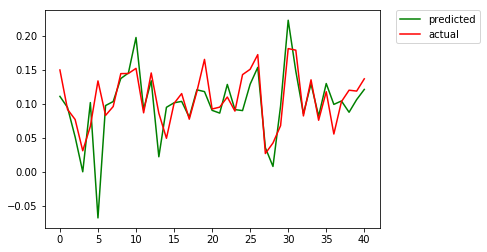

In [7]:
# get predicted values from testing and plot
predicted=[]
actual=[]

# predict values from testing subset
for number in range(training,testing,1):
    xToPredict= X[number].reshape((1,n_inputs))
    predicted.append(model.predict(xToPredict)[0][0])
    actual.append(Y[number])

actual=pd.DataFrame(actual)
predicted = pd.DataFrame(predicted)
data=pd.concat([actual,predicted],axis=1)
data.to_csv(file_name+'_predictions.csv')
plt.plot(predicted,'g',label="predicted")
plt.plot(actual,'r',label="actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
model.save('weights_oven.h5')